In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
0.033+3*0.012

0.069

In [3]:
np.linspace(0.033-3*0.012,0.033+3*0.012, 7 )

array([-0.003,  0.009,  0.021,  0.033,  0.045,  0.057,  0.069])

In [4]:
import mplhep as hep

In [5]:
plt.style.use(hep.style.CMS)

In [6]:
from matplotlib.backends.backend_pdf import PdfPages

ls random/10

random_BH_SLSQP = pd.read_pickle('random/100/BH_SLSQP.pkl')
random_SLSQP = pd.read_pickle('random/100/SLSQP.pkl')
random_SLSQP_steps = pd.read_pickle('random/15/SLSQP.pkl')

In [7]:
bins = {0: [1, 2],
       1: [2,4.3],
       2: [4.3,8.76],
       #3: [8.76,10.3],
       4: [10.3,12.89],
       #5: [12.89,14.29],
       6: [14.29,16],
       7: [16, 18],
       8: [18,22],
       9: [1.0,6.0],
       10: [1.0, 22.0],
       11:[
           [1.0, 8.68], 
           [10.09 , 12.86],
           [14.18, 22]
          ], 
       'JPsi': [8.76,10.3],
       'PsiP': [12.89,14.29]
       }
q2_mean = []
q2_width = []
for k in range(9):
    if k in [3,5]:continue
    bin_limits = bins[k]
    mean = (bin_limits[0]+bin_limits[1])/2
    width = bin_limits[1]-mean
    q2_mean.append(mean)
    q2_width.append(width)

In [8]:
import os
from matplotlib.backends.backend_pdf import PdfPages

In [10]:
os.listdir('random/bin_0/')

['100',
 '50',
 'OriginalEffyCoefs',
 'O',
 'HoracioEffyCoefs',
 'Chi2EffyCoefs',
 'Params_UpdatedSB']

In [12]:
#Lets call it legacy data
#Many changes made after this first attempt
#Made with seqFit.py
#They were also changes to Complete pdf class on modelsSymfit.py
dataframes = dict()
for name in os.listdir('random'):
    if 'bin' not in name:
        continue
    if os.path.exists(f'random/{name}/Params_UpdatedSB/Chi2EffyCoefs/20/SLSQP.pkl'):
        dataframes[name]=pd.read_pickle(f'random/{name}/Params_UpdatedSB/Chi2EffyCoefs/20/SLSQP.pkl')

dataframes

#Here I have changed  bit the modelsSymfit.py
#Changes on the atributes mainly
#One typo made use the Old coefficients?
dataframesCHI_newSB = dict()
for name in os.listdir('random'):
    if 'bin' not in name:
        continue
    if os.path.exists(f'random/{name}/Params_UpdatedSB/Chi2EffyCoefs/20/SLSQP.pkl'):
        print(name)
        dataframesCHI[name]=pd.read_pickle(f'random/{name}/Params_UpdatedSB/Chi2EffyCoefs/20/SLSQP.pkl')
        

In [ ]:
plt.scatter()

In [46]:
def plot_all_bins_lowestNLL(dataframe_dictionary, axis, markers=None, markersz=100):

    for index, (bin_,df) in enumerate(dataframe_dictionary.items()):
        plot_physical_boundaries(axis)
        minimo = df[df.NLL2==np.min(df.NLL2)]
        axis.scatter(minimo.AFB2, minimo.FH2, label=bin_.split('_')[1], s=markersz, marker=markers[index])
        axis.errorbar(minimo.AFB2, minimo.FH2, xerr = minimo.errAFB2, yerr = minimo.errFH2, capsize=5)
        axis.legend(title='Bin: ', ncol=2, fancybox=True, facecolor='black', loc=1)


In [15]:
def plot_physical_boundaries(axis, xrange=(-1.5,1.5), npoints=1000, **kwargs ):
    xx_ = np.linspace(xrange[0], xrange[1], npoints)
    axis.plot(xx_, np.abs(xx_)*2, ls='--', color='grey', **kwargs)
    

In [16]:
def plot_iterative_fit(dataframe:"Which dataset to use", 
                       axis:"matplotlib axis", 
                       arrow_size:"The size of the arrow does not change with figsize"=0.05):
    """
    Make a plot for the iterative fitting done with symfit.
    It will plot everything on a given axis e.g.
        `figure = plt.figure()`
        `axis = figure.add_subplot(1,1,1)`
    """
    plot_physical_boundaries(axis)
    axis.scatter(dataframe['afb_ini'], dataframe['fh_ini'], s=70, label='Seed', color='black')
    axis.scatter(dataframe['AFB0'], dataframe['FH0'], s=40, color='blue', label='First')
    axis.scatter(dataframe['AFB1'], dataframe['FH1'], s=40, color='green', label='Second')
    axis.scatter(dataframe['AFB2'], dataframe['FH2'], s=70, color='darkorange')
    
    axis.errorbar(dataframe['AFB2'], dataframe['FH2'],
                 xerr=dataframe['errAFB2'], yerr=dataframe['errFH2'],
                ls='none', label='Last Fitted', color='darkorange',
                 capsize=2
                )
    
    plot_arrows(dataframe, axis, arrow_size )


In [17]:
help(plot_iterative_fit)

Help on function plot_iterative_fit in module __main__:

plot_iterative_fit(dataframe:'Which dataset to use', axis:'matplotlib axis', arrow_size:'The size of the arrow does not change with figsize'=0.05)
    Make a plot for the iterative fitting done with symfit.
    It will plot everything on a given axis e.g.
        `figure = plt.figure()`
        `axis = figure.add_subplot(1,1,1)`



In [18]:
plot_iterative_fit?

Signature:
plot_iterative_fit(
    dataframe:'Which dataset to use',
    axis:'matplotlib axis',
    arrow_size:'The size of the arrow does not change with figsize'=0.05,
)
Docstring:
Make a plot for the iterative fitting done with symfit.
It will plot everything on a given axis e.g.
    `figure = plt.figure()`
    `axis = figure.add_subplot(1,1,1)`
File:      ~/Documents/efficiency/<ipython-input-16-19ea428fd46b>
Type:      function


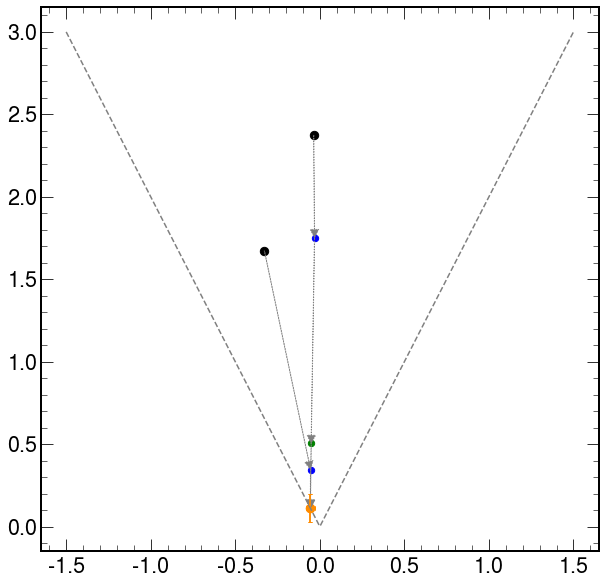

In [22]:
figure = plt.figure()
_ = figure.add_subplot(111)
mini = np.percentile(dataframes['bin_2'].NLL2, 5)
plot_iterative_fit(dataframe=dataframes['bin_2'][dataframes['bin_2'].NLL2<=mini],axis=_)


In [21]:
def plot_arrows(dataframe, axis, arrow_size):
    
    for i in dataframe.index:
        x_, y_ = dataframe['afb_ini'][i], dataframe['fh_ini'][i]
        x0, y0 = dataframe['AFB0'][i], dataframe['FH0'][i]
        x1, y1 = dataframe['AFB1'][i], dataframe['FH1'][i]
        x2, y2 = dataframe['AFB2'][i], dataframe['FH2'][i]

        arrow_size=0.05

        axis.arrow(x_, y_, (x0-x_), (y0-y_),
                 head_width=arrow_size,
                 head_length=arrow_size,
                  color='grey', 
                  ls=':',
                 length_includes_head=True
                 )
        axis.arrow(x0, y0, (x1-x0), (y1-y0),
                 head_width=arrow_size,
                 head_length=arrow_size,
                  color='grey', 
                  ls=':',
                 length_includes_head=True
                 )
        axis.arrow(x1, y1, (x2-x1), (y2-y1),
                 head_width=arrow_size,
                 head_length=arrow_size,
                  color='grey', 
                  ls=':',
                 length_includes_head=True
                 )

def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):
    from matplotlib.collections import PatchCollection
    from matplotlib.patches import Rectangle
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror, yerror):
        rect = Rectangle((x - xe, y - ye), xe, ye)
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

    return artists

In [23]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):
    from matplotlib.collections import PatchCollection
    from matplotlib.patches import Rectangle
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror, yerror):
        rect = Rectangle((x - xe, y - ye), 2*xe, 2*ye)
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k', capsize=5)

    return artists

In [24]:
def poi_q2(dataframe_dictionary, poi):
    mean = []
    error = []

    for k in range(9):
        if k in [3,5]:continue
        df = dataframe_dictionary.get('bin_'+str(k), None)
        
        if type(df)==pd.core.frame.DataFrame:
            print(len(df))
            df.dropna(inplace=True)
            print(len(df))
            
            if poi.lower().strip()=='afb':
                #poi_ = df[['AFB2', 'errAFB2']]
                param, err = 'AFB2', 'errAFB2'
            elif poi.lower().strip()=='fh':
                #poi_ = df[['FH2', 'errFH2']]
                param, err = 'FH2', 'errFH2'

            minimo = df[df.NLL2==np.min(df.NLL2)]
            mean.append(minimo[param].values[0])
            error.append(minimo[err].values[0])

        else:
            #minimo = df[df.NLL2==np.min(df.NLL2)]
            mean.append(0)
            error.append(0)
                
    return mean, error


In [25]:
def plot_measurement_q2(dataframe_dictionary, axis, poi='afb', ylims=None, values=None, bins=bins, q2_width=q2_width):
    
    if values:
        mean, error = values[0], values[1]
    else:
        mean, error = poi_q2(dataframe_dictionary, poi)
    print('MEAN: ', mean)
    print('ERROR: ', error)
    
    
    if not ylims:
        sum_ = [mean[i]+error[i] for i in range(len(mean))]
        dif_ = [mean[i]-error[i] for i in range(len(mean))]
        ymax = max(sum_+dif_)
        ymin = min(sum_+dif_)
    else:
        ymax=ylims[1]
        ymin=ylims[0]
        
    make_error_boxes(axis, q2_mean, mean, q2_width, error )
    
    times=1.3

    axis.fill_betweenx([ymin*times, ymax*times], [bins['JPsi'][0],bins['JPsi'][0]], [bins['JPsi'][1],bins['JPsi'][1]], facecolor='none', hatch='xx', edgecolor='silver',zorder=20)
    axis.plot([bins['JPsi'][0],bins['JPsi'][0]],[ymin*1.1, ymax*1.1], ls='--', color='black', zorder=30)
    axis.plot([bins['JPsi'][1],bins['JPsi'][1]],[ymin*1.1, ymax*1.1], ls='--', color='black', zorder=30)

    axis.fill_betweenx([ymin*times, ymax*times], [bins['PsiP'][0],bins['PsiP'][0]], [bins['PsiP'][1],bins['PsiP'][1]], facecolor='none', hatch='xx', edgecolor='silver', zorder=20)
    axis.plot([bins['PsiP'][0],bins['PsiP'][0]],[ymin*times, ymax*times], ls='--', color='black', zorder=30)
    axis.plot([bins['PsiP'][1],bins['PsiP'][1]],[ymin*times, ymax*times], ls='--', color='black', zorder=30)
    
    if poi.strip().lower()=='afb':
        axis.set_ylabel('$A_{FB}$')
    elif poi.strip().lower()=='fh':
        axis.set_ylabel('$F_H$')
        
    axis.set_ylim(ymin*1.1, ymax*1.1)
    

18
18
18
18
17
17
19
19
13
13
15
15
11
11
MEAN:  [0.019666662359195067, -0.12816539461092014, -0.055869333612584955, -0.02510395480346298, -0.21055052975822589, -0.10880154660799188, -1.713393244189893e-12]
ERROR:  [0.1407671668102857, 0.06022073781436938, 0.028192221788004682, 0.01920970481161484, 0.029491834498878336, 0.03106238377598755, 0.03720635607108782]
18
18
18
18
17
17
19
19
13
13
15
15
11
11
MEAN:  [0.39271126895155695, 0.2563307892230048, 0.11173866722513064, 0.2828068457353948, 0.42110105951645177, 0.3309874688986457, 7.41435478335834e-13]
ERROR:  [0.5187289311114051, 0.18916826358861105, 0.08442185375088261, 0.050389880800929765, 0.08155331730012515, 0.0849538466713319, 0.10288793797775396]


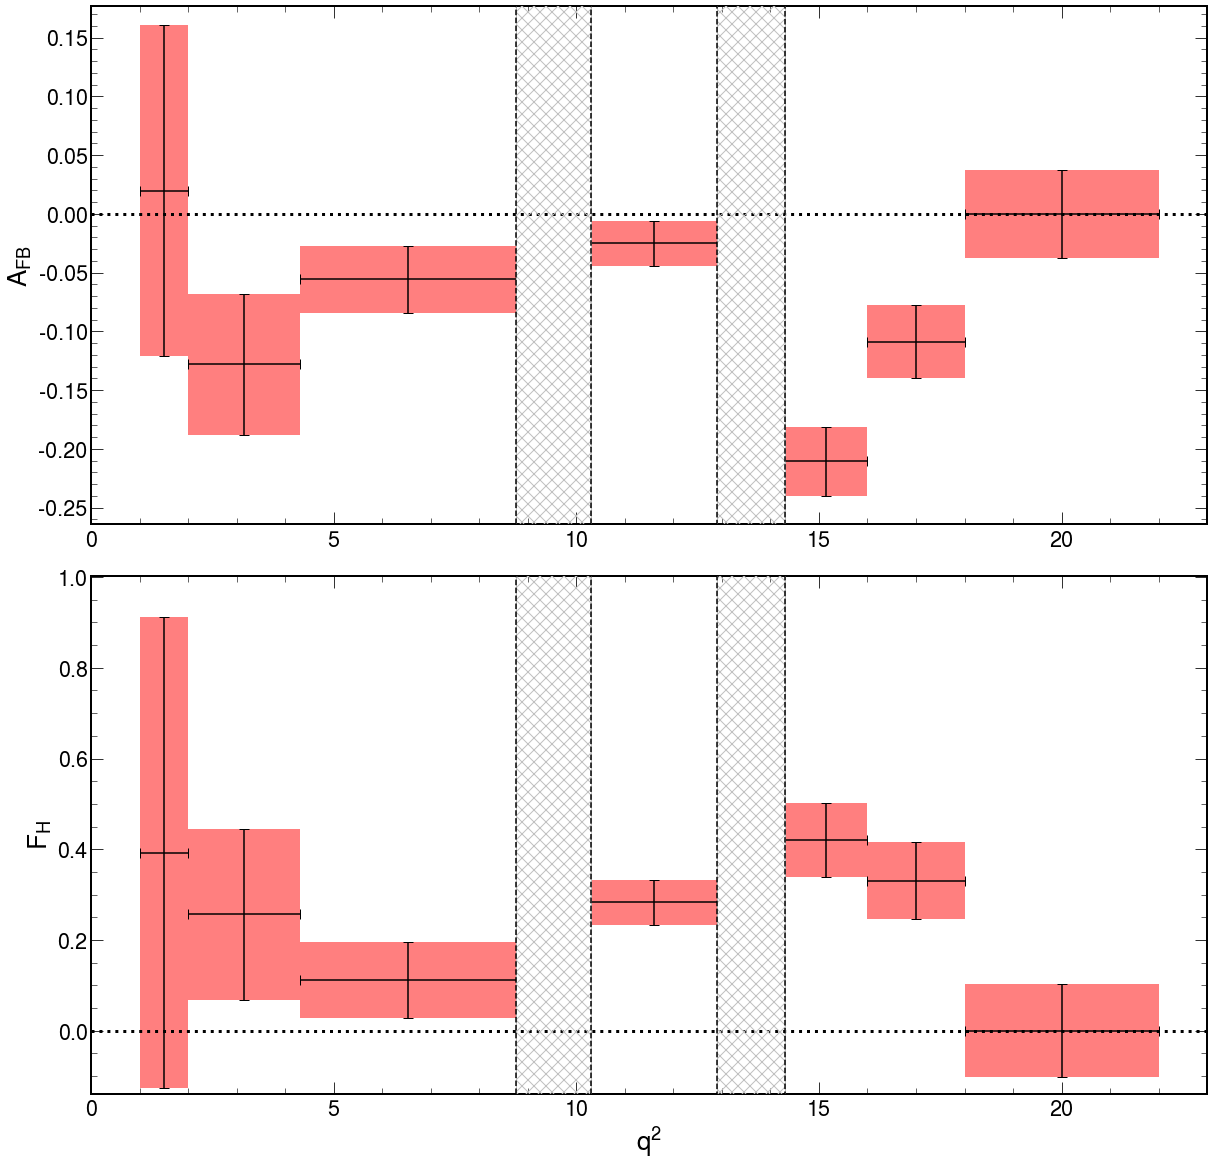

In [41]:
fg = plt.figure(figsize=(20,20))
#fg.suptitle('Updated', y=0.92, fontsize=40)
ax = fg.add_subplot(211)
plot_measurement_q2(dataframes, ax, 'afb')
ax.plot([0,23],[0,0], ls=':', color='black', linewidth=3)
ax.set_xlim(0,23)


ax2 = fg.add_subplot(212)
plot_measurement_q2(dataframes, ax2, 'fh', bins=bins, q2_width=q2_width)
ax2.set_xlabel('$q^2$')
ax2.plot([0,23],[0,0], ls=':', color='black', linewidth=3)
ax2.set_xlim(0,23)

plt.subplots_adjust(hspace=0.1)
plt.savefig('preliminar_1.PNG', bbox_inches='tight', transparent=1)

In [111]:
binsLHCb = {
    0: [0.1, 0.98],
    1: [1.1, 2],
    2: [2, 3],
    3: [3, 4],
    4: [4, 5],
    5: [5, 6],
    6: [6, 7],
    7: [7, 8],
    'JPsi': [8, 11],
    9: [11, 11.75],
    10: [11.75, 12.5],
    'PsiP': [12.5, 15.0],
    12: [15, 16],
    13: [16, 17],
    14: [17, 18],
    15: [18, 19],
    16: [20, 21],
    17: [21, 22]
}

fhLHCb = []


fg = plt.figure(figsize=(20,20))
#fg.suptitle( 'New', y=0.92, fontsize=40)
ax = fg.add_subplot(211)
plot_measurement_q2(dataframesCHI, ax, 'afb', bins=bins)


ax2 = fg.add_subplot(212)
plot_measurement_q2(dataframesCHI, ax2, 'fh',bins=bins)
ax2.set_xlabel('$q^2$')

plt.subplots_adjust(hspace=0.1)

In [112]:
q2_width

[0.5, 1.15, 2.2300000000000004, 1.295, 0.8550000000000004, 1.0, 2.0]

50
47
50
40
50
38
50
33
50
39
50
34
50
29
MEAN:  [-0.23603241121779017, -0.1213278382615913, -0.11125539096964505, -0.06748705924130735, -0.3381915996434226, -0.26367657265473377, -0.0024754477616292414]
ERROR:  [0.14386633340688137, 0.058639934465938875, 0.02796325027674146, 0.018853550218709693, 0.03009945504051887, 0.033035419961119805, 0.03727977390462643]
47
47
40
40
38
38
33
33
39
39
34
34
29
29
MEAN:  [0.47206482438599, 0.24265567653009315, 0.22251078202587407, 0.13497411848255733, 0.6763831992831468, 0.5905269574569679, 0.004950895523131048]
ERROR:  [0.5036085548030521, 0.17516167559254028, 0.07807086492746756, 0.048444381496804814, 0.07740905448654056, 0.08324540445283621, 0.10437117618351875]


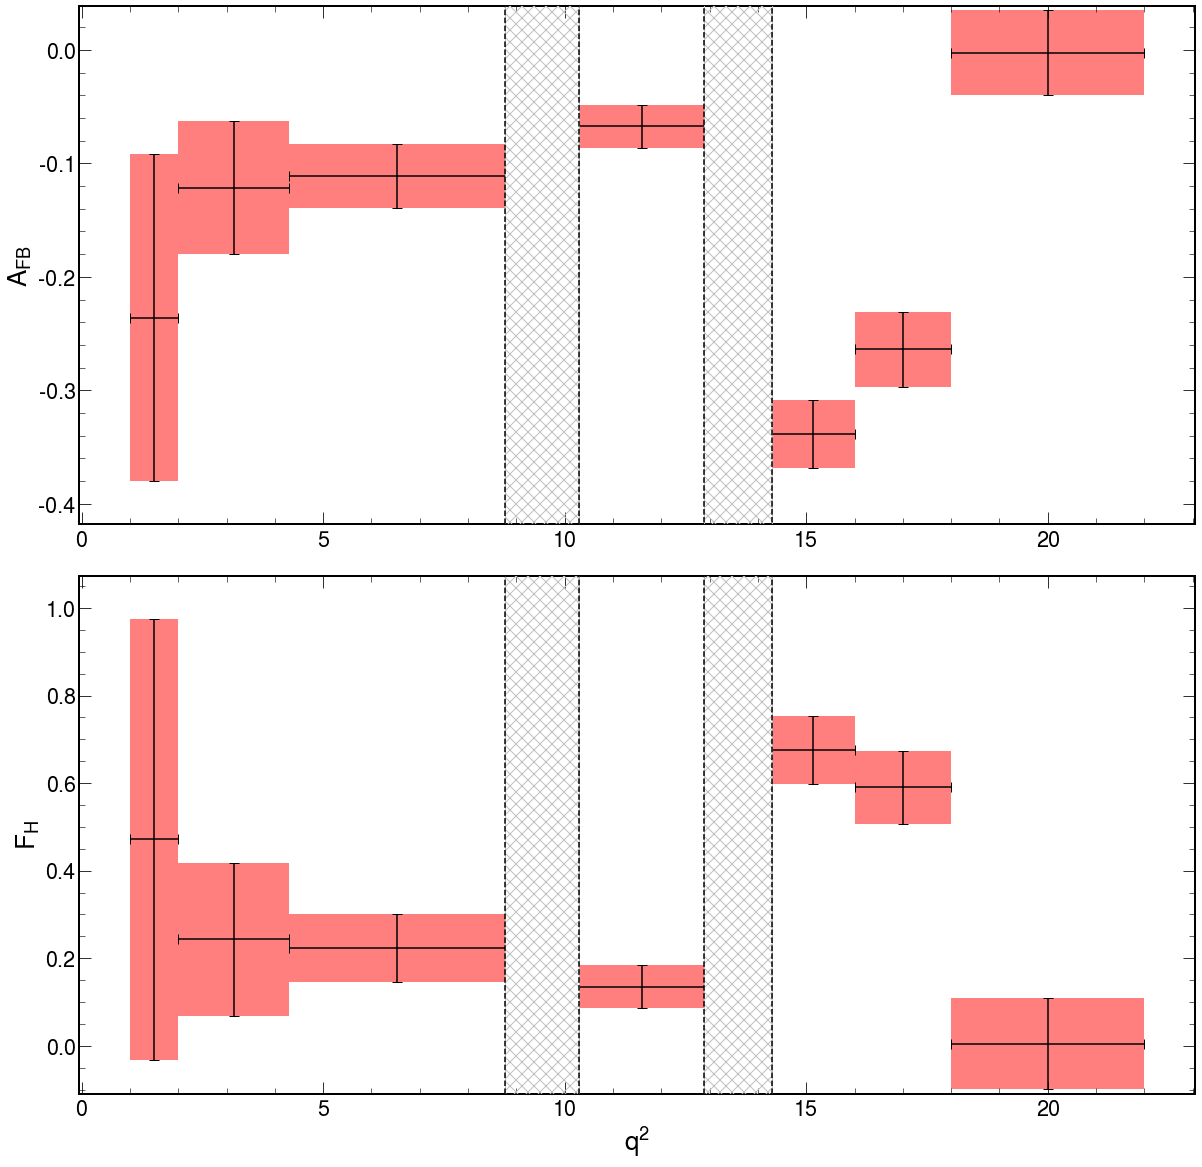

In [113]:
fg = plt.figure(figsize=(20,20))
#fg.suptitle( 'New', y=0.92, fontsize=40)
ax = fg.add_subplot(211)
plot_measurement_q2(dataframesCHI, ax, 'afb', bins=bins, q2_width=q2_width)


ax2 = fg.add_subplot(212)
plot_measurement_q2(dataframesCHI, ax2, 'fh',bins=bins, q2_width=q2_width)
ax2.set_xlabel('$q^2$')

plt.subplots_adjust(hspace=0.1)
#plt.savefig('neweffMeasurement.png')

ERROR:  [0.14874525523691393, 0.058740650310495, 0.027467457674026263, 0.018844382752871824, 0.030852914744586114, 0.03304754807445407, 0.03747928251488941]


NameError: name 'make_error_boxes' is not defined

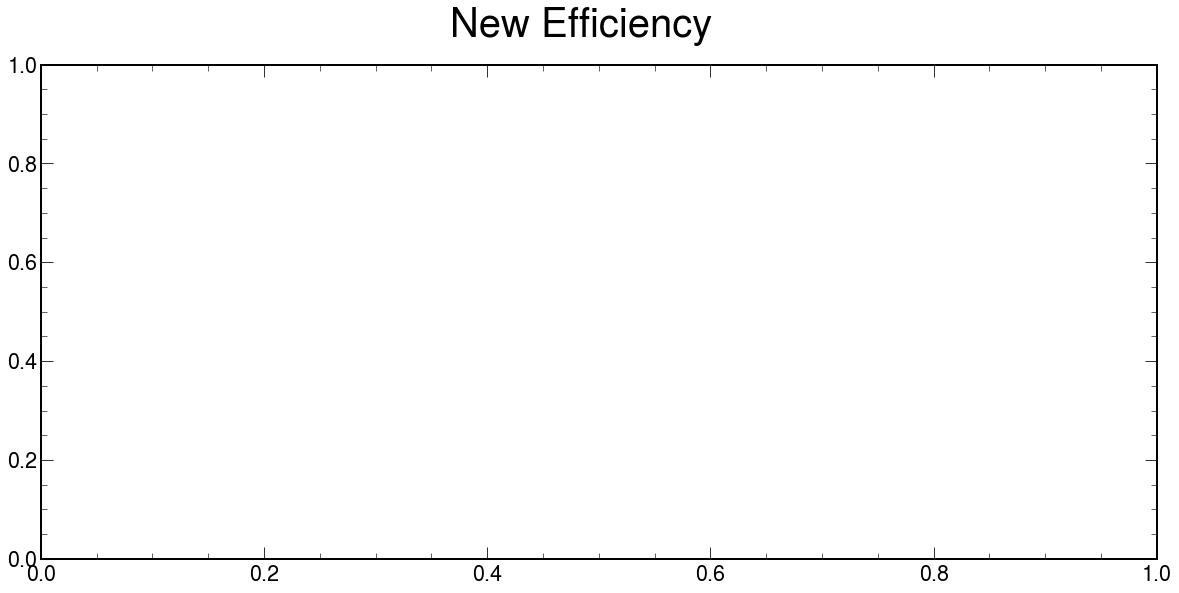

In [38]:
fg = plt.figure(figsize=(20,20))
fg.suptitle('New Efficiency', y=0.92, fontsize=40)
ax = fg.add_subplot(211)
plot_measurement_q2(dataframesHCL, ax, 'afb')


ax2 = fg.add_subplot(212)
plot_measurement_q2(dataframesHCL, ax2, 'fh')
ax2.set_xlabel('$q^2$')

plt.subplots_adjust(hspace=0.1)

0.08392854027757181
0.7483288551119417


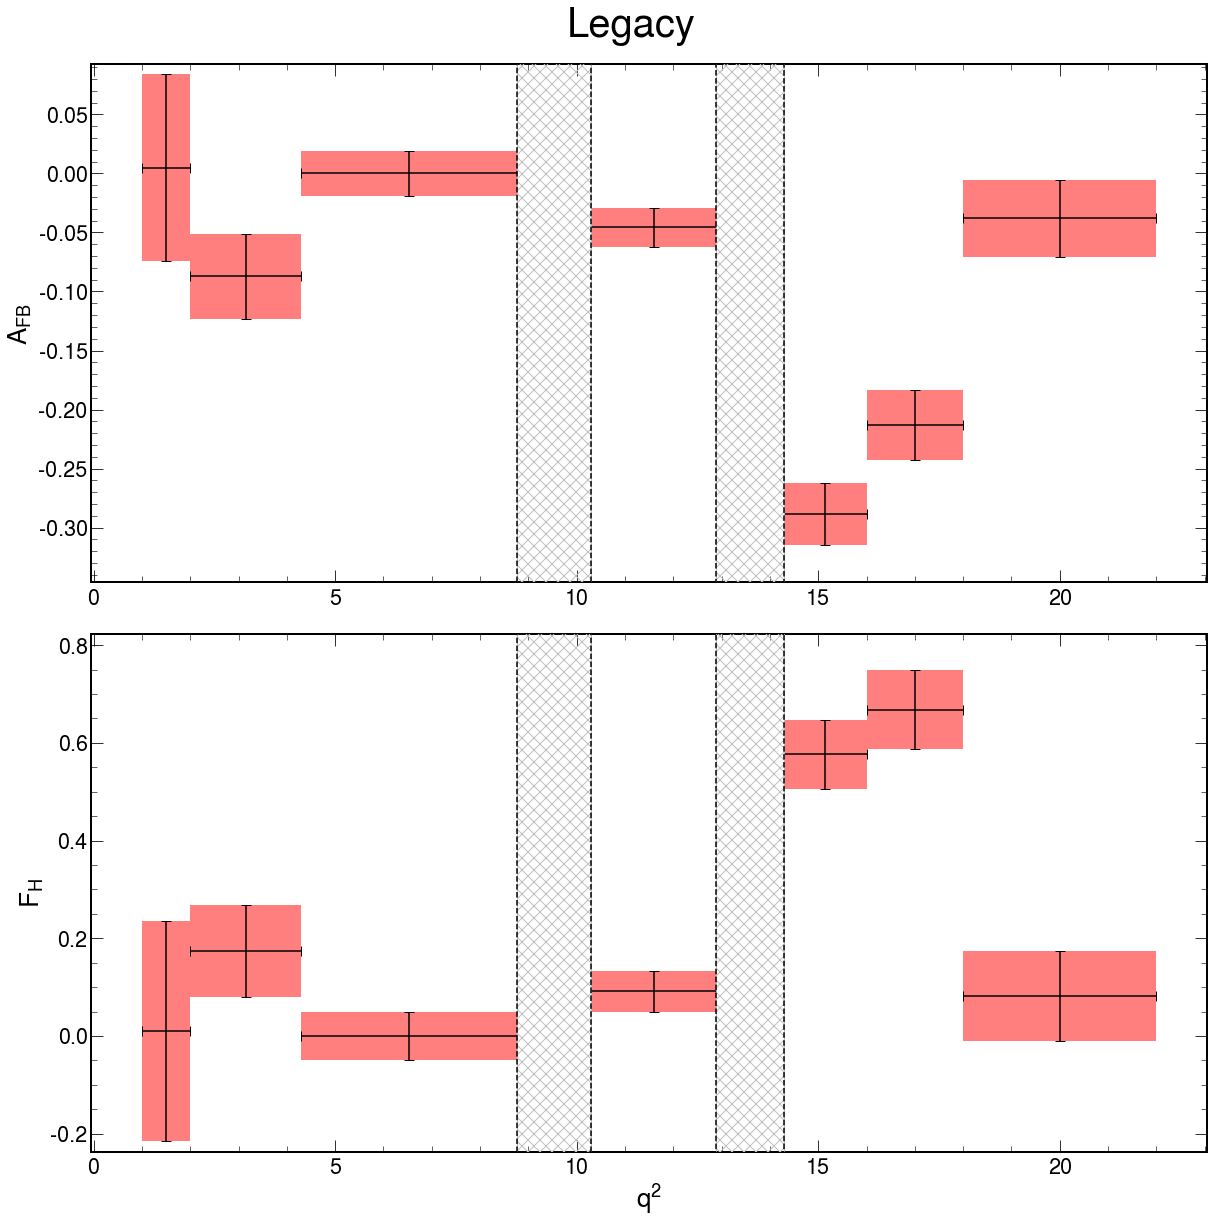

In [360]:
fg = plt.figure(figsize=(20,20))
fg.suptitle('Legacy', y=0.92, fontsize=40)
ax = fg.add_subplot(211)
plot_measurement_q2(dataframes, ax, 'afb')


ax2 = fg.add_subplot(212)
plot_measurement_q2(dataframes, ax2, 'fh')
ax2.set_xlabel('$q^2$')

plt.subplots_adjust(hspace=0.1)

TypeError: plot_all_bins_lowestNLL() got an unexpected keyword argument 'markers'

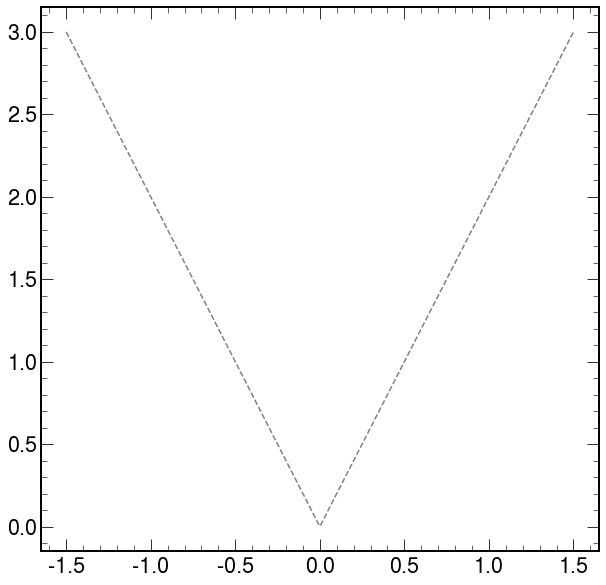

In [42]:
fig = plt.figure()
#fig.suptitle('Update')
ax = fig.add_subplot(111)
plot_physical_boundaries(ax)
plot_all_bins_lowestNLL(dataframes,ax, markers = [])
#ax.legend(title='Bin: ', ncol=2, fancybox=True, facecolor='black', loc=1)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.05, 1)
plt.savefig('preliminar_2.png')

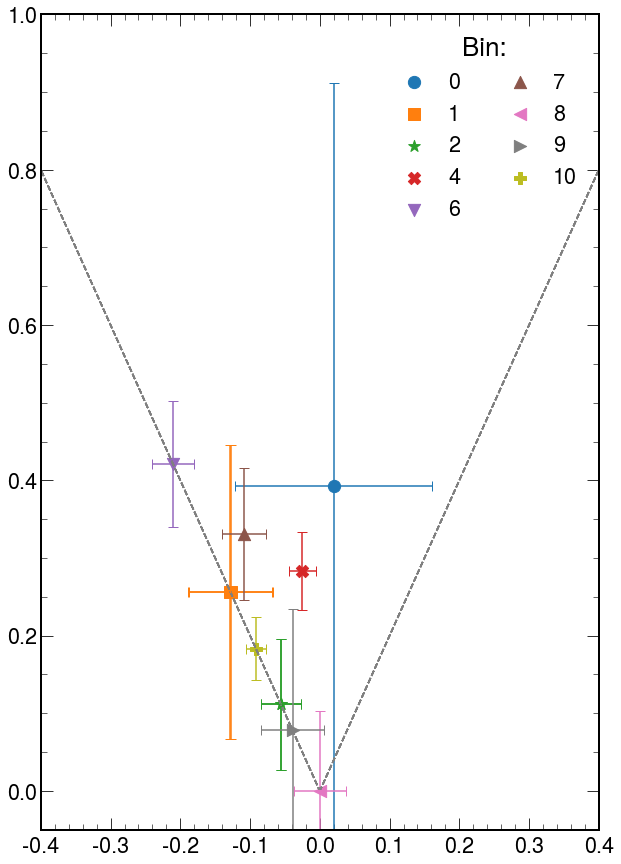

In [53]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
plot_physical_boundaries(ax)
plot_all_bins_lowestNLL(dataframes,ax, markers=['o', 's', '*', 'X', 'v', '^', '<' ,'>', 'P', 'P'], markersz=150)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.05, 1)
plt.savefig('Measurement_afb_fh.png', bbox_inches='tight', transparent=1)

(-0.05, 0.8)

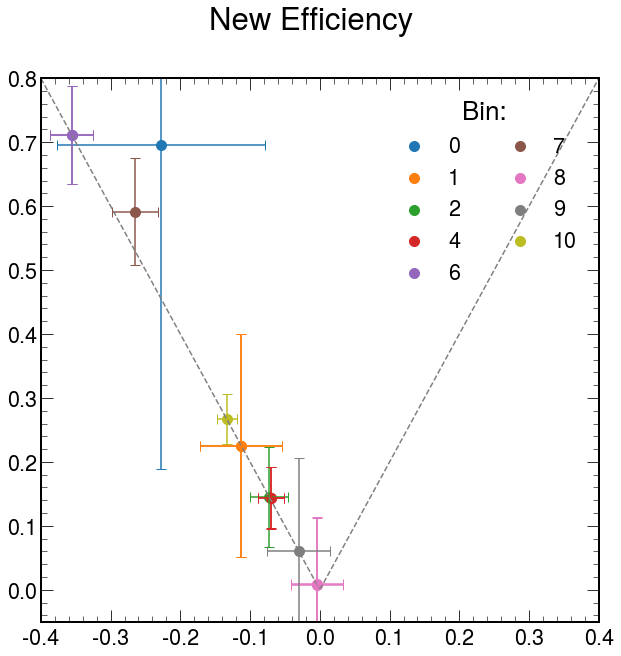

In [165]:
fig = plt.figure()
fig.suptitle('New Efficiency')
ax = fig.add_subplot(111)
plot_physical_boundaries(ax)
plot_all_bins_lowestNLL(dataframesHCL,ax)
#ax.legend(title='Bin: ', ncol=2, fancybox=True, facecolor='black', loc=1)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.05, 0.8)

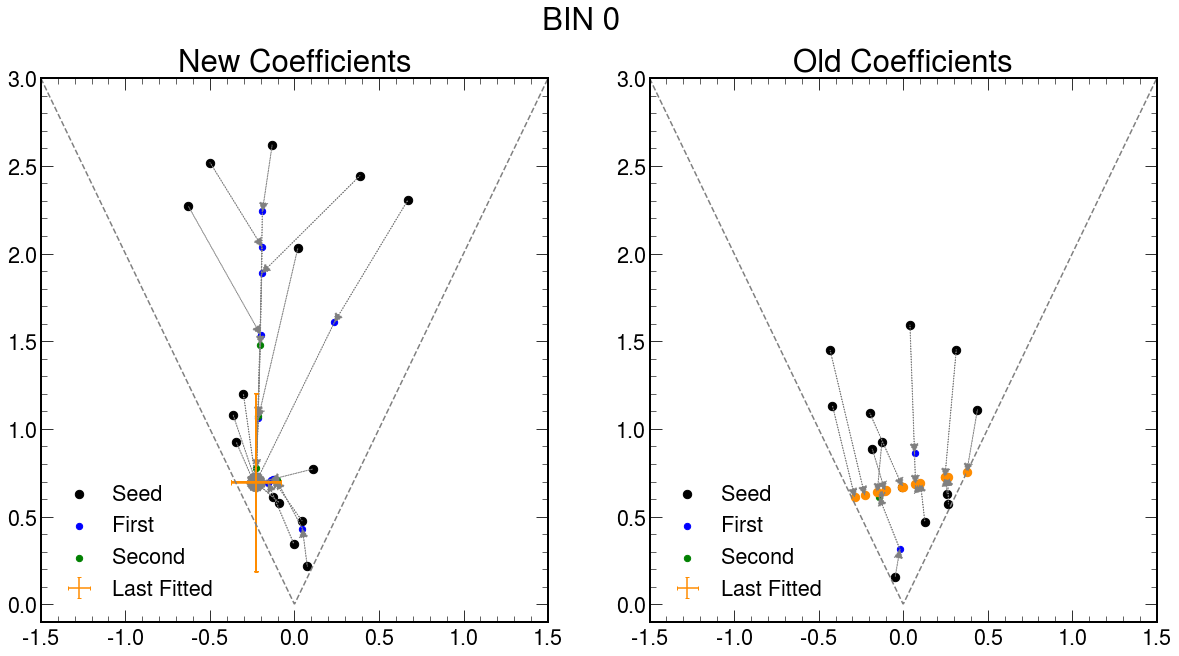

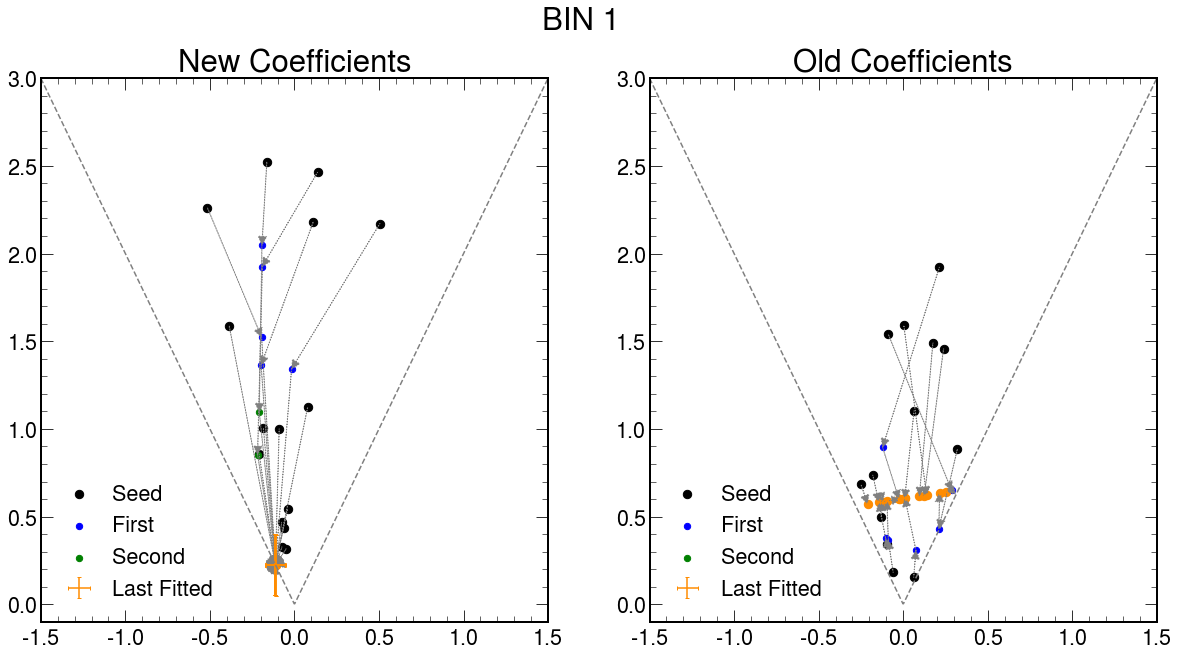

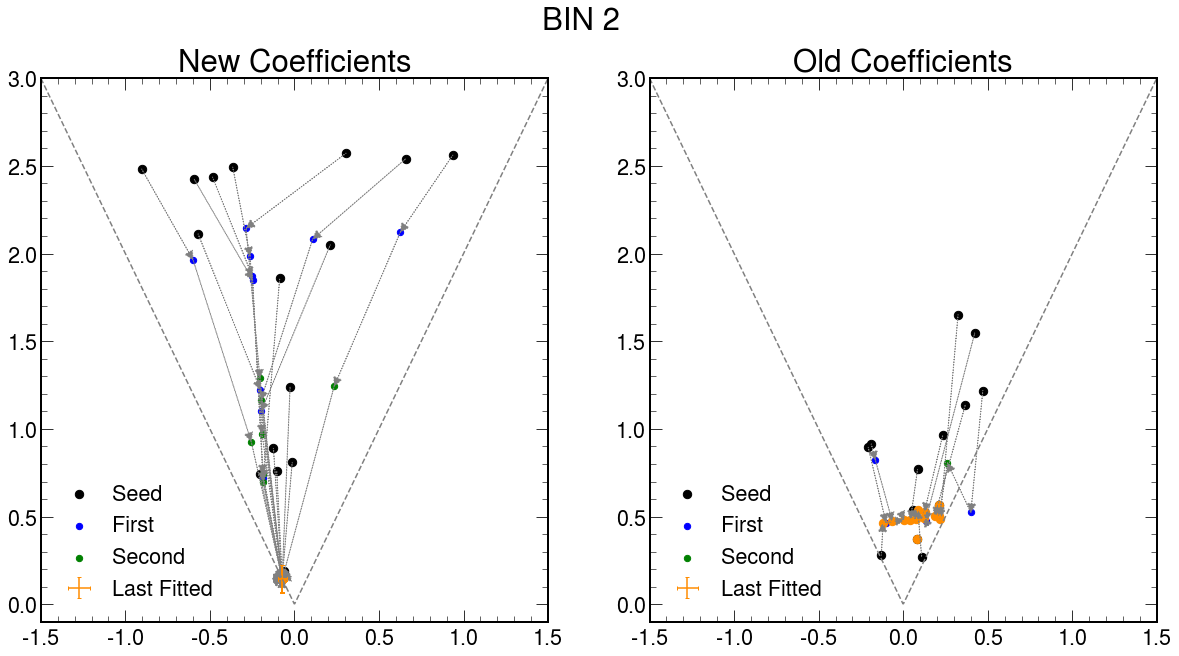

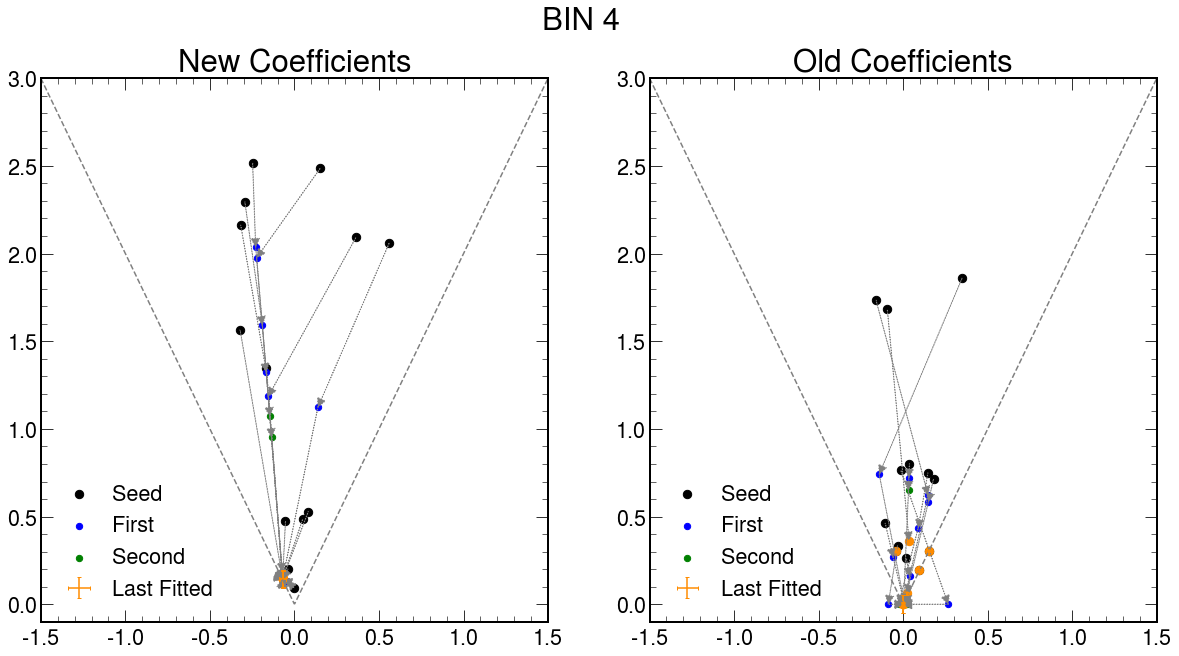

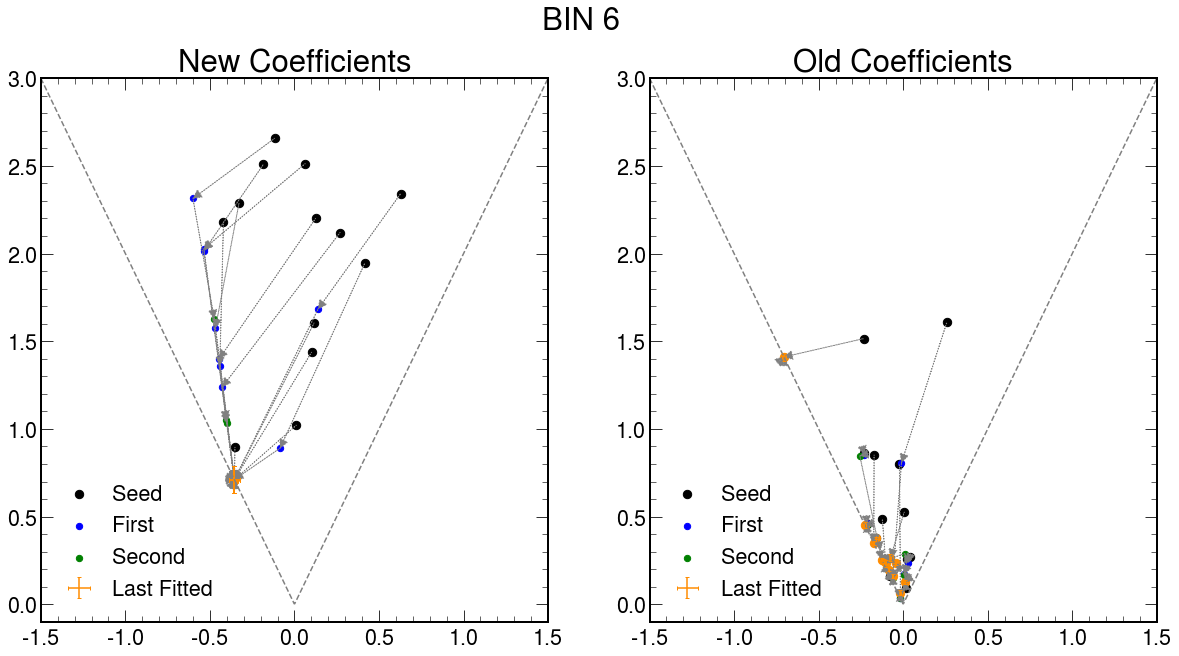

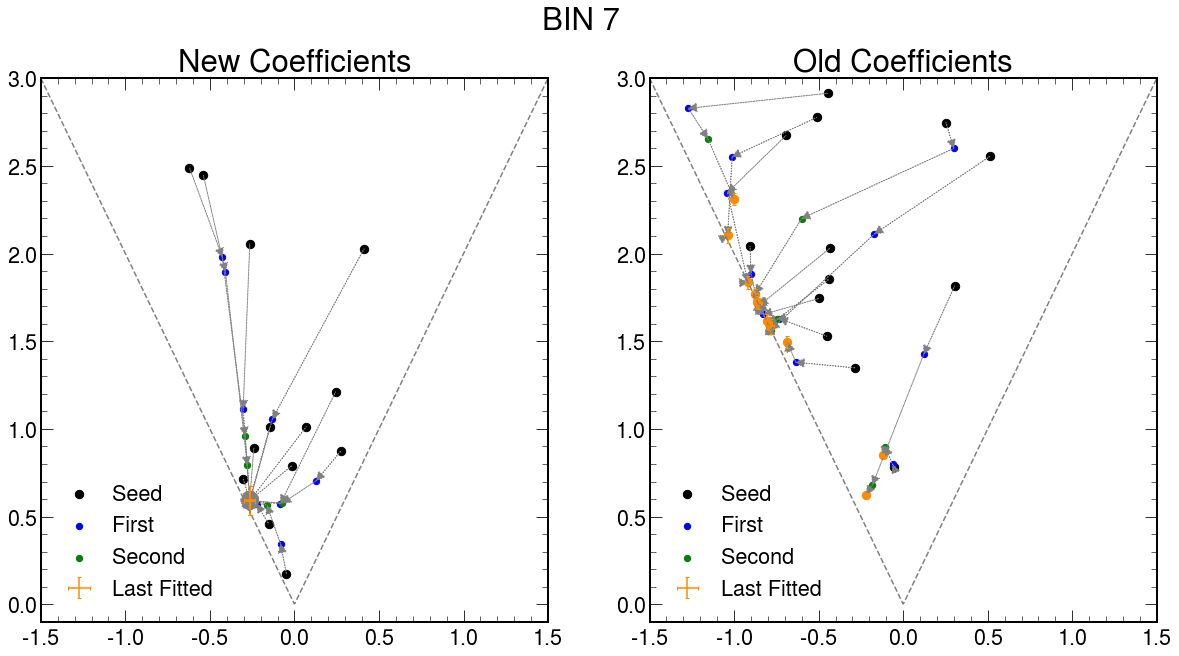

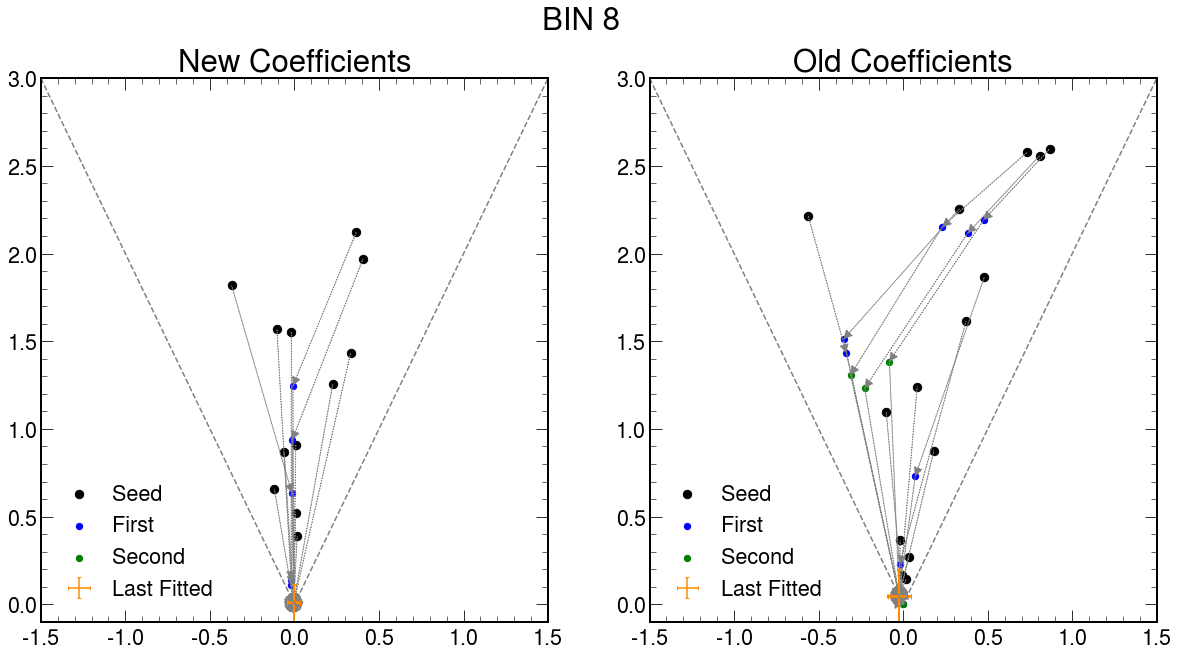

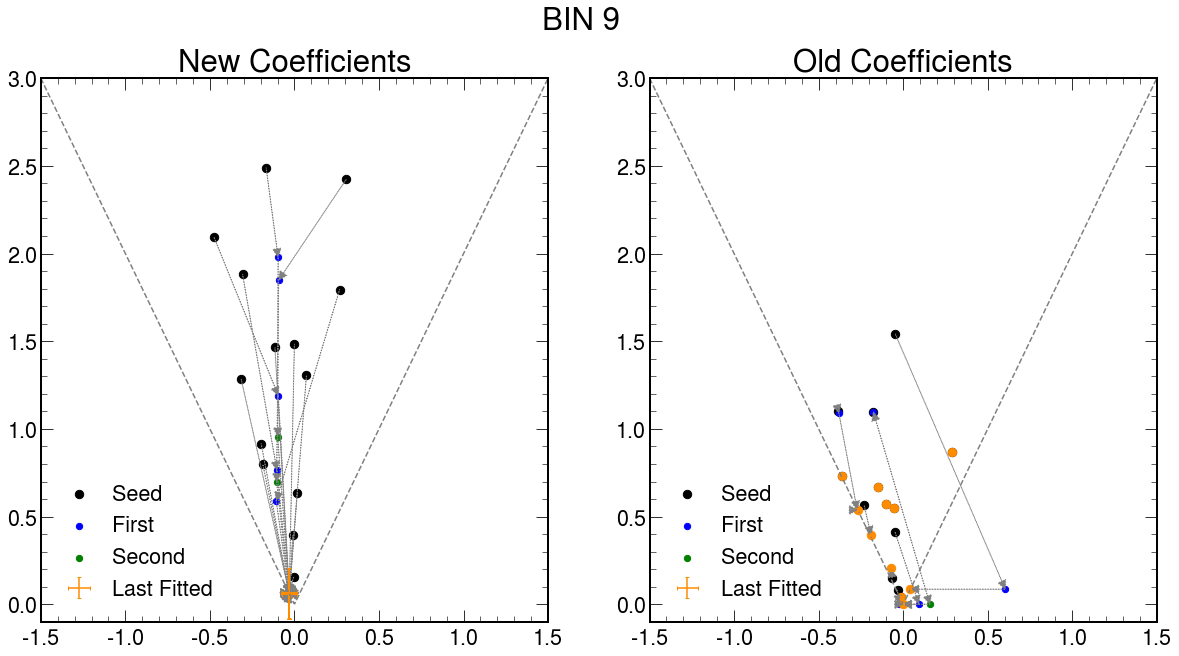

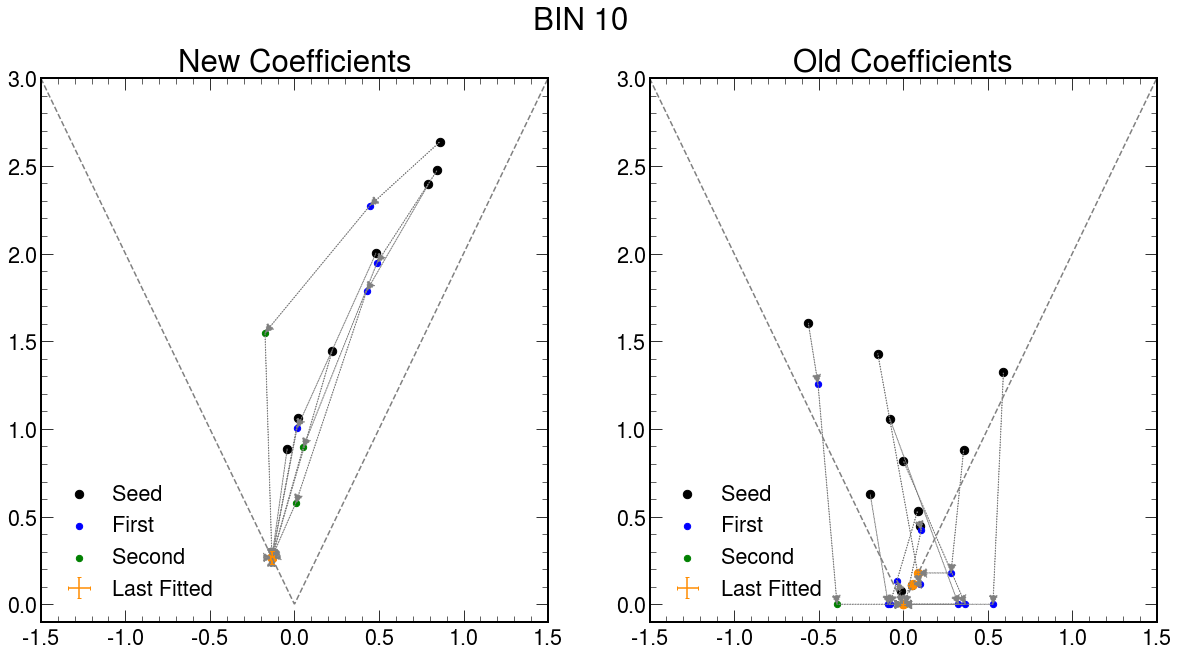

In [112]:
#COMPARISON BEWTEEN ORIGINAL COEFFS AND MINE

for bin_, df in dataframesHCL.items():
    dfOrigin = dataframesORGINAL[bin_]
    
    _percentile = np.percentile(df.NLL2, 25)
    dataframe = df[df.NLL2<=_percentile]
    dataframe.replace([np.inf, -np.inf], np.nan)
    dataframe.dropna()
    
    _percentileOrigin = np.percentile(dfOrigin.NLL2, 25)
    dataframeOrigin = dfOrigin[dfOrigin.NLL2<=_percentileOrigin]
    dataframeOrigin.replace([np.inf, -np.inf], np.nan)
    dataframeOrigin.dropna()
    

    figura = plt.figure(figsize=(20,10))
    figura.suptitle(bin_.replace('_', ' ').upper())
    
    _1 = figura.add_subplot(1,2,1)
    _1.set_title('New Coefficients')
    plot_iterative_fit(dataframe, _1)
    _1.set_xlim(-1.5, 1.5)
    _1.set_ylim(-0.1, 3)
    
    _2 = figura.add_subplot(1,2,2)
    _2.set_title('Old Coefficients')
    plot_iterative_fit(dataframeOrigin, _2)
    _2.set_xlim(-1.5, 1.5)
    _2.set_ylim(-0.1, 3)    
    
    plt.show()

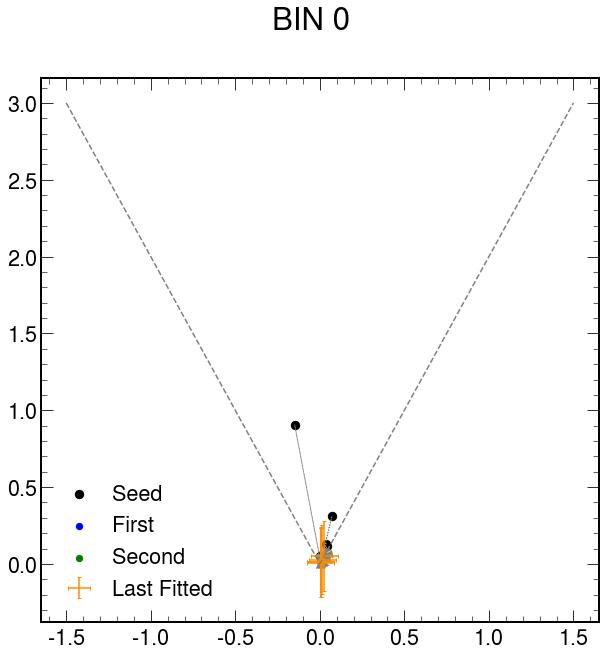

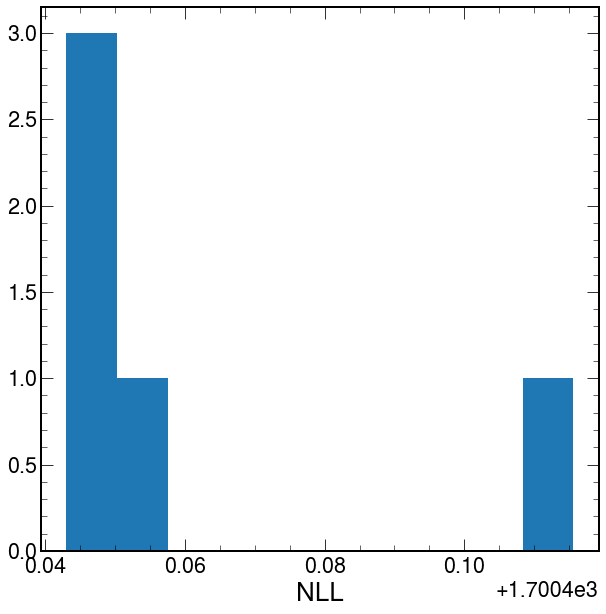

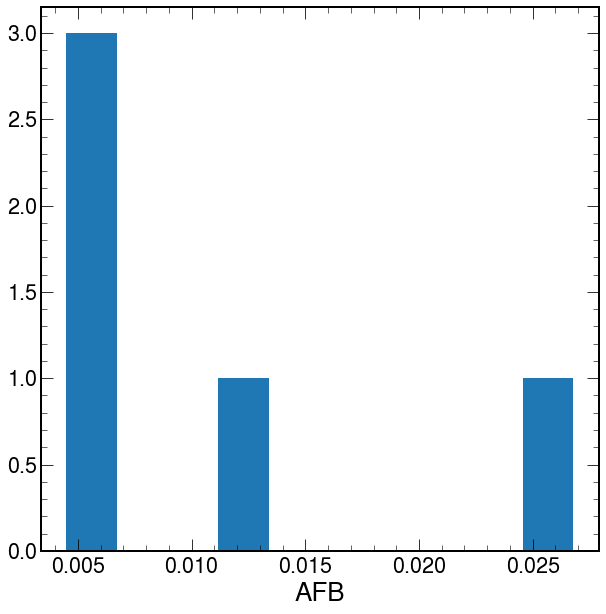

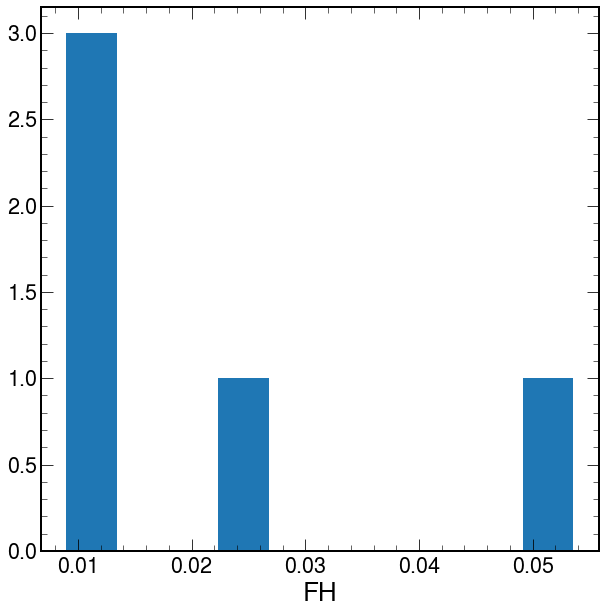

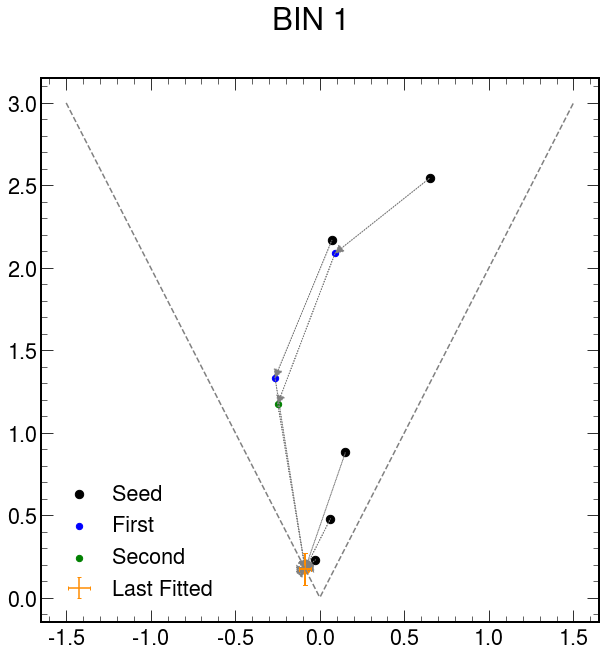

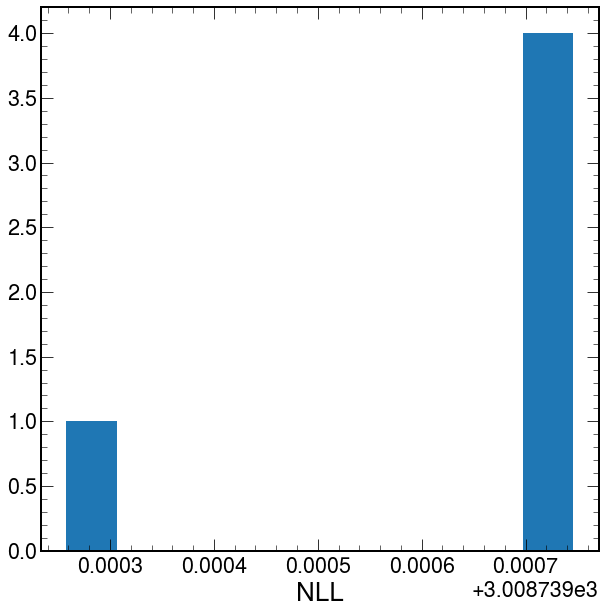

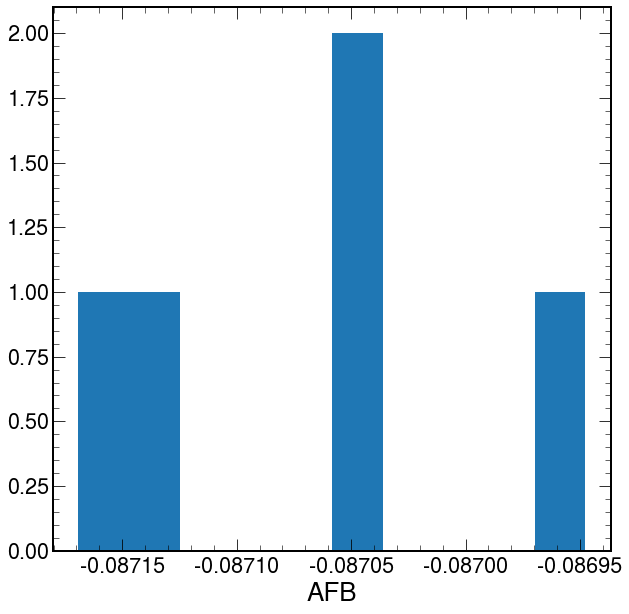

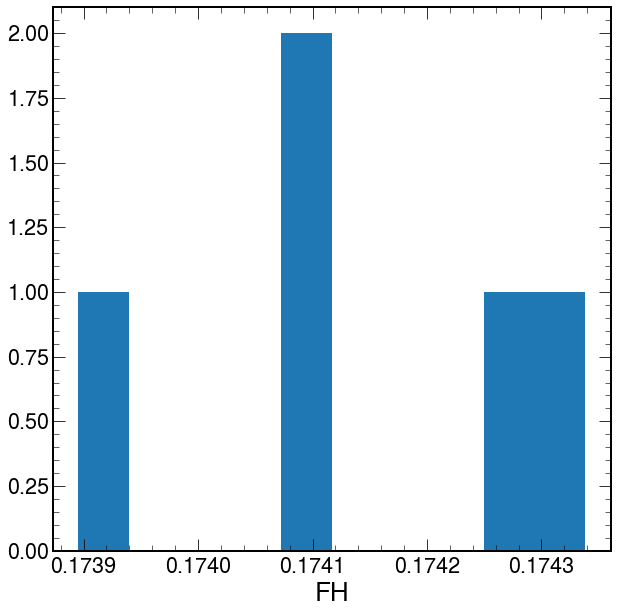

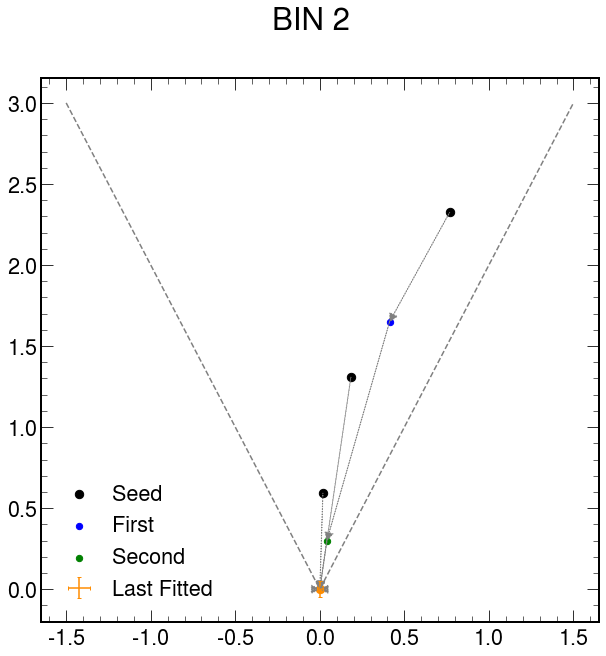

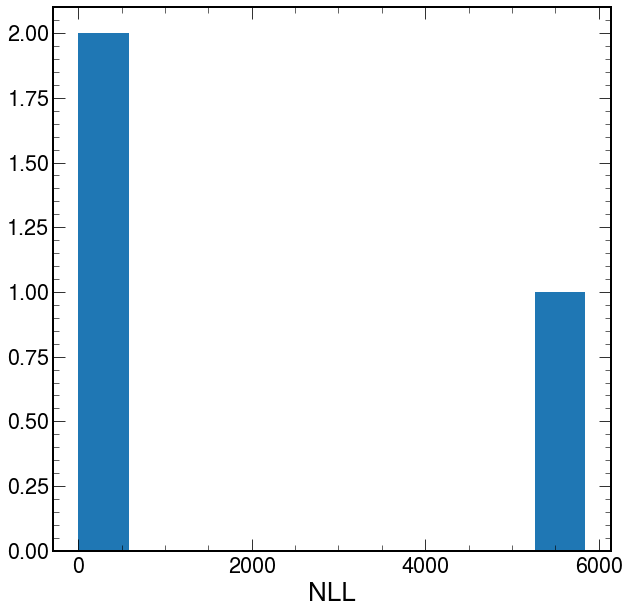

/home/horacio/Documents/pycms/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/horacio/Documents/pycms/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


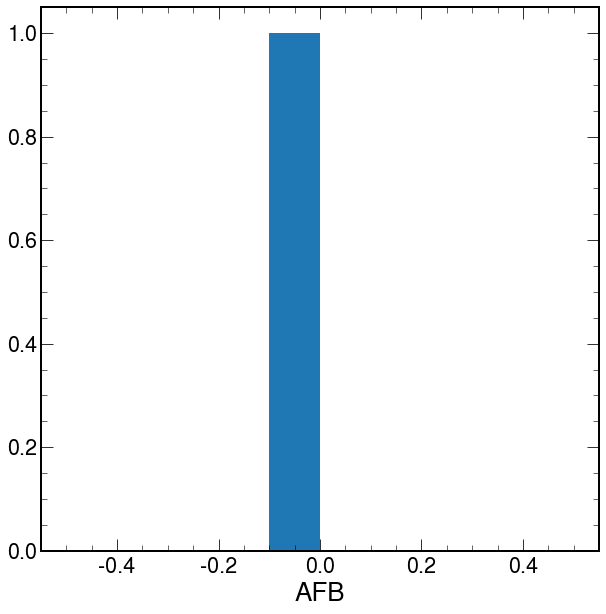

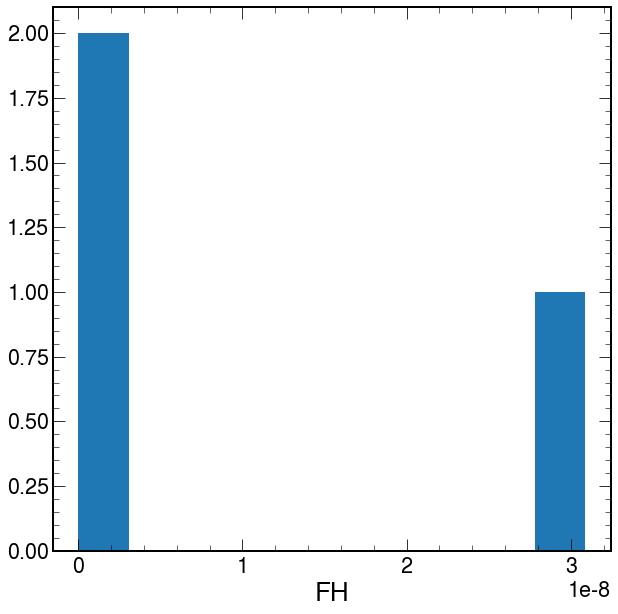

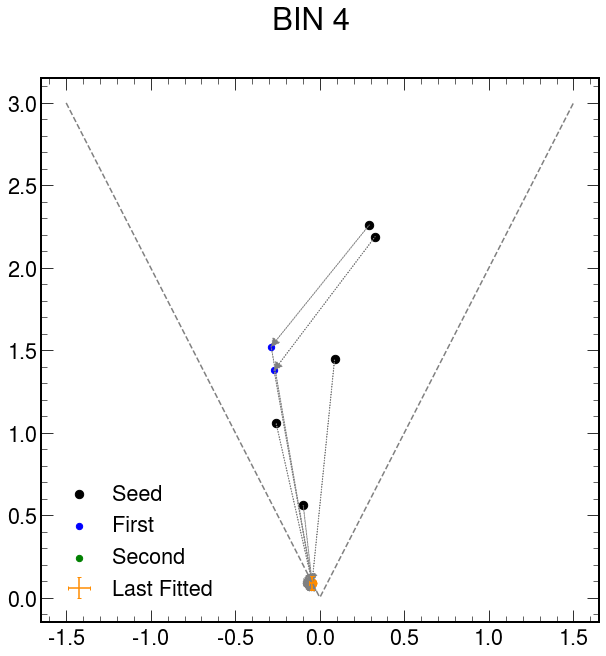

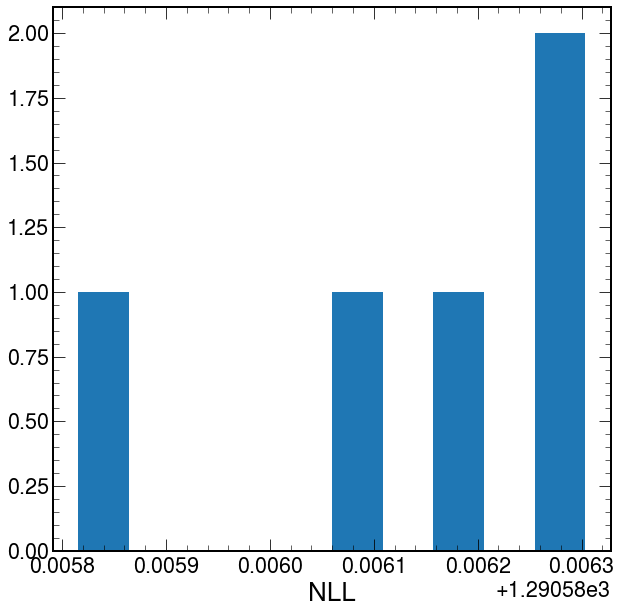

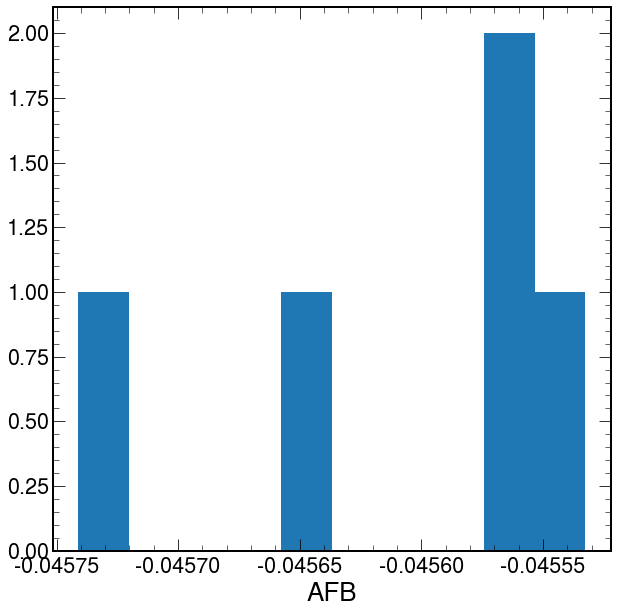

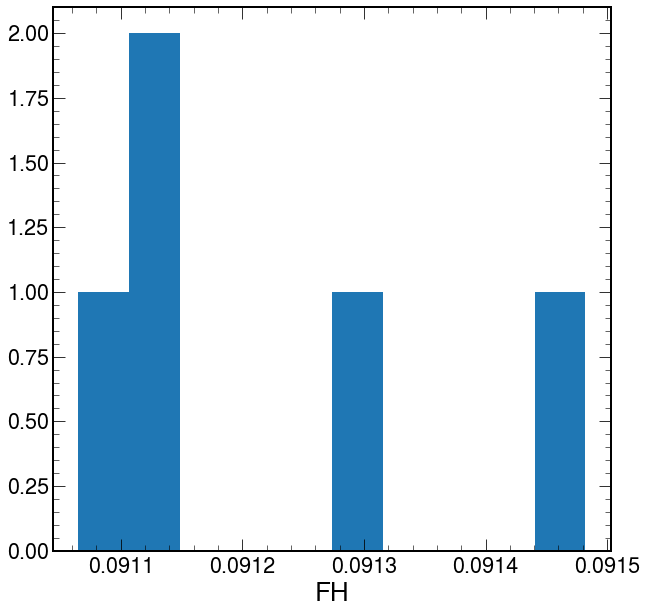

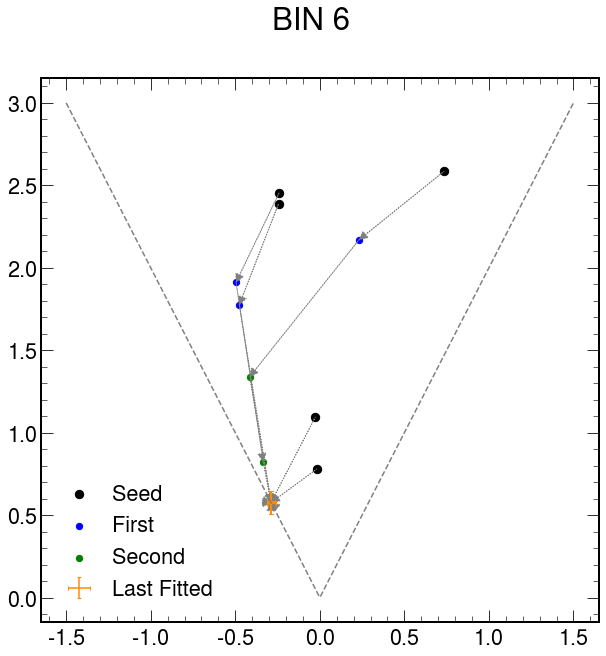

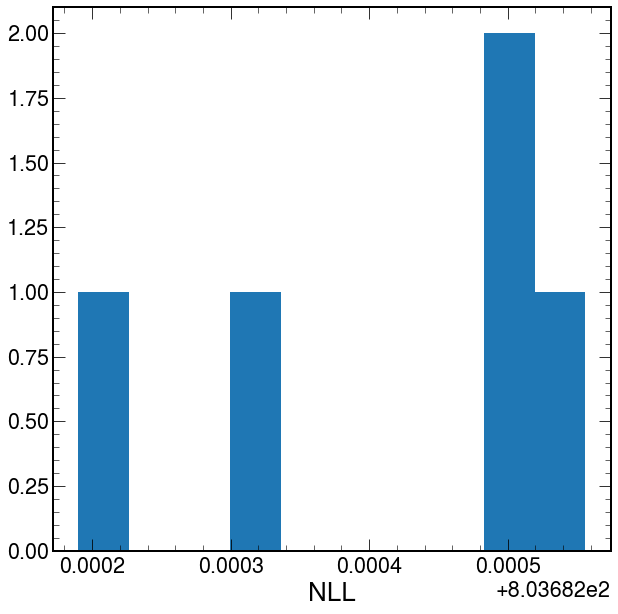

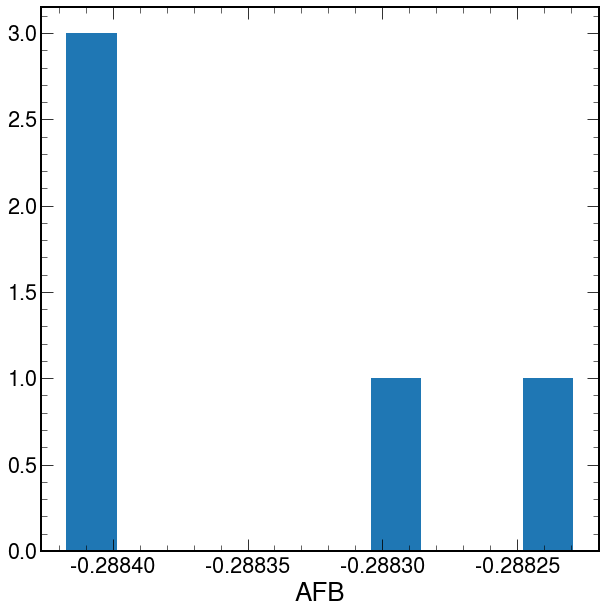

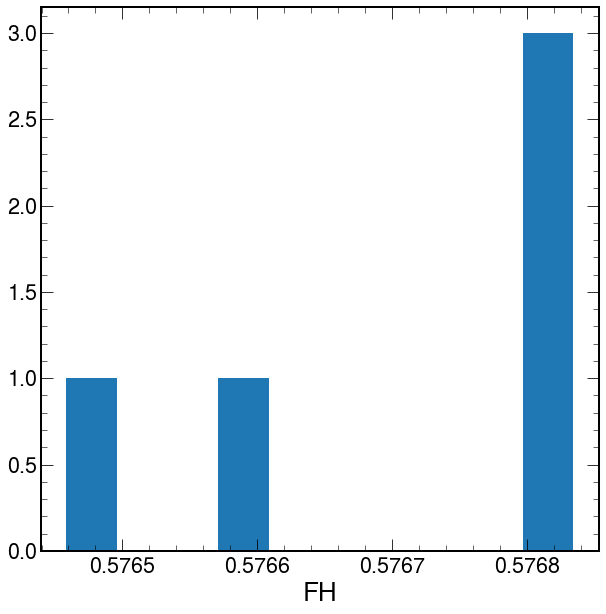

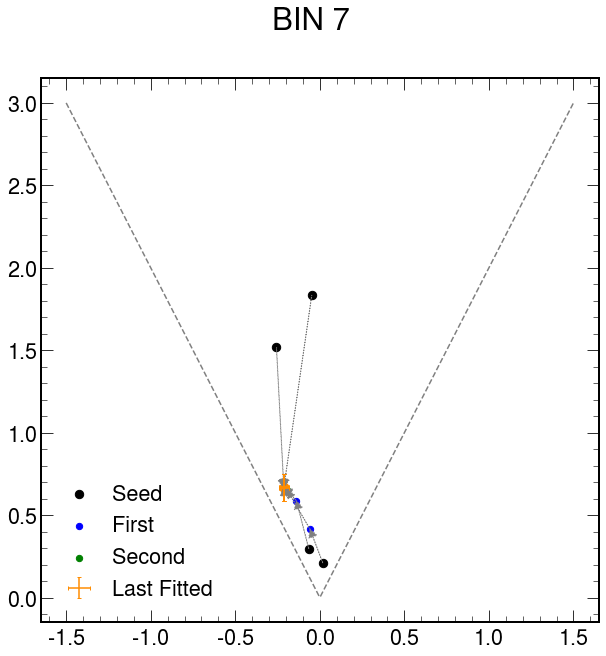

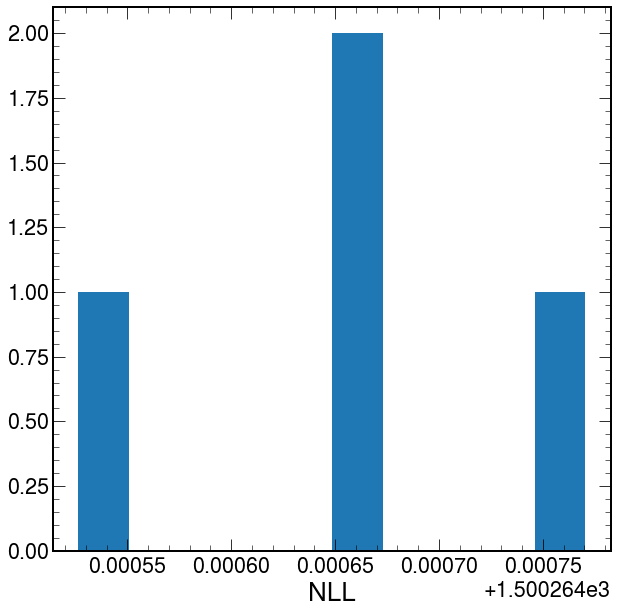

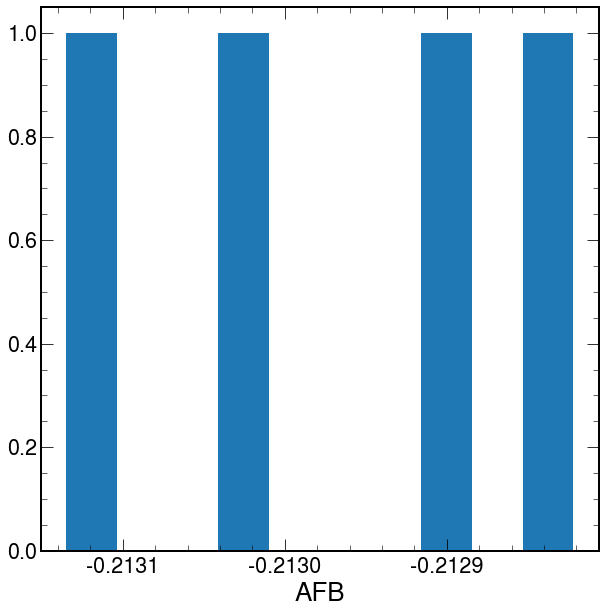

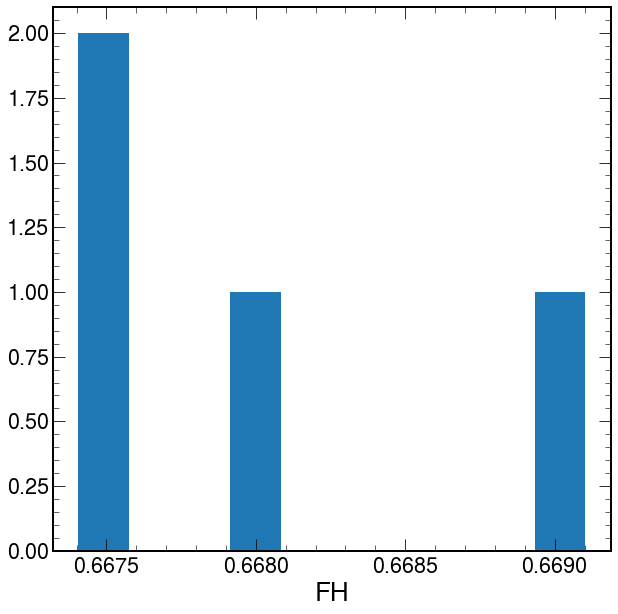

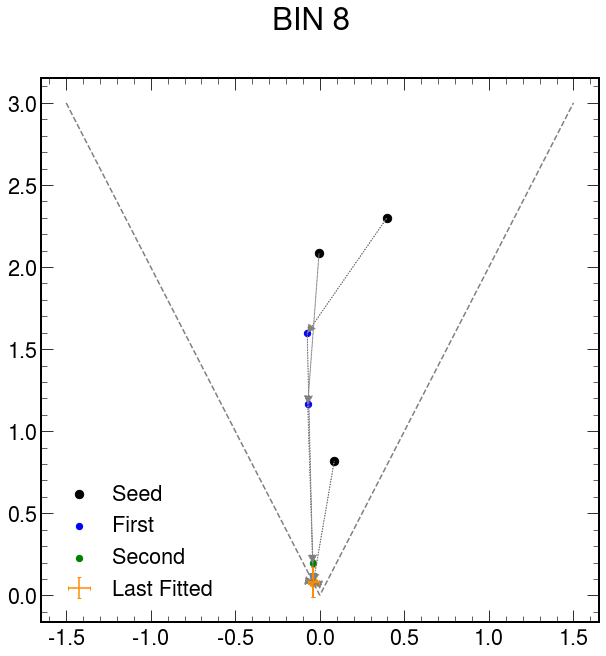

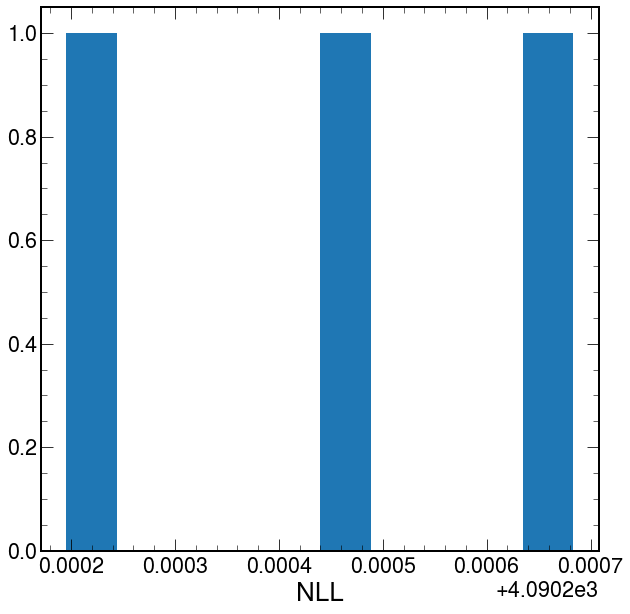

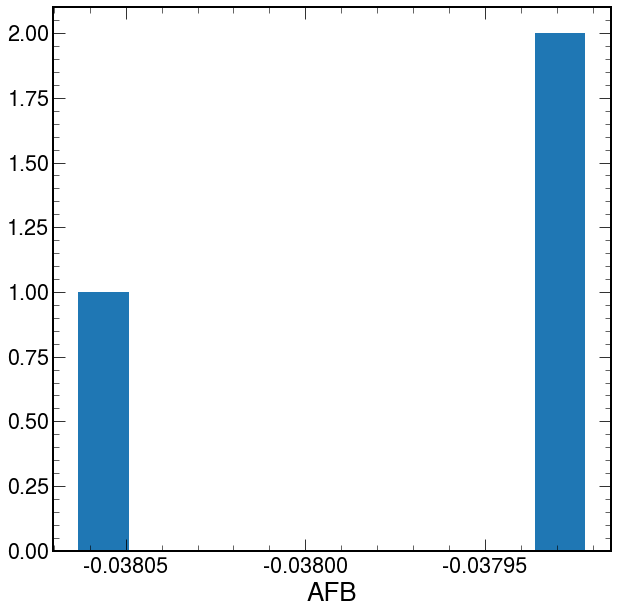

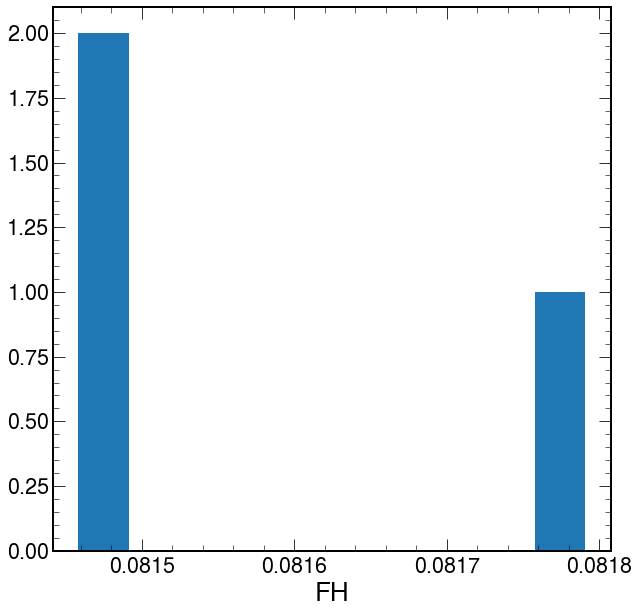

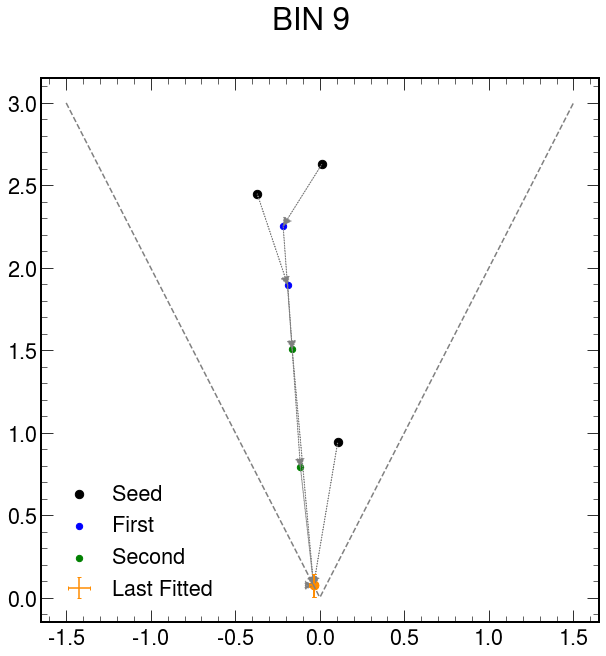

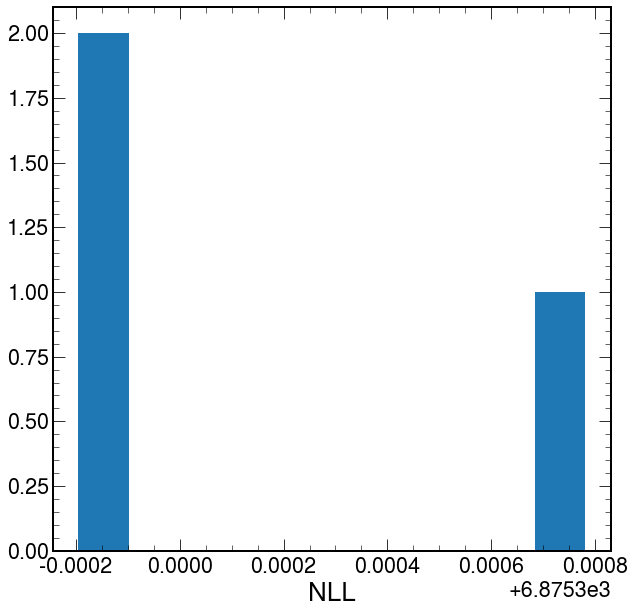

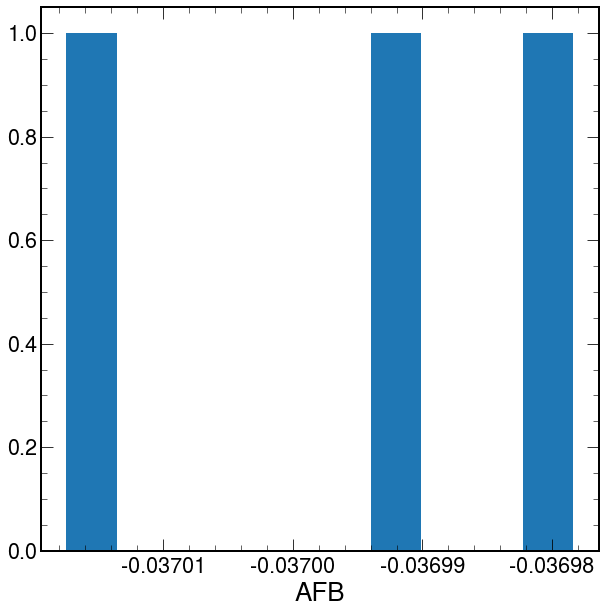

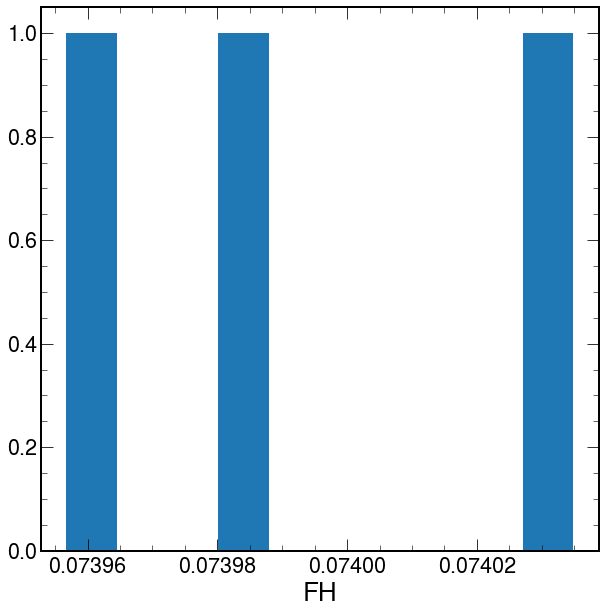

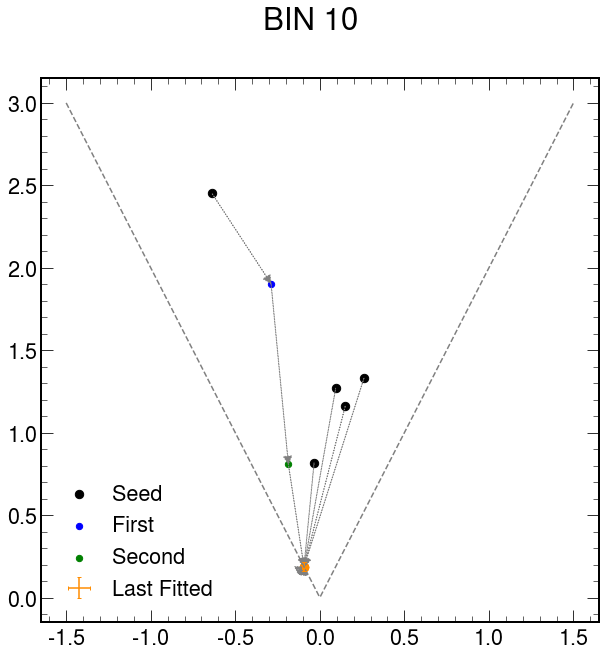

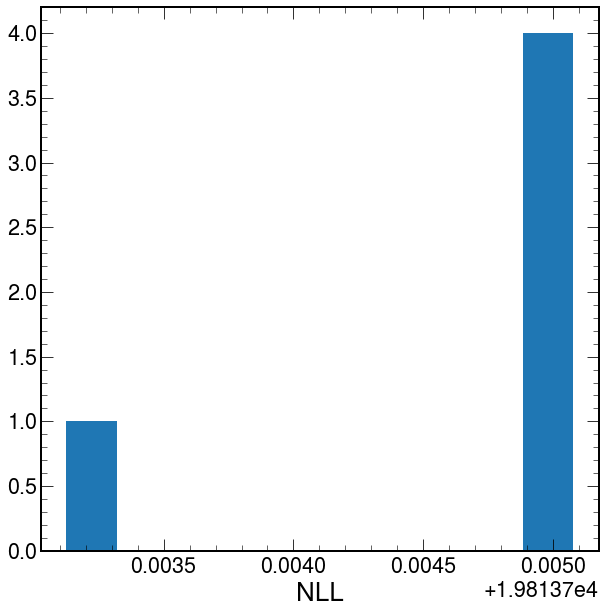

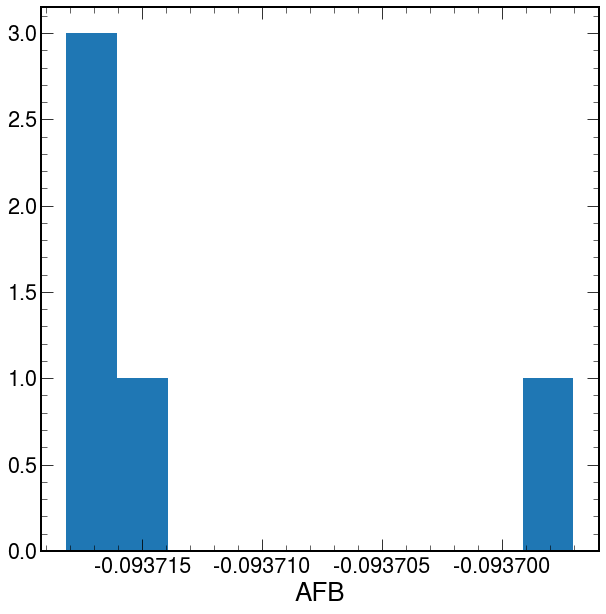

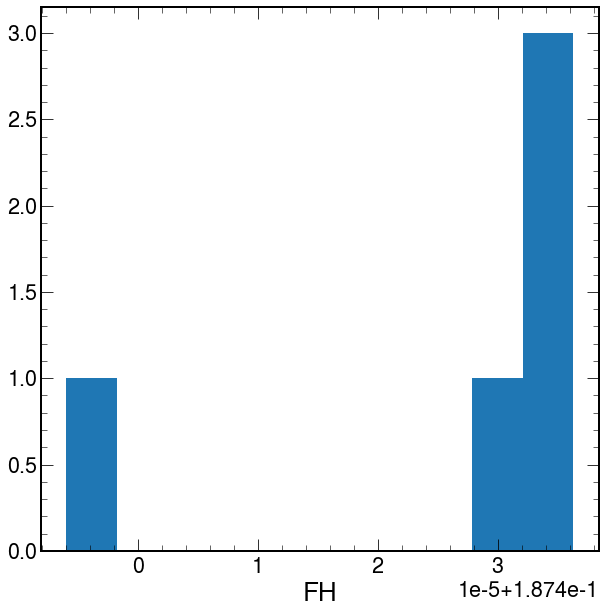

In [114]:
#PLOT FIRST ATTEMPT TO MAKE ITERATIVE FITTING SYMFIT
for bin_, df in dataframes.items():
    
    _percentile = np.percentile(df.NLL2, 5)
    dataframe = df[df.NLL2<_percentile]
    dataframe.replace([np.inf, -np.inf], np.nan)
    dataframe.dropna()
    figure = plt.figure()
    figure.suptitle(bin_.replace('_', ' ').upper())
    
    ax = figure.add_subplot(111)
    plot_iterative_fit(dataframe, ax)
    plt.show()
    
    plt.hist(dataframe['NLL2'])
    plt.xlabel('NLL')
    plt.locator_params(axis='x', nbins=6)
    plt.show()
    
    plt.hist(dataframe['AFB2'])
    plt.xlabel('AFB')
    plt.locator_params(axis='x', nbins=6)
    plt.show()
    
    plt.hist(dataframe['FH2'])
    plt.xlabel('FH')
    plt.locator_params(axis='x', nbins=6)
    plt.show()

In [115]:
len(dataframes)

9

In [ ]:
ax.set_t

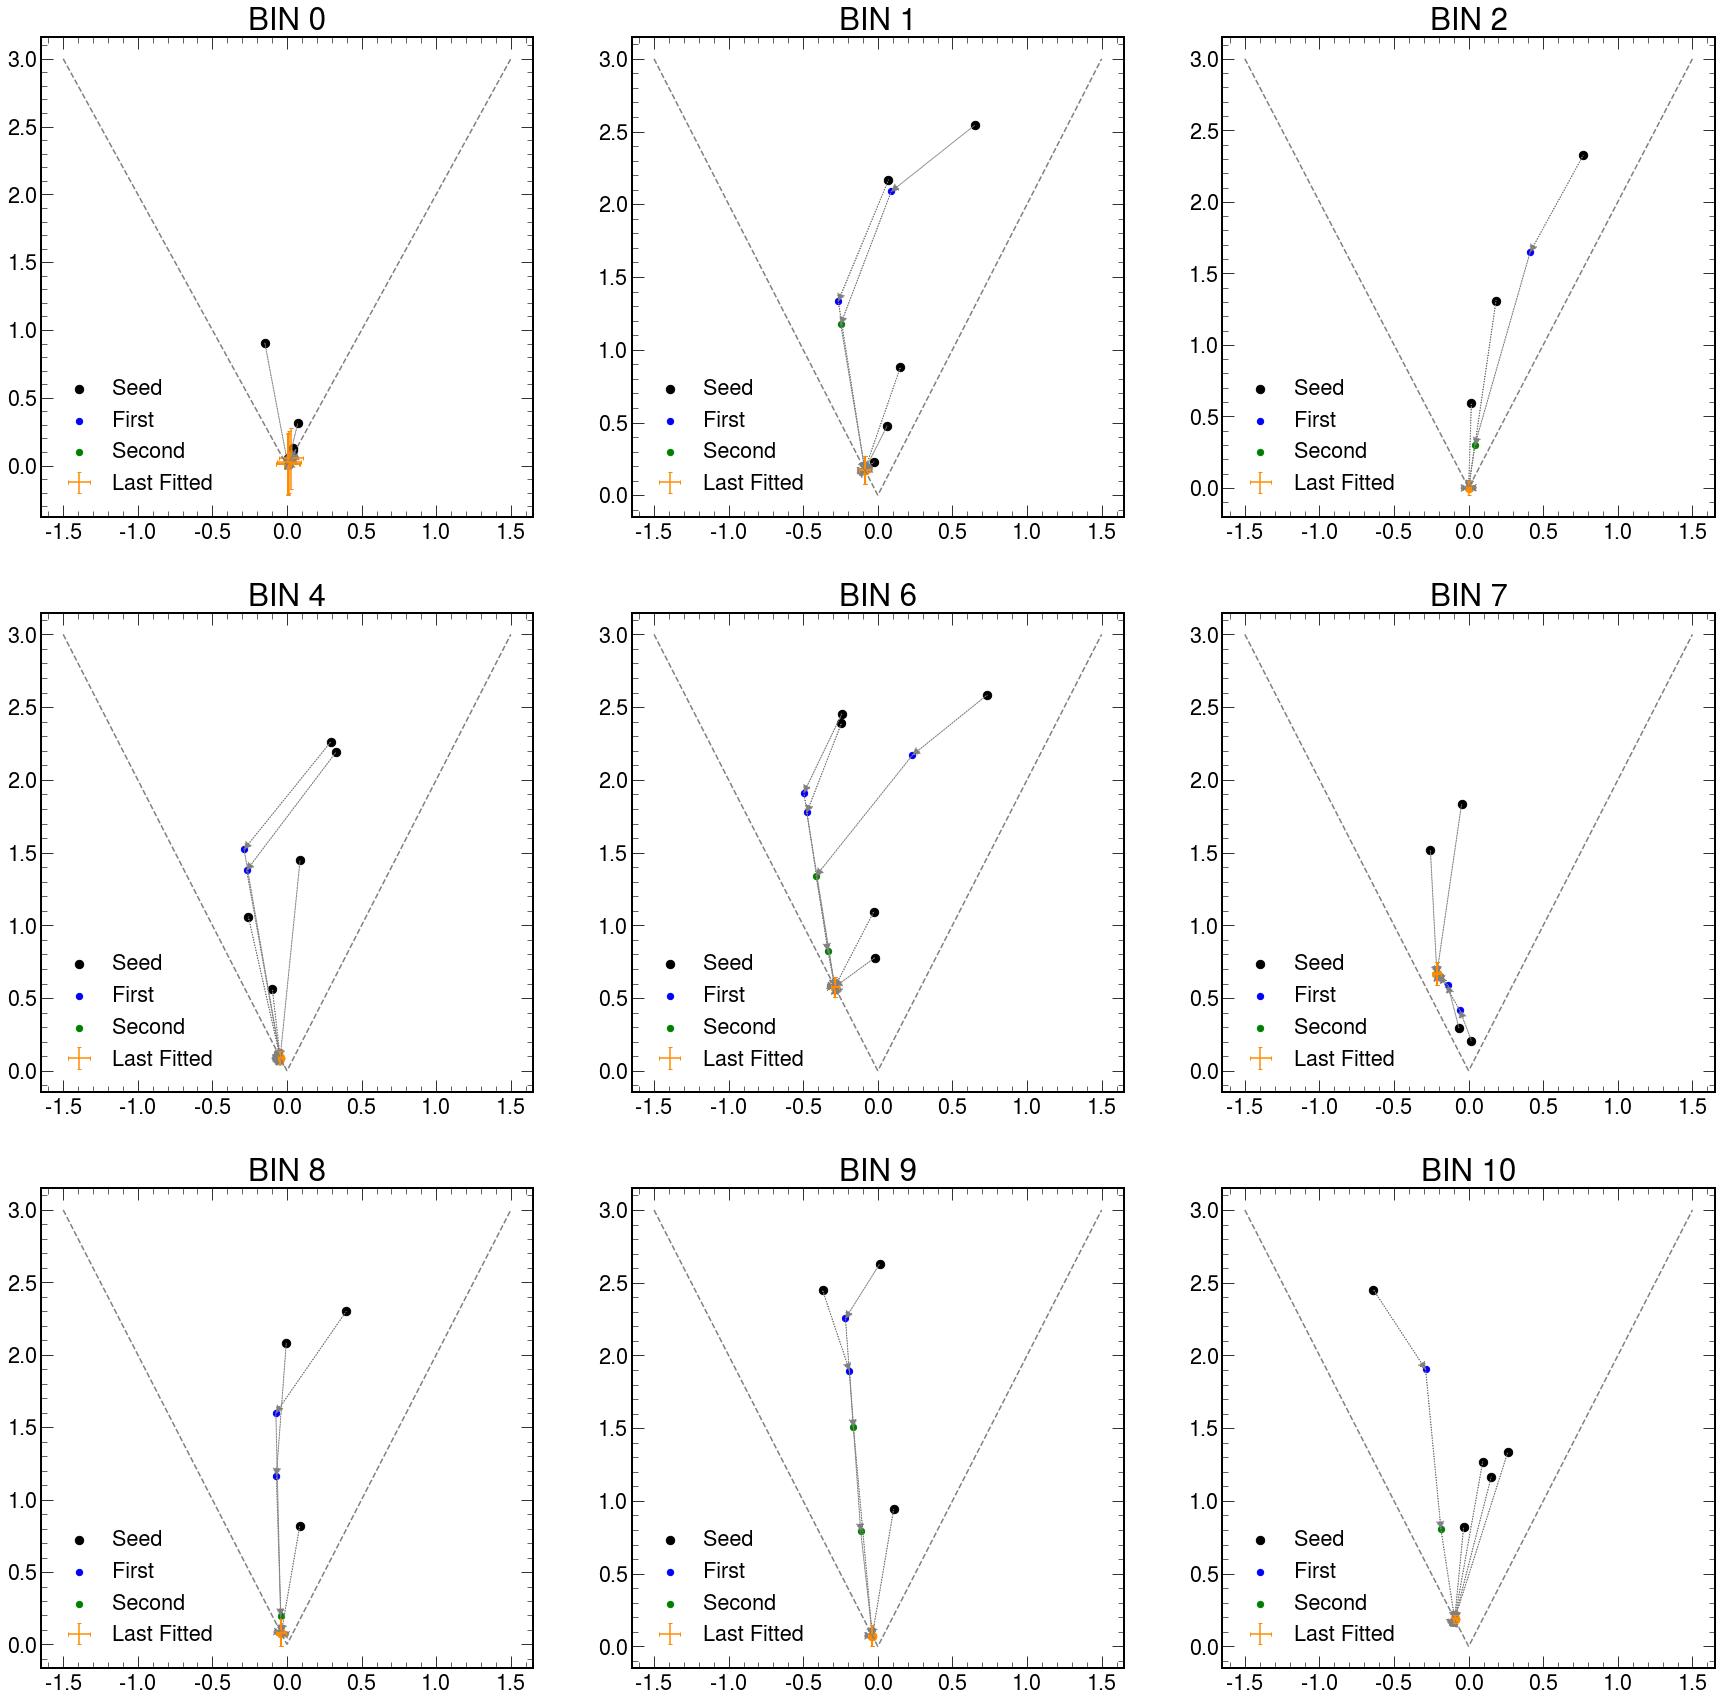

In [127]:
figura = plt.figure(figsize=(30, 30))
for index, (bin_,df) in enumerate(dataframes.items()):
    
    _percentile = np.percentile(df.NLL2, 5)
    dataframe = df[df.NLL2<_percentile]
    dataframe.replace([np.inf, -np.inf], np.nan)
    dataframe.dropna()
    
    ax = figura.add_subplot(3,3,index+1)
    plot_iterative_fit(dataframe, ax)
    ax.set_title(bin_.replace('_', ' ').upper())
    ax.legend(loc=3)

plt.show()

for bin_, df in dataframes.items():
    
    _percentile = np.percentile(df.NLL2, 5)
    dataframe = df[df.NLL2<_percentile]
    dataframe.replace([np.inf, -np.inf], np.nan)
    dataframe.dropna()
    plt.figure()
    plt.title(bin_)
    xx_ = np.linspace(-1.5, 1.5, 1000)
    plt.plot(xx_, np.abs(xx_)*2, ls='--', color='grey')

    plt.scatter(dataframe['afb_ini'], dataframe['fh_ini'], s=70, label='Seed', color='black')
    plt.scatter(dataframe['AFB0'], dataframe['FH0'], s=40, color='blue', label='First')
    plt.scatter(dataframe['AFB1'], dataframe['FH1'], s=40, color='green', label='Second')
    plt.scatter(dataframe['AFB2'], dataframe['FH2'], s=70, color='darkorange')

    
    plt.errorbar(dataframe['AFB2'], dataframe['FH2'],
                 xerr=dataframe['errAFB2'], yerr=dataframe['errFH2'],
                ls='none', label='Last Fitted', color='darkorange',
                 capsize=2
                )
       
    #plt.scatter(random_BH_SLSQP['AFB2'], random_BH_SLSQP['FH2'])
    #for i in range(len(dataframe)):
    for i in dataframe.index:
        x_, y_ = dataframe['afb_ini'][i], dataframe['fh_ini'][i]
        x0, y0 = dataframe['AFB0'][i], dataframe['FH0'][i]
        x1, y1 = dataframe['AFB1'][i], dataframe['FH1'][i]
        x2, y2 = dataframe['AFB2'][i], dataframe['FH2'][i]

        arrow_size=0.05

        plt.arrow(x_, y_, (x0-x_), (y0-y_),
                 head_width=arrow_size,
                 head_length=arrow_size,
                  color='grey', 
                  ls=':',
                 length_includes_head=True
                 )
        plt.arrow(x0, y0, (x1-x0), (y1-y0),
                 head_width=arrow_size,
                 head_length=arrow_size,
                  color='grey', 
                  ls=':',
                 length_includes_head=True
                 )
        plt.arrow(x1, y1, (x2-x1), (y2-y1),
                 head_width=arrow_size,
                 head_length=arrow_size,
                  color='grey', 
                  ls=':',
                 length_includes_head=True
                 )
    plt.legend()
    plt.show()
    
    plt.hist(dataframe['NLL2'])
    plt.xlabel('NLL')
    plt.locator_params(axis='x', nbins=6)
    plt.show()
    
    plt.hist(dataframe['AFB2'])
    plt.xlabel('AFB')
    plt.locator_params(axis='x', nbins=6)
    plt.show()
    
    plt.hist(dataframe['FH2'])
    plt.xlabel('FH')
    plt.locator_params(axis='x', nbins=6)
    plt.show()

(-0.05, 0.8)

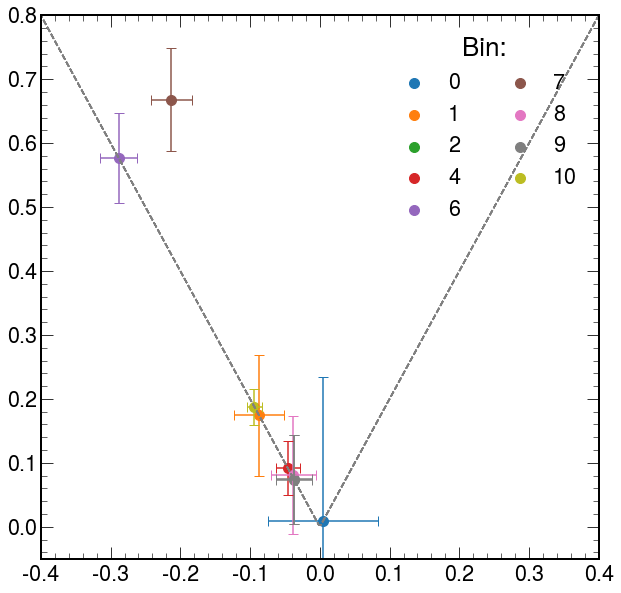

In [167]:
fig = plt.figure()
_1 = fig.add_subplot(1,1,1)
plot_all_bins_lowestNLL(dataframes, _1)
_1.set_xlim(-0.4,0.4)
_1.set_ylim(-0.05, 0.8)

(-0.05, 0.8)

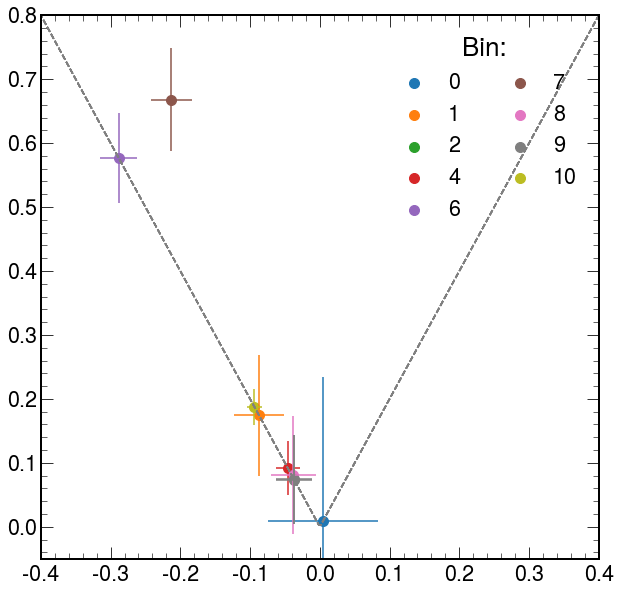

In [151]:
fig = plt.figure()
_1 = fig.add_subplot(1,1,1)

for index, (bin_,df) in enumerate(dataframes.items()):
    plot_physical_boundaries(_1)
    minimo = df[df.NLL2==np.min(df.NLL2)]
    _1.scatter(minimo.AFB2, minimo.FH2, label=bin_.split('_')[1], s=100)
    _1.errorbar(minimo.AFB2, minimo.FH2, xerr = minimo.errAFB2, yerr = minimo.errFH2)
    #_1
    
_1.legend(title='Bin: ', ncol=2, fancybox=True, facecolor='black', loc=1)
_1.set_xlim(-0.4,0.4)
_1.set_ylim(-0.05, 0.8)

In [368]:
pdf = PdfPages('symfitMeasurement.pdf')

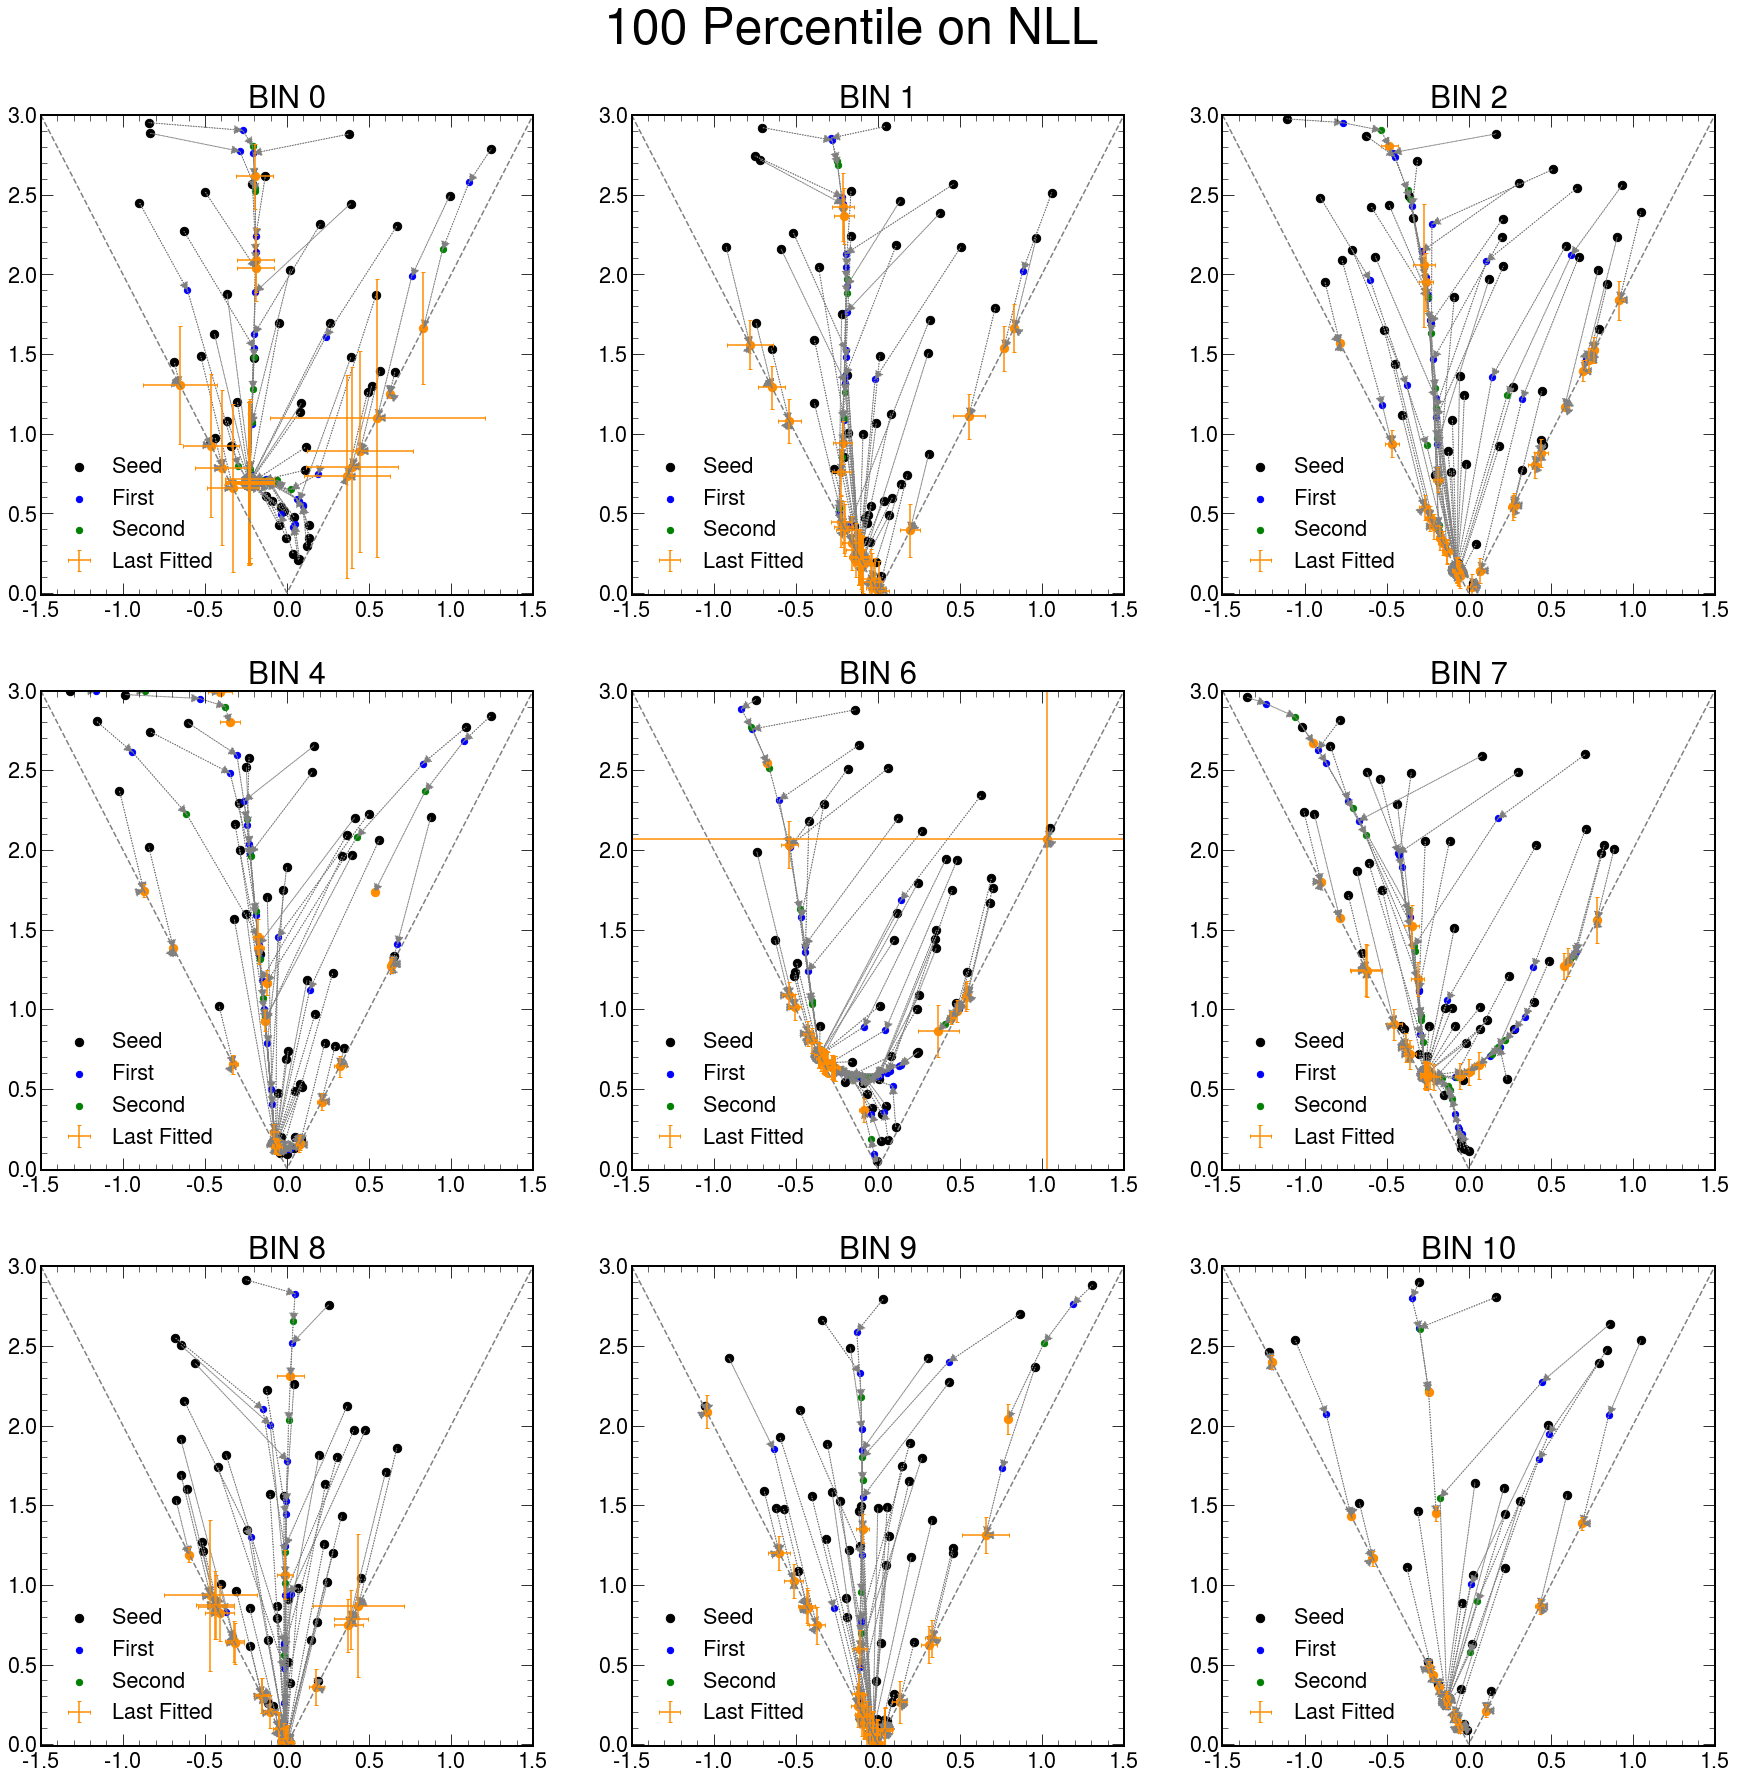

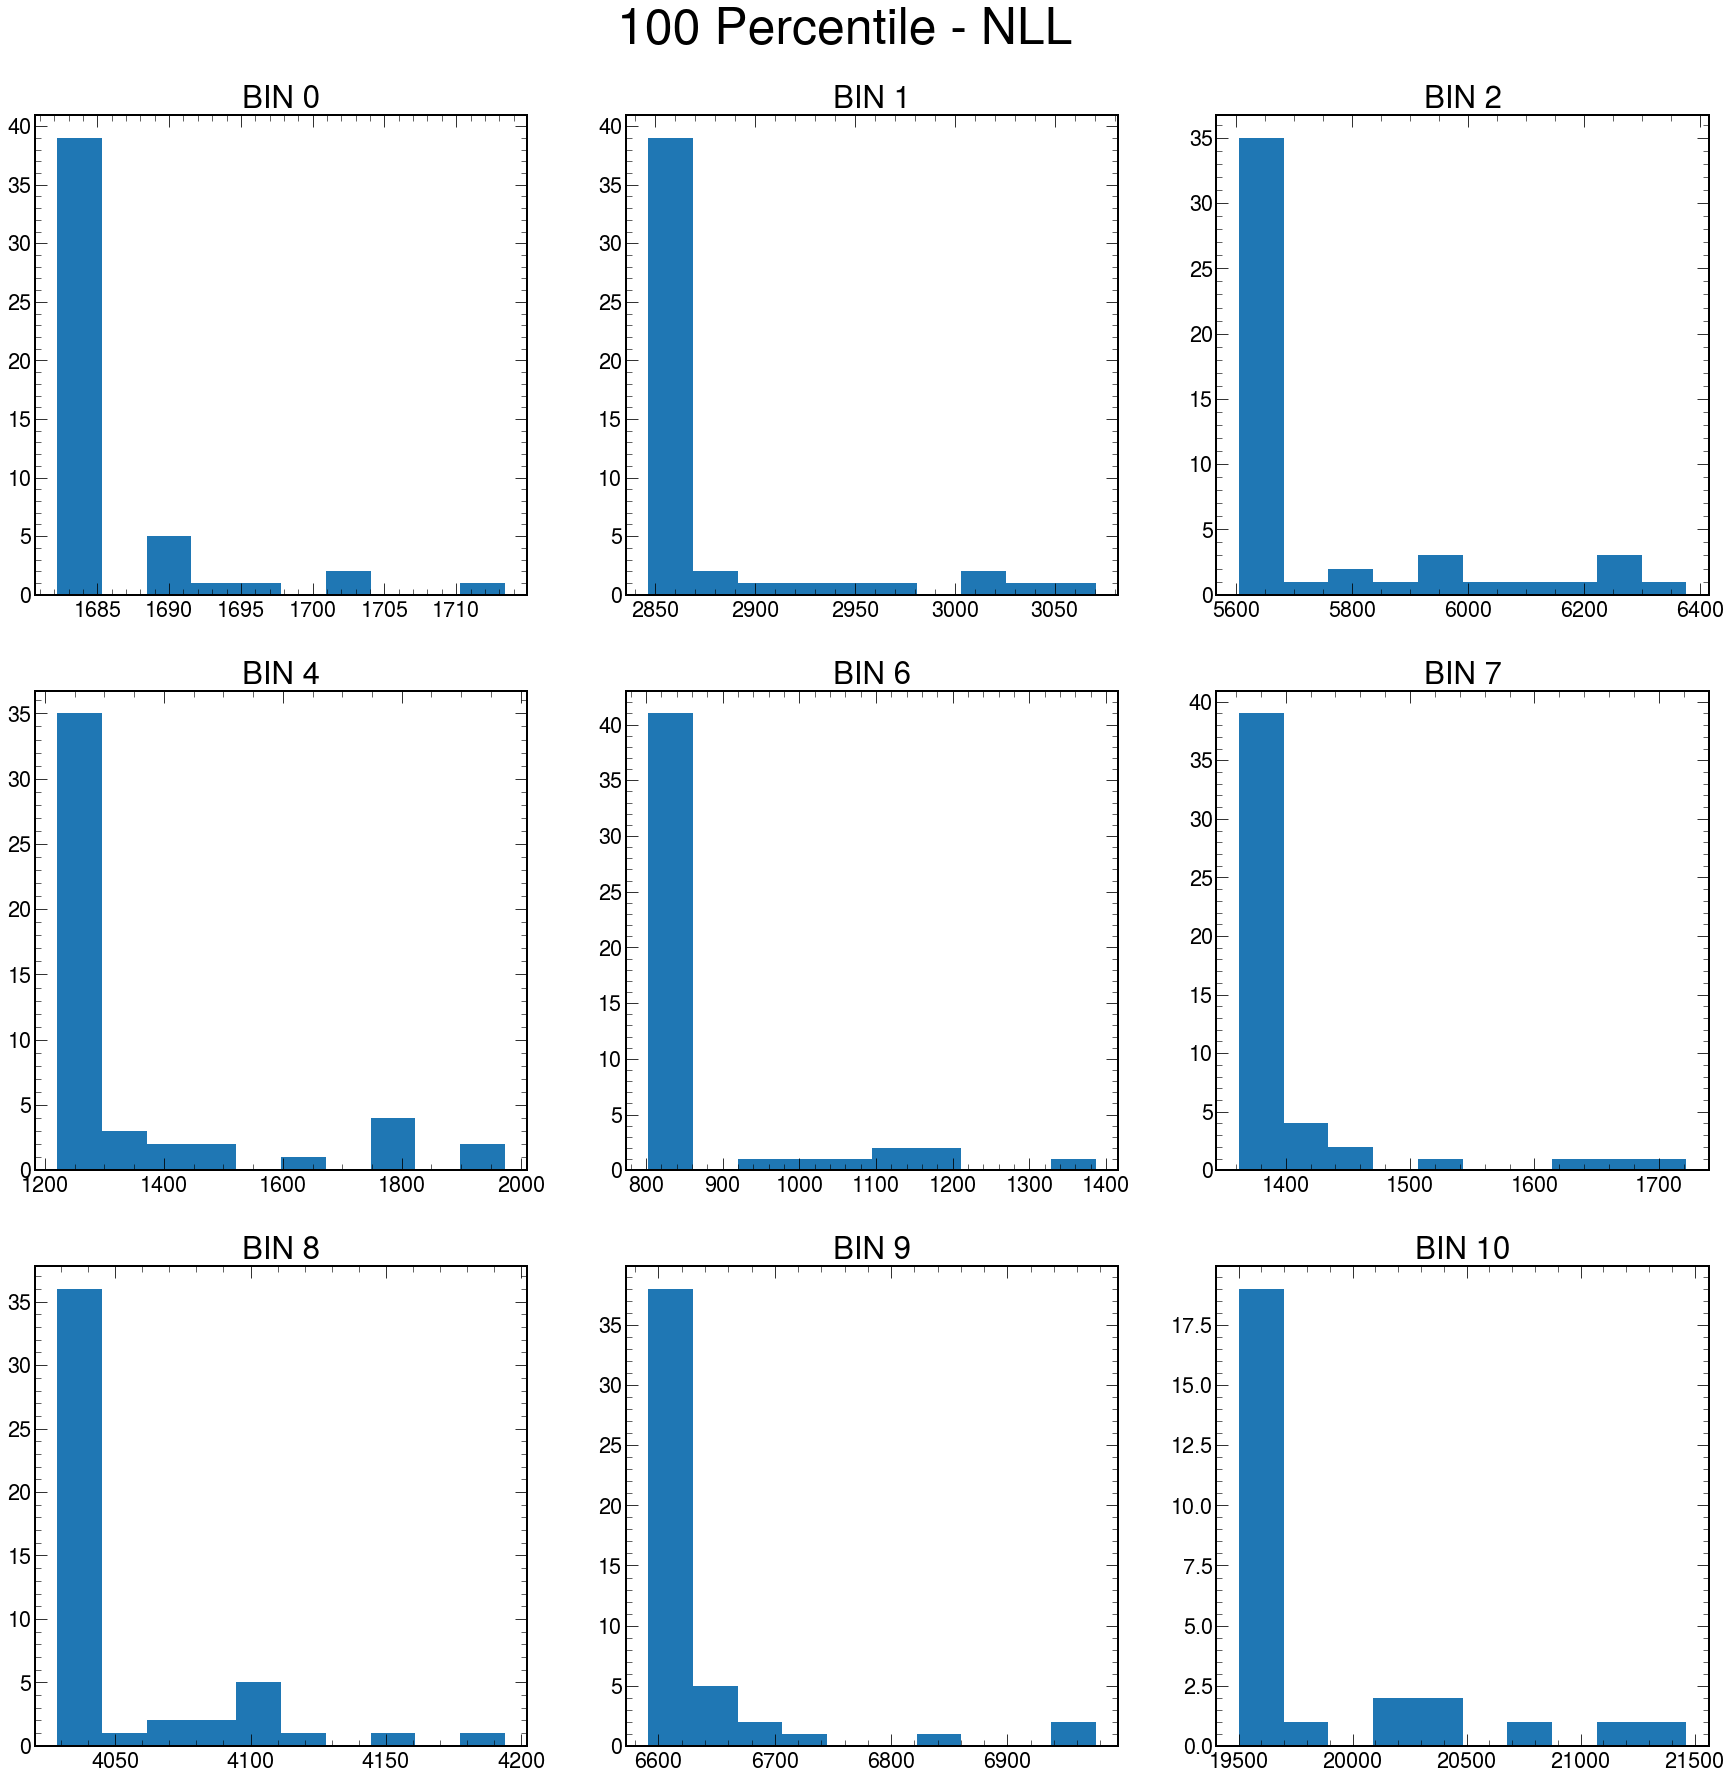

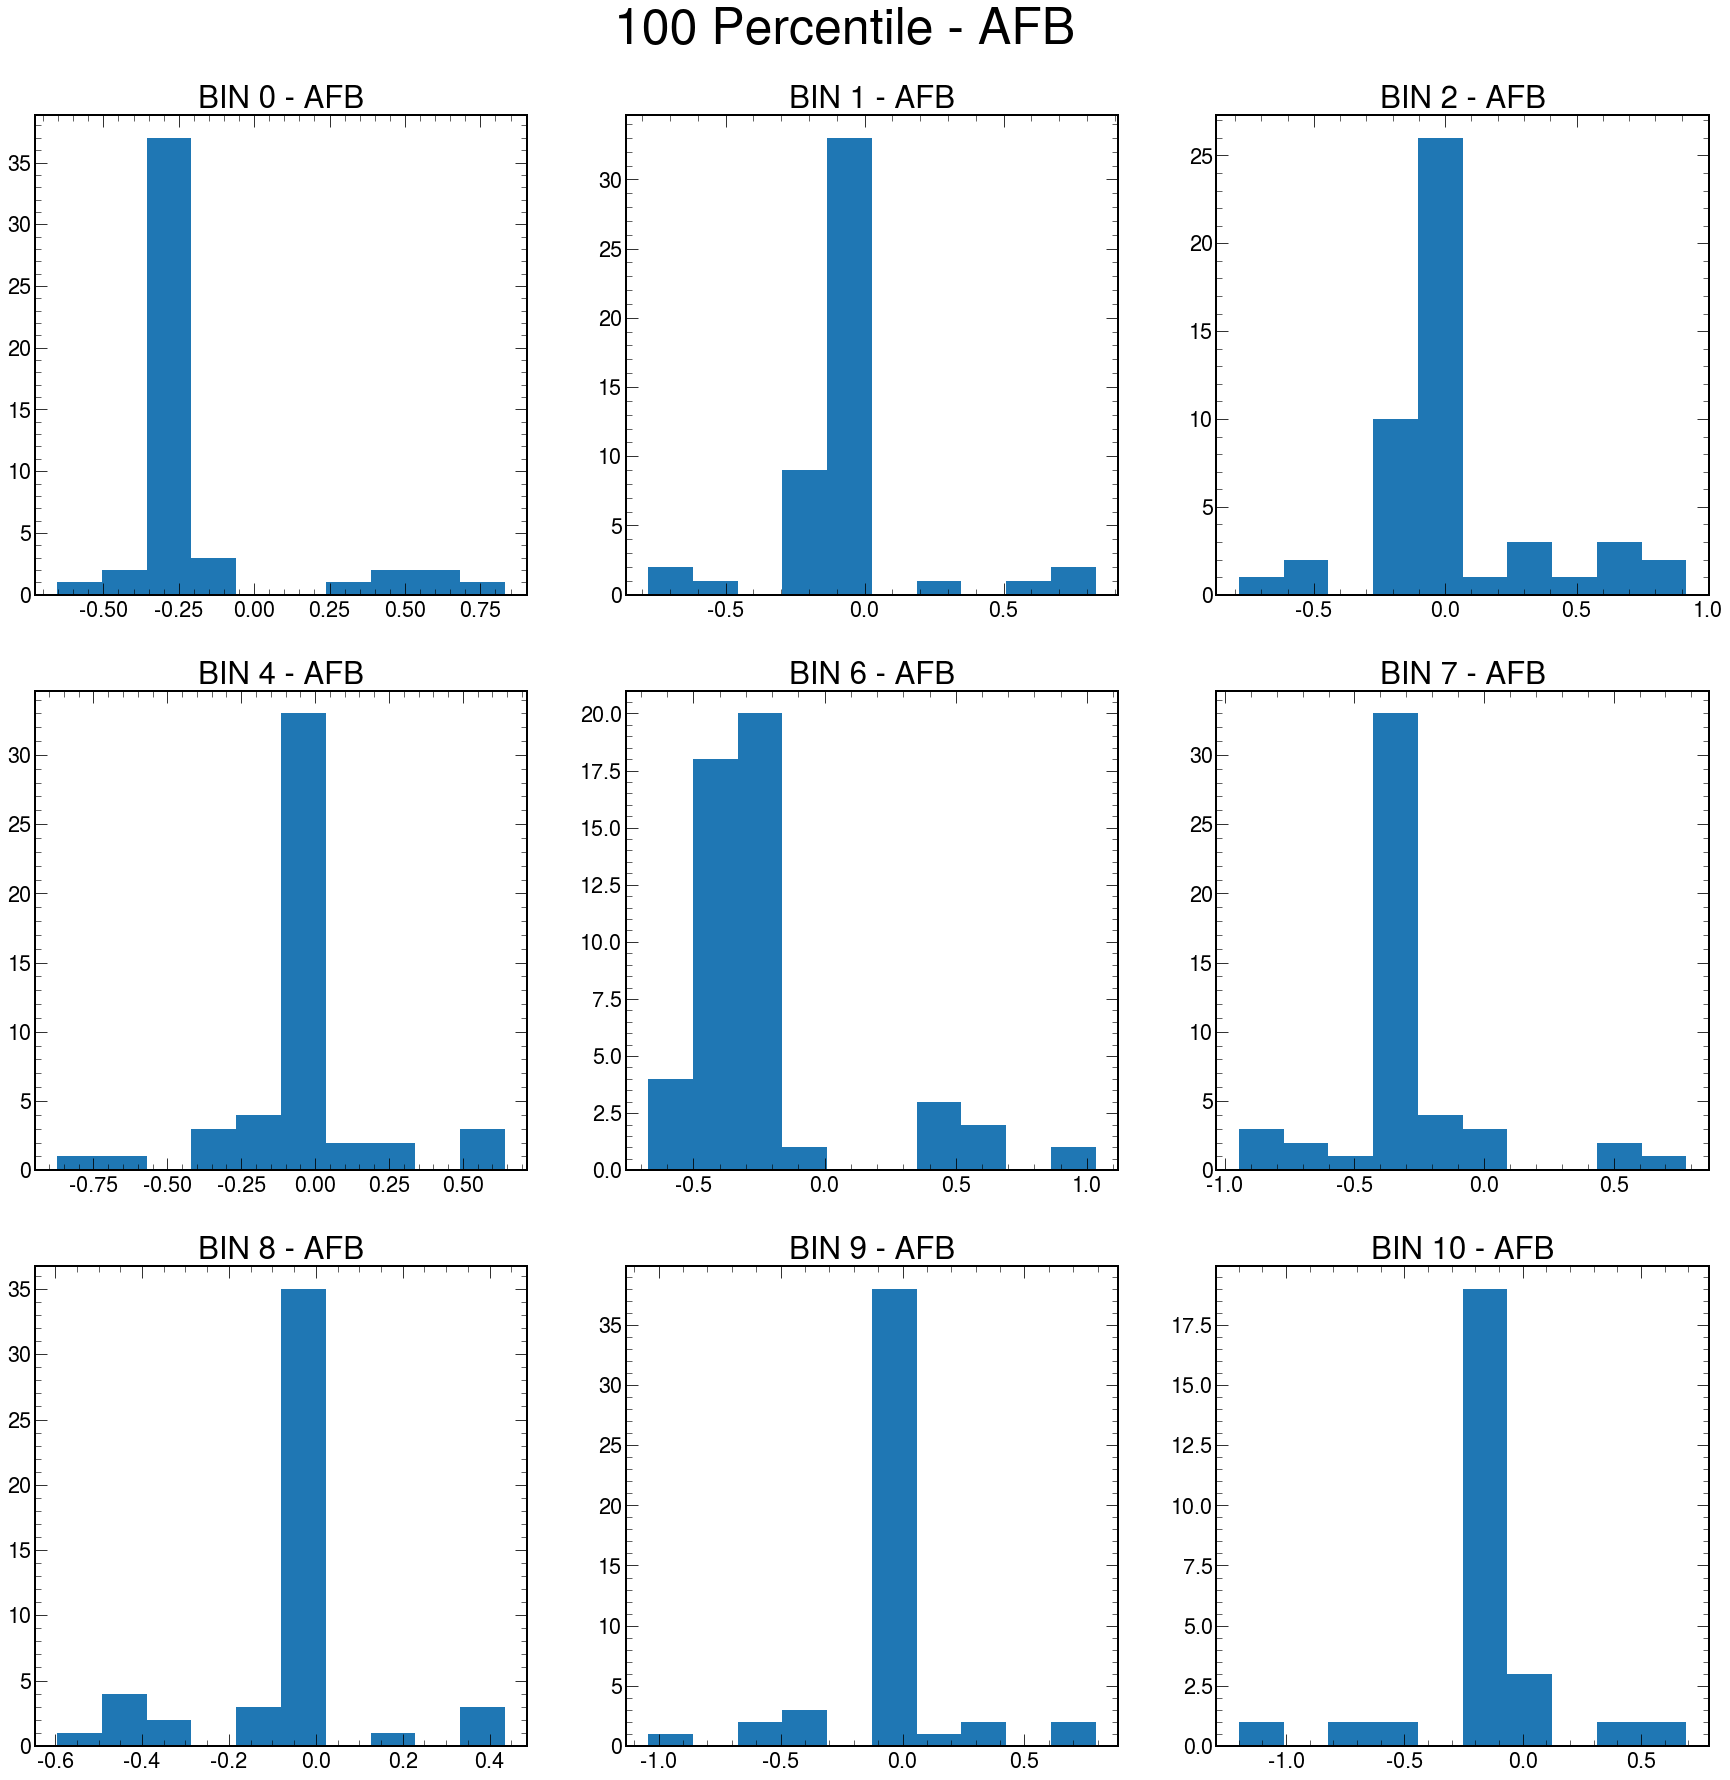

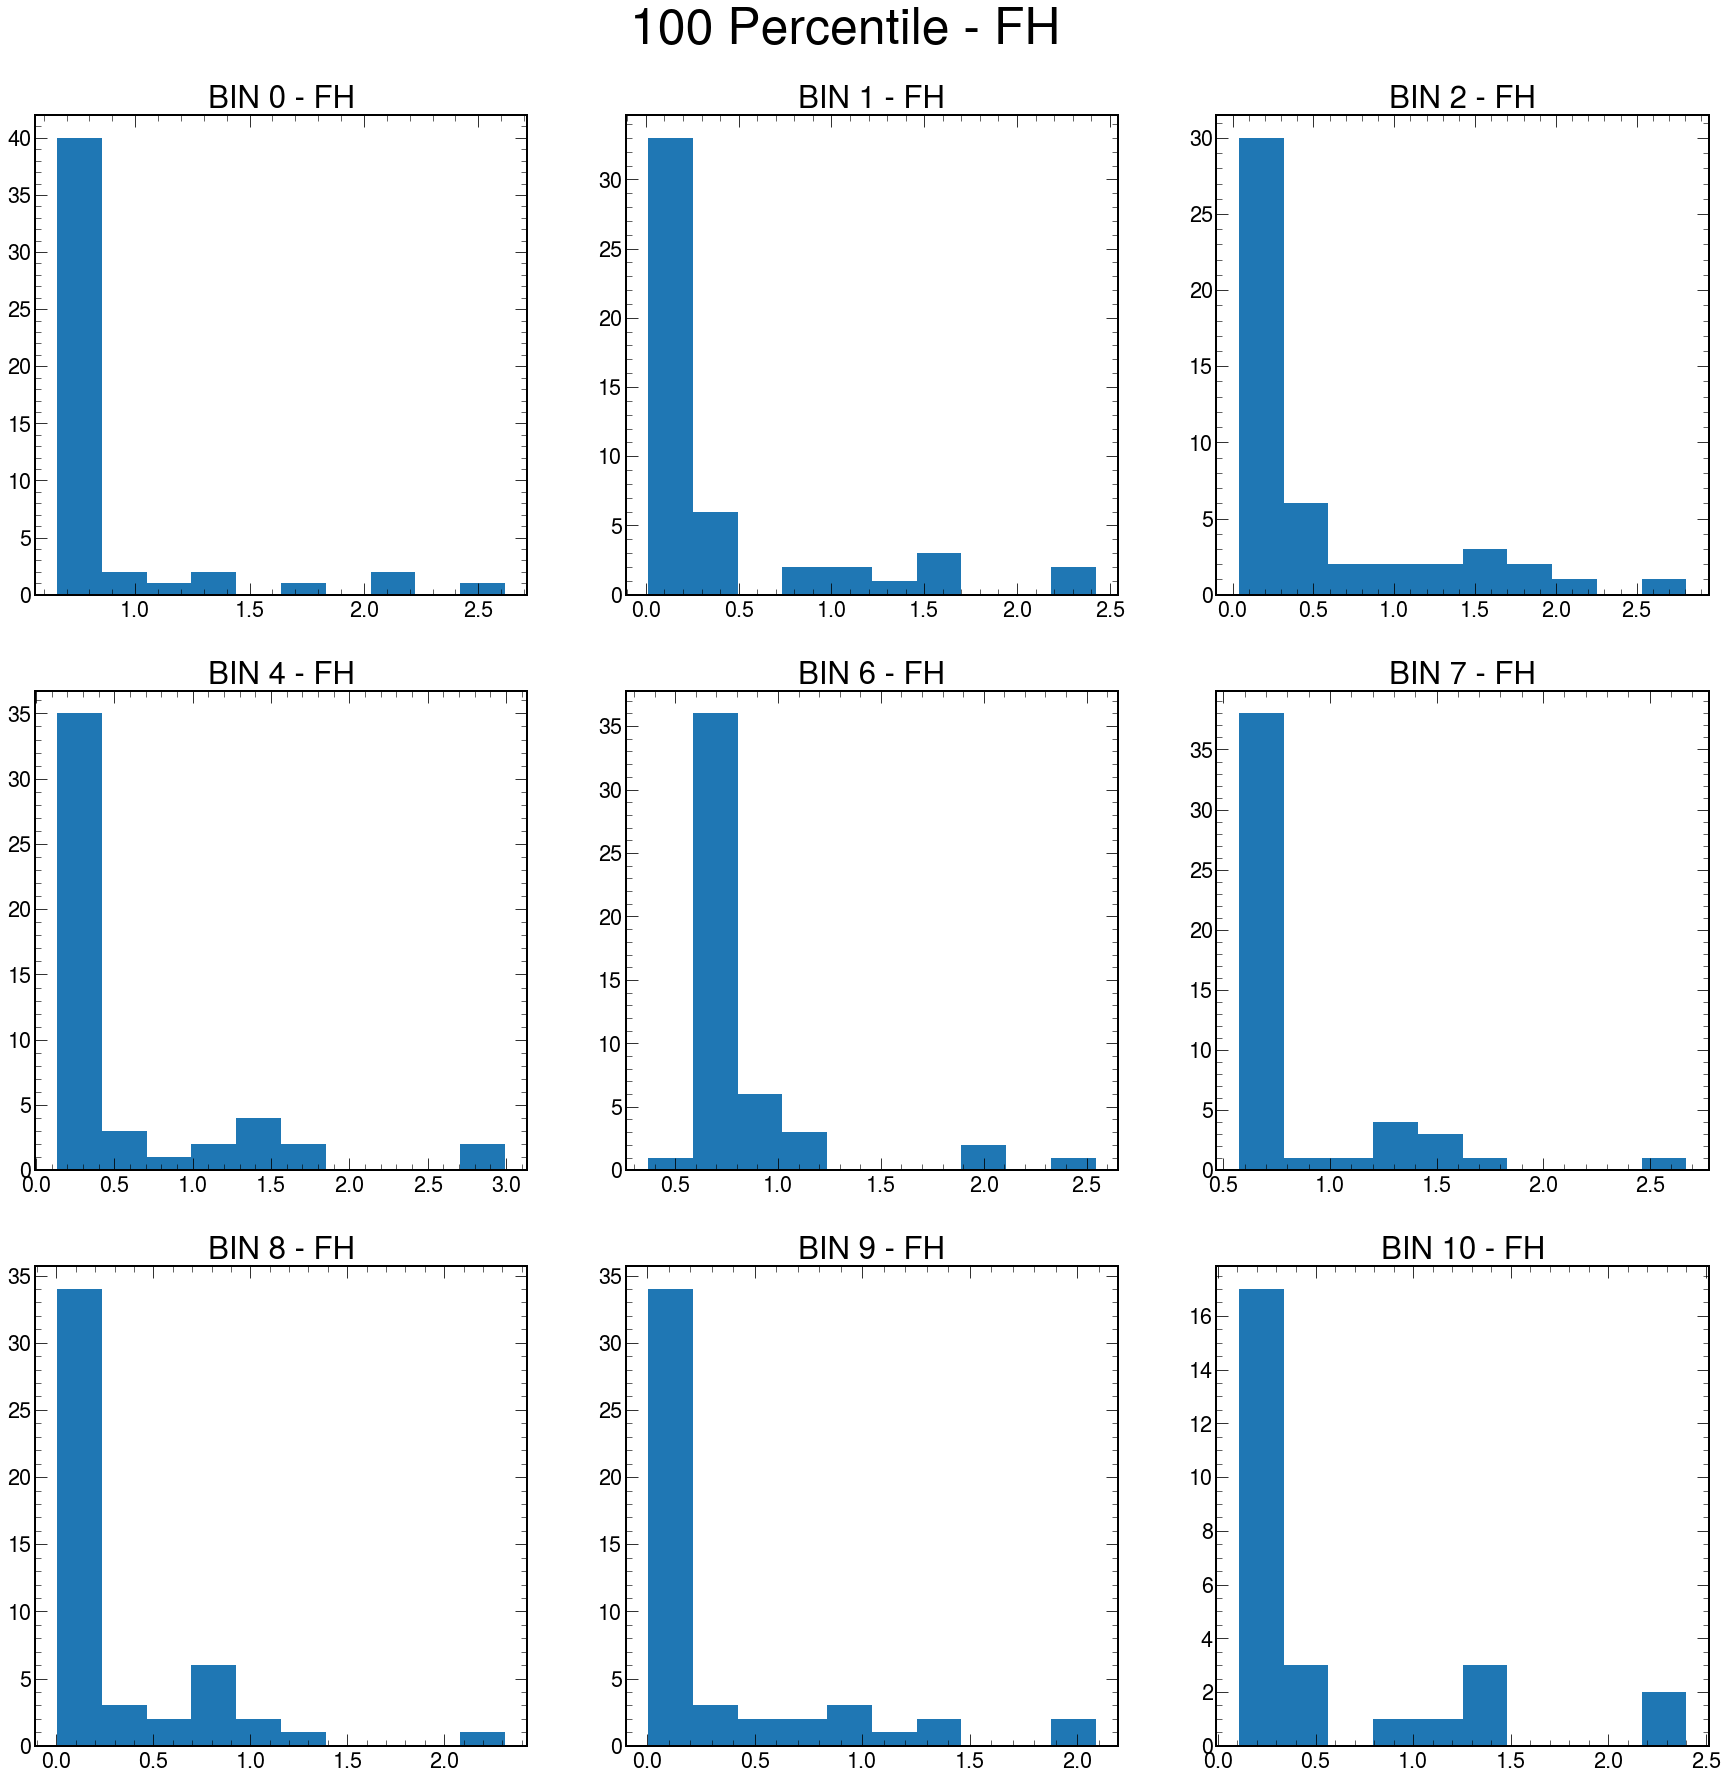

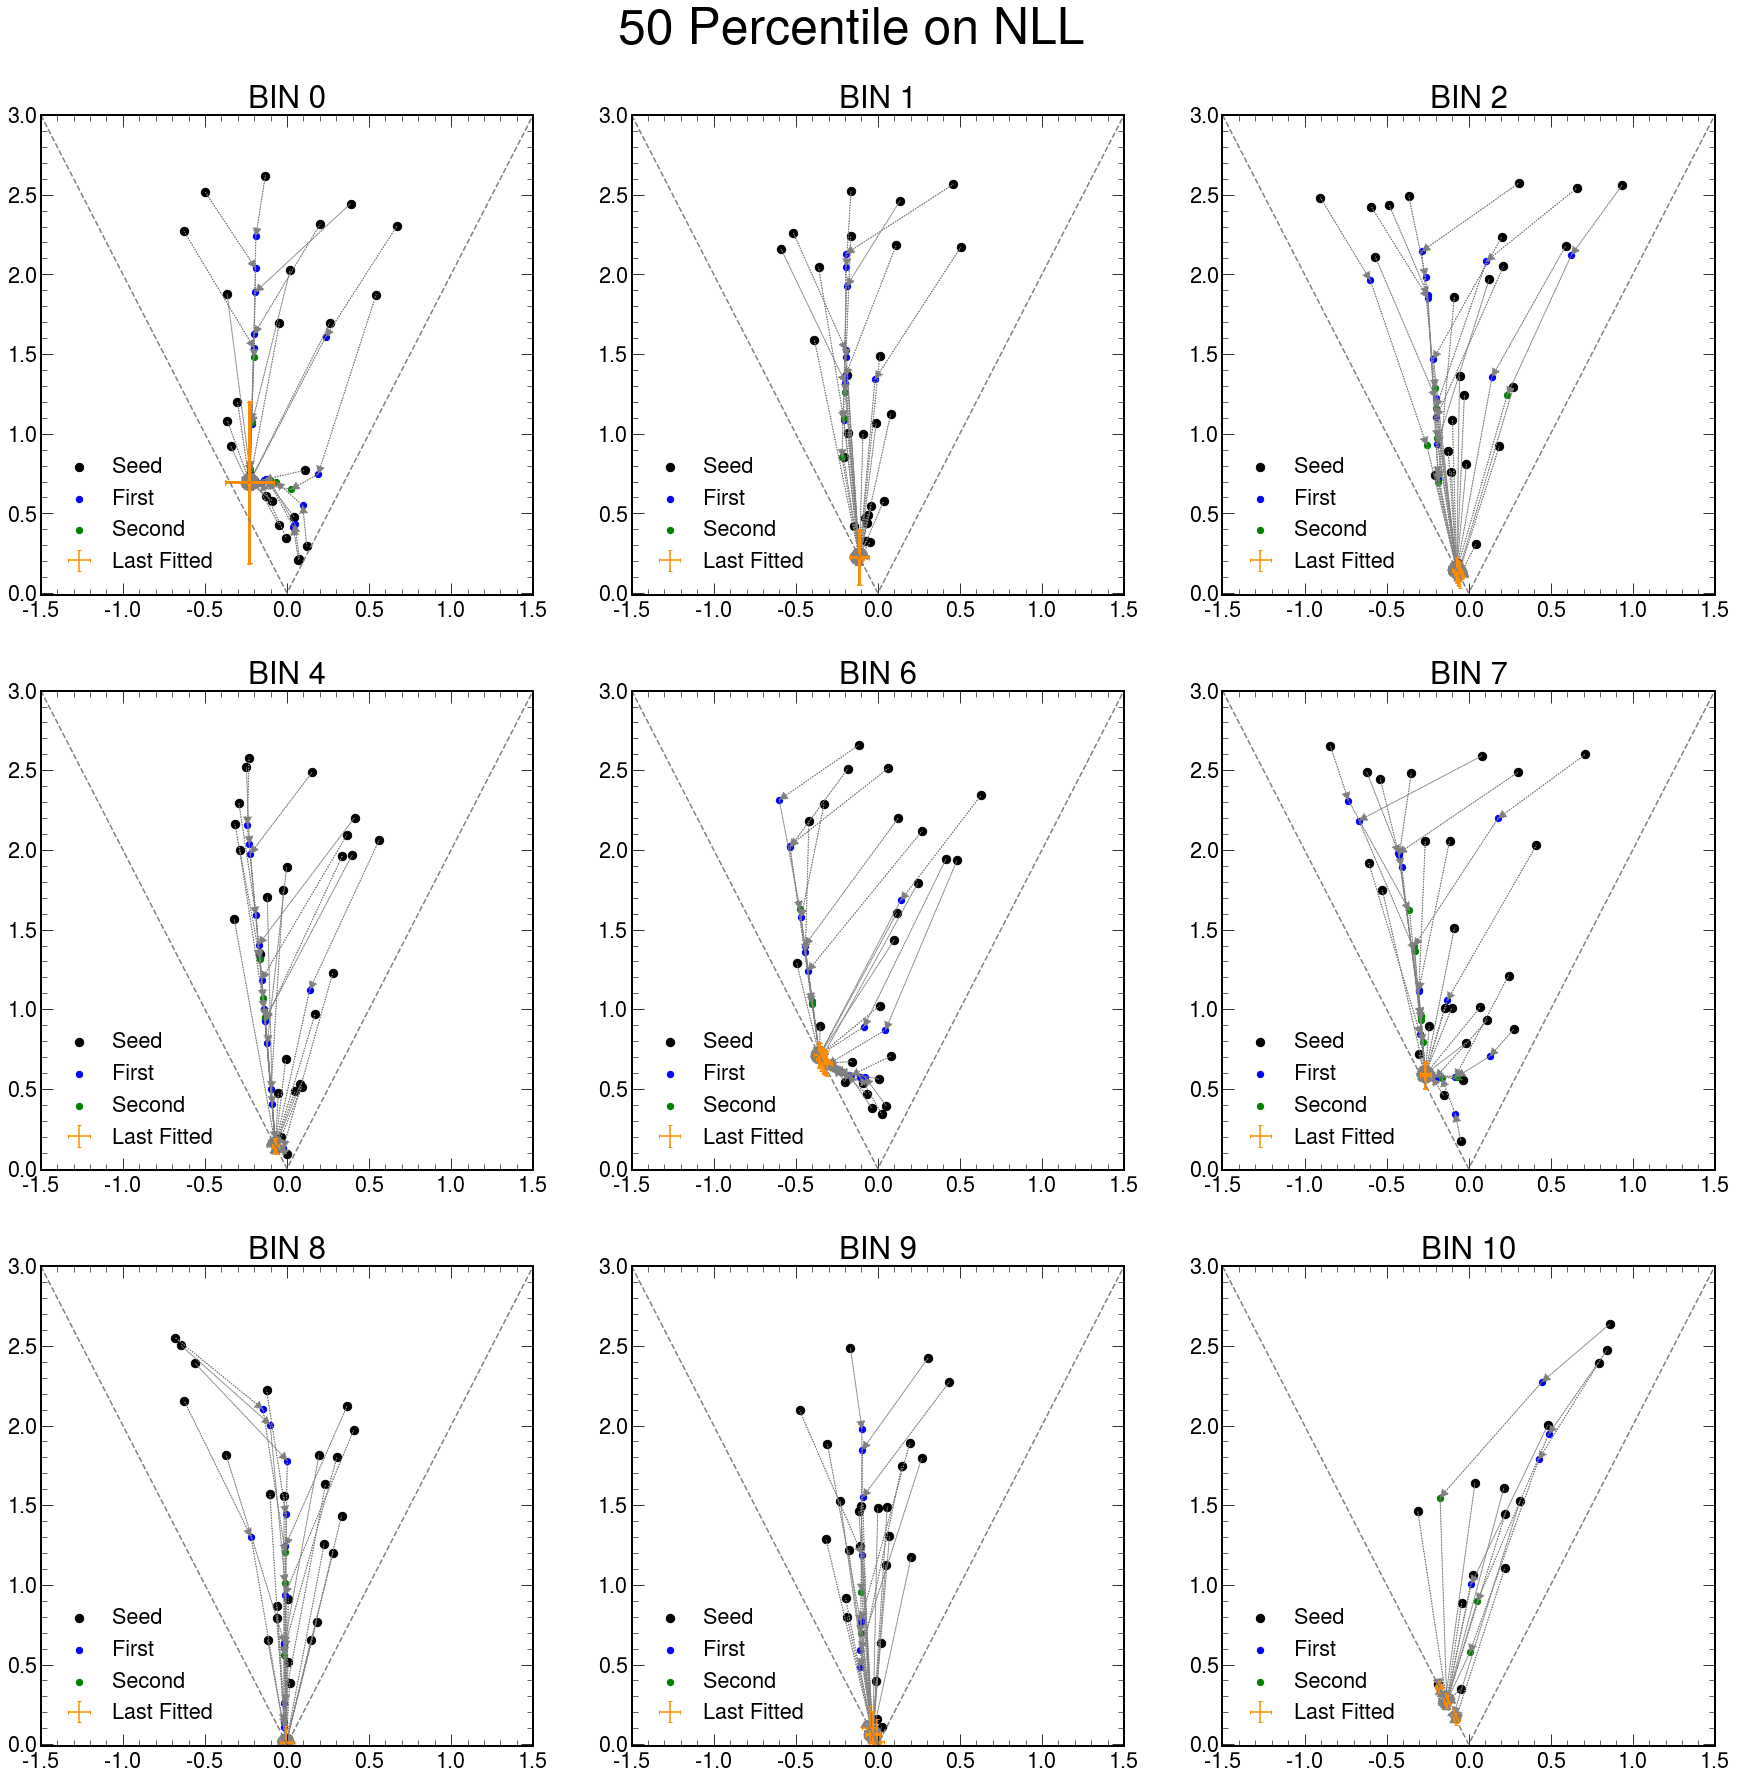

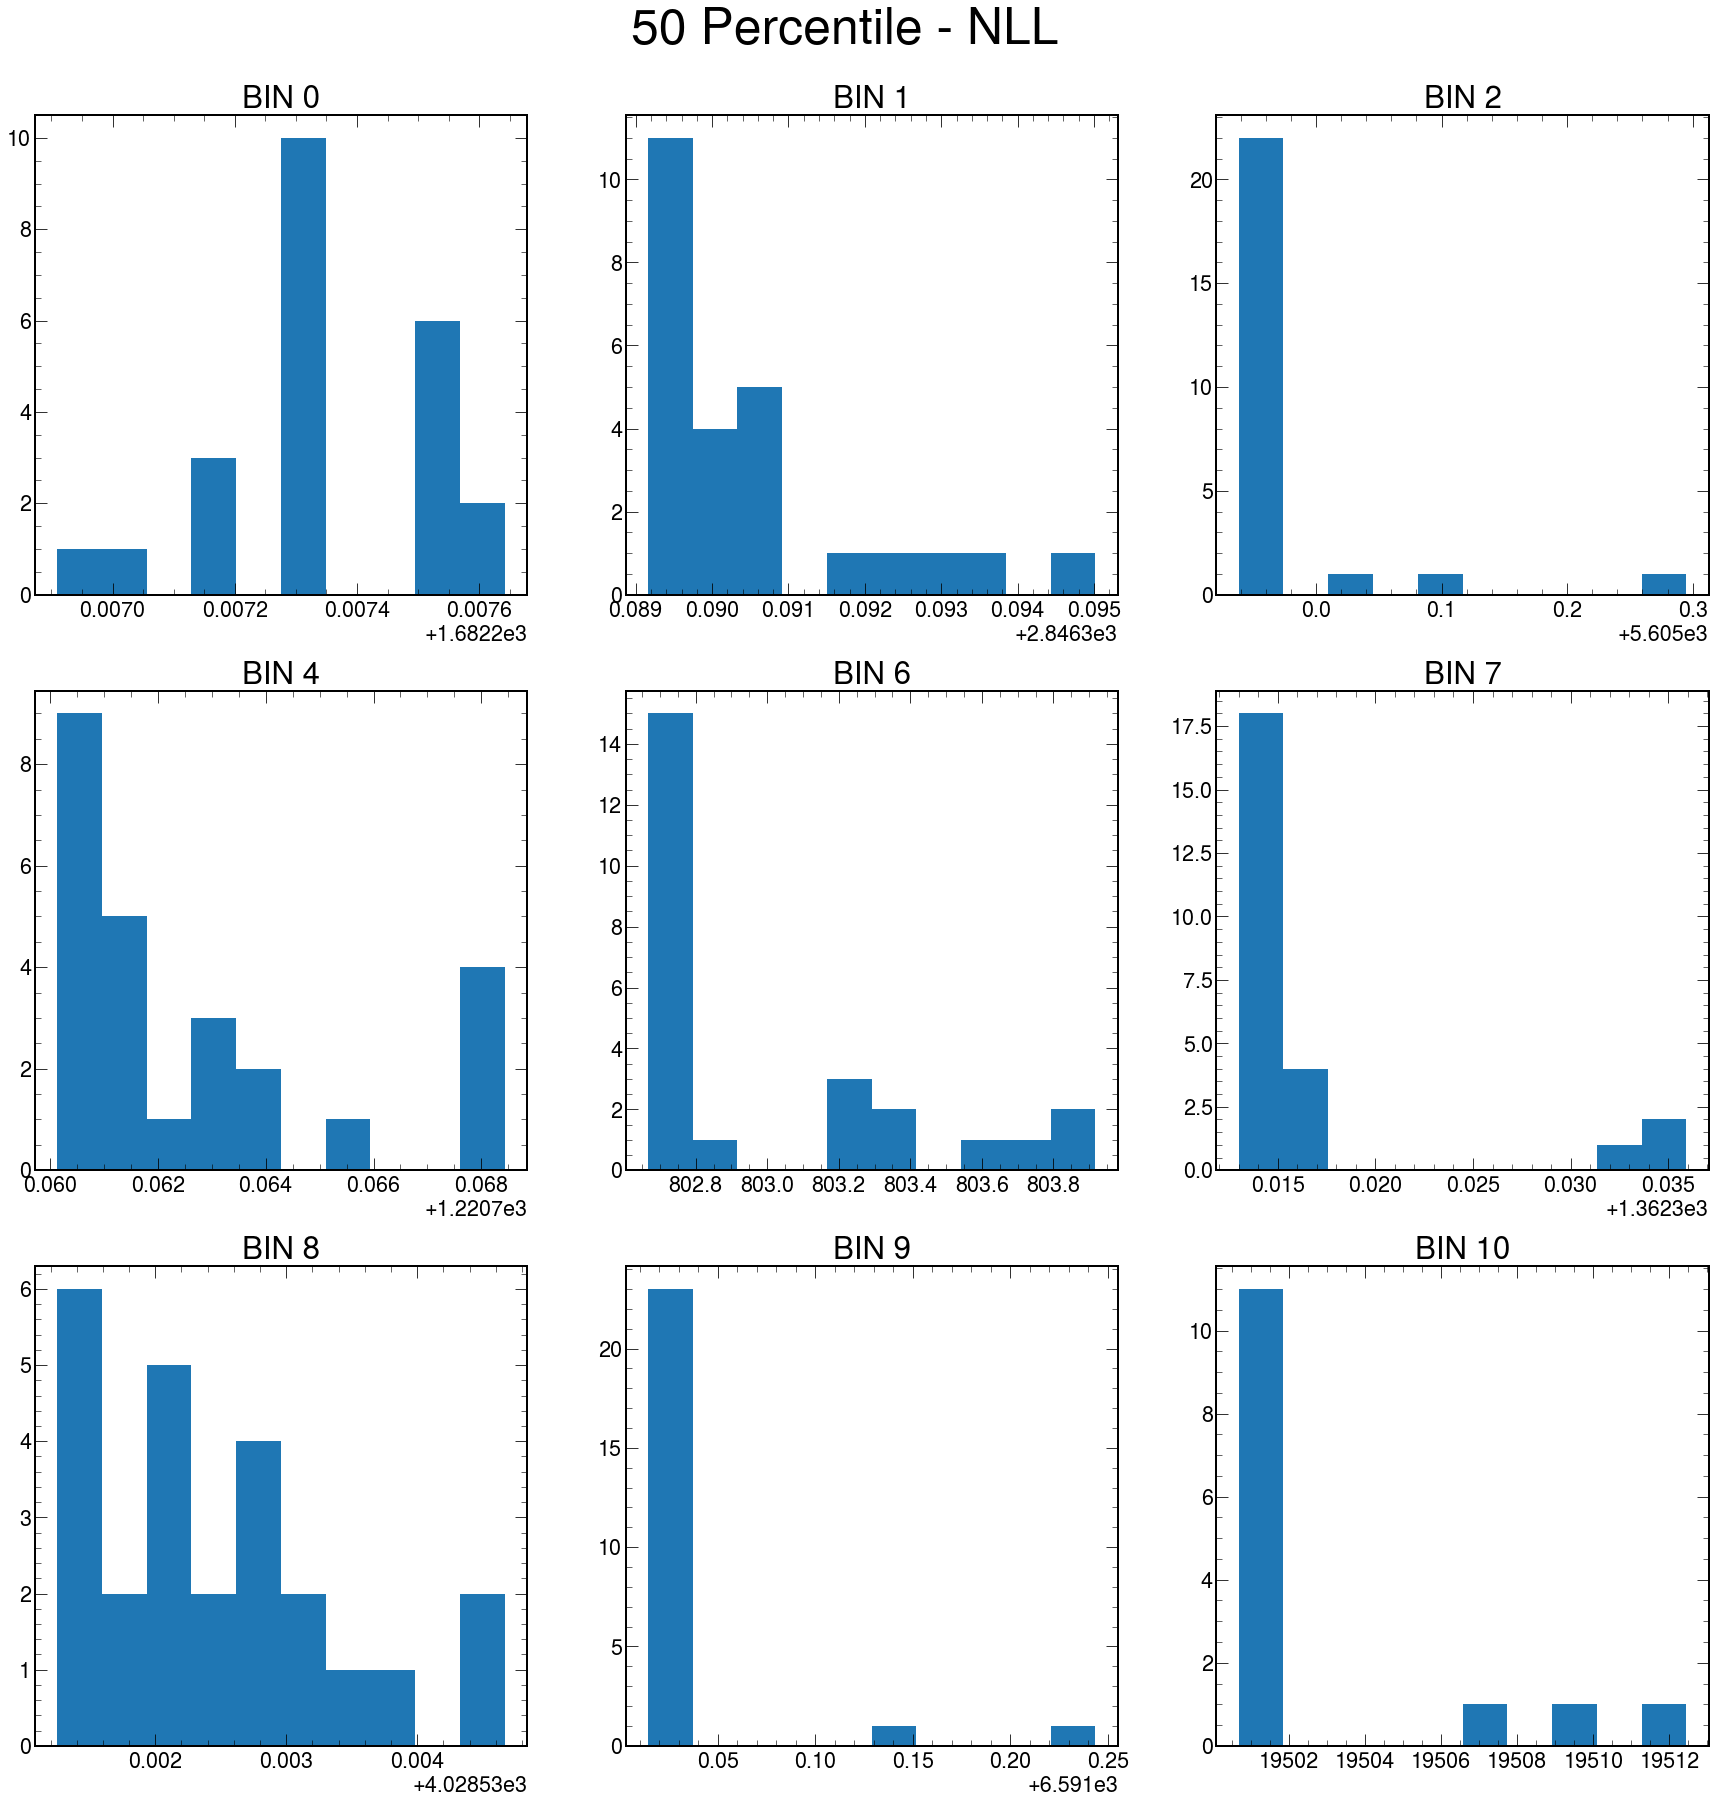

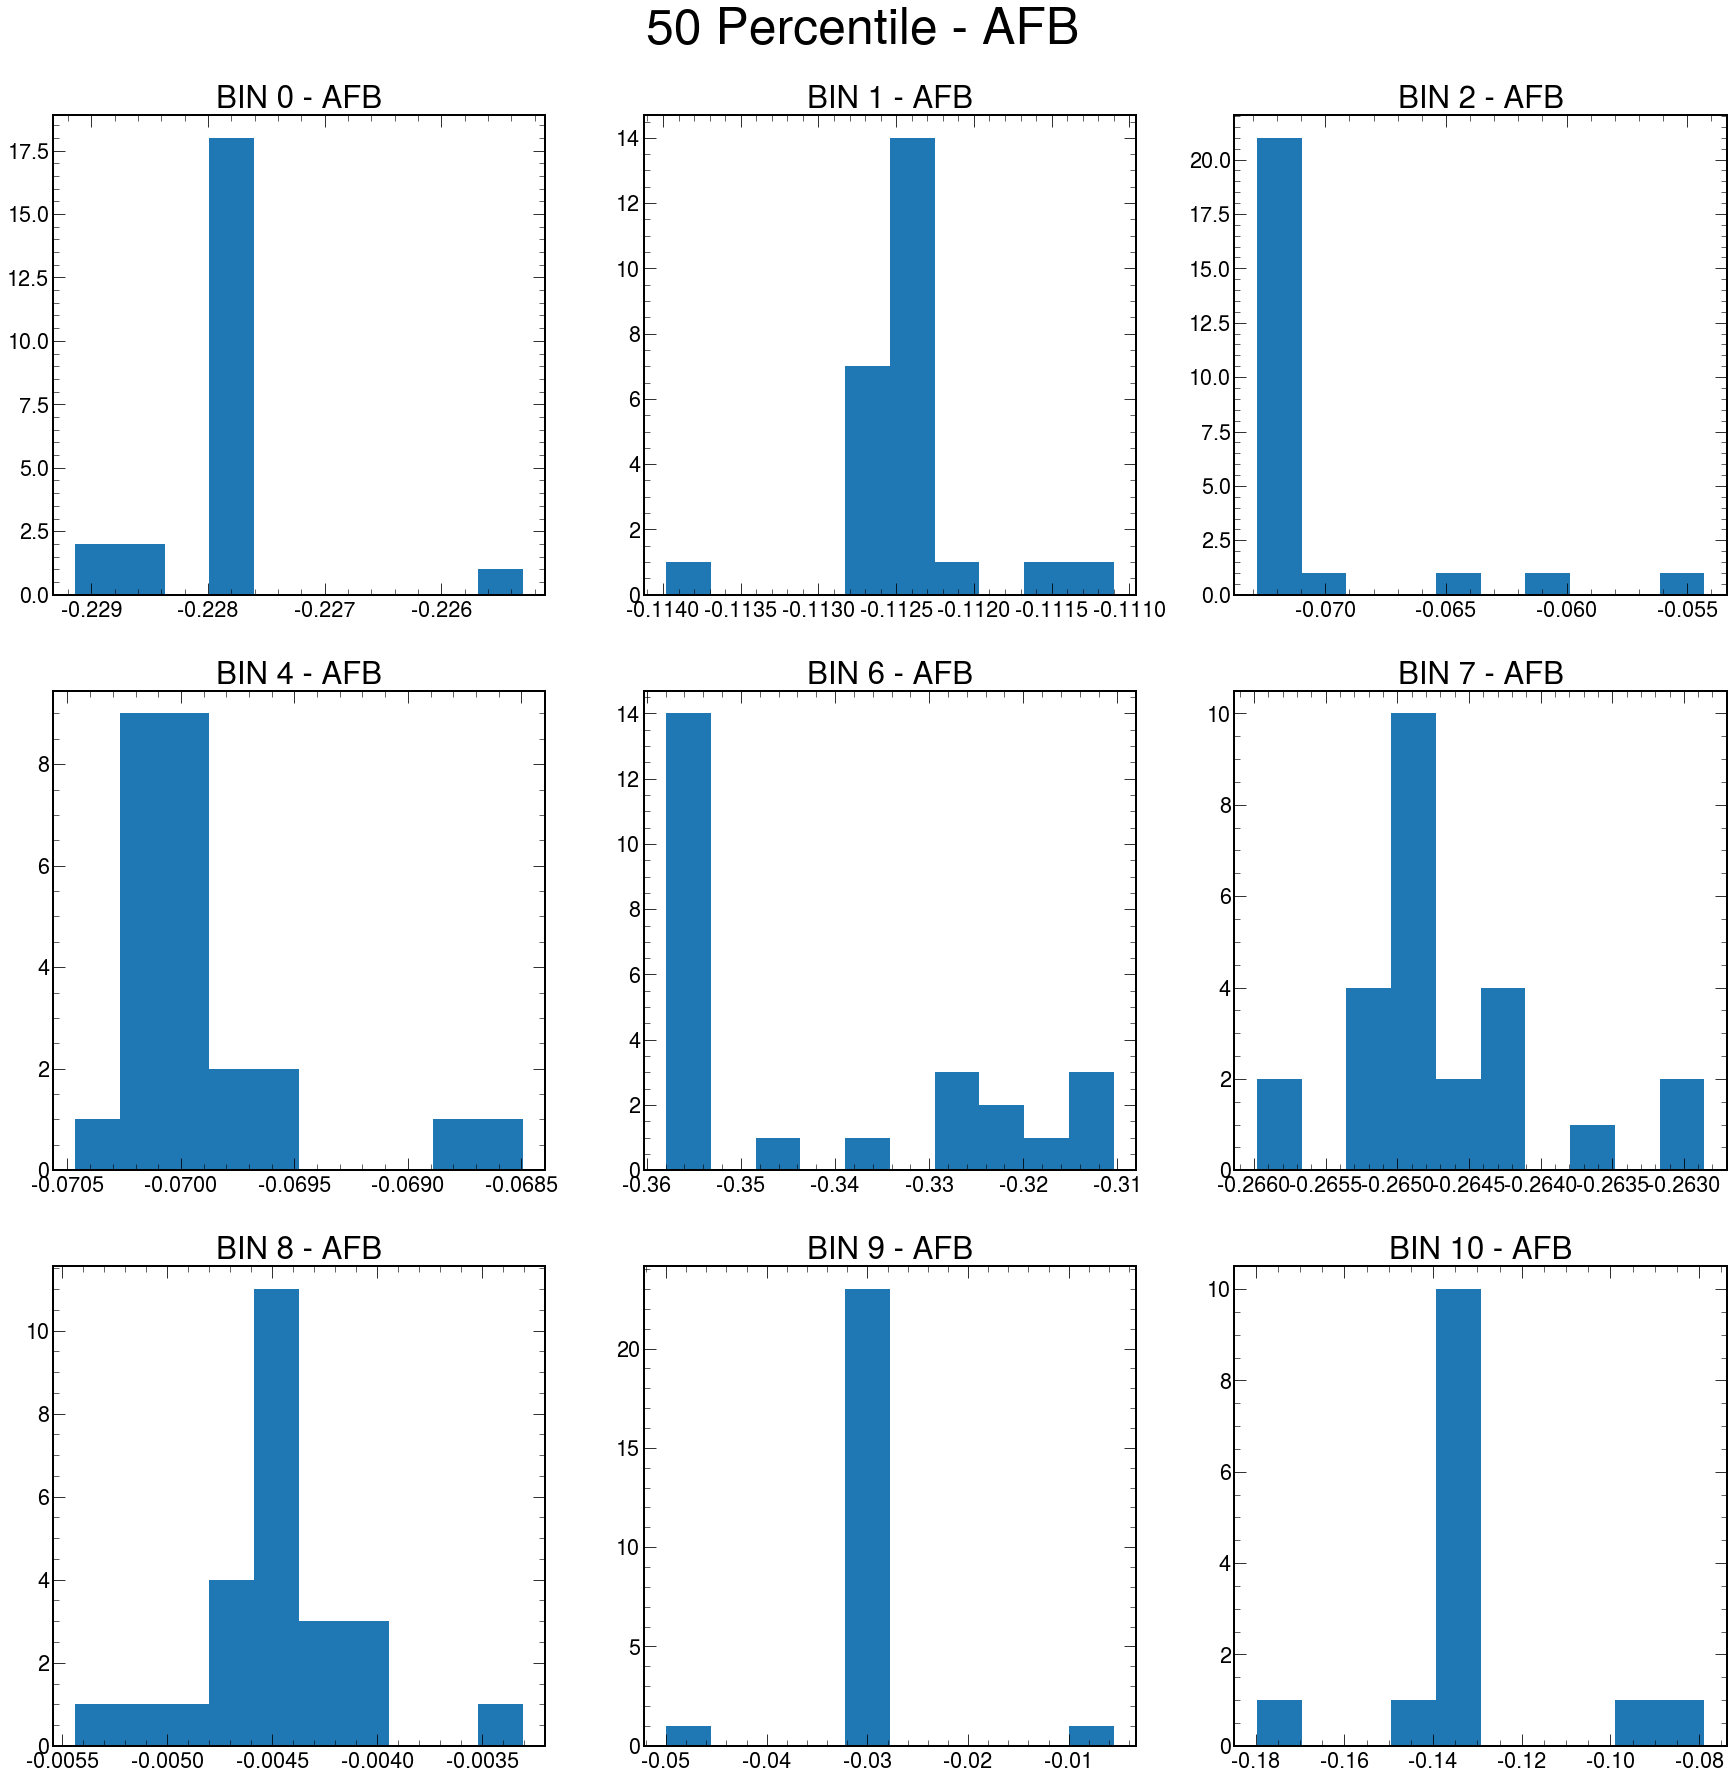

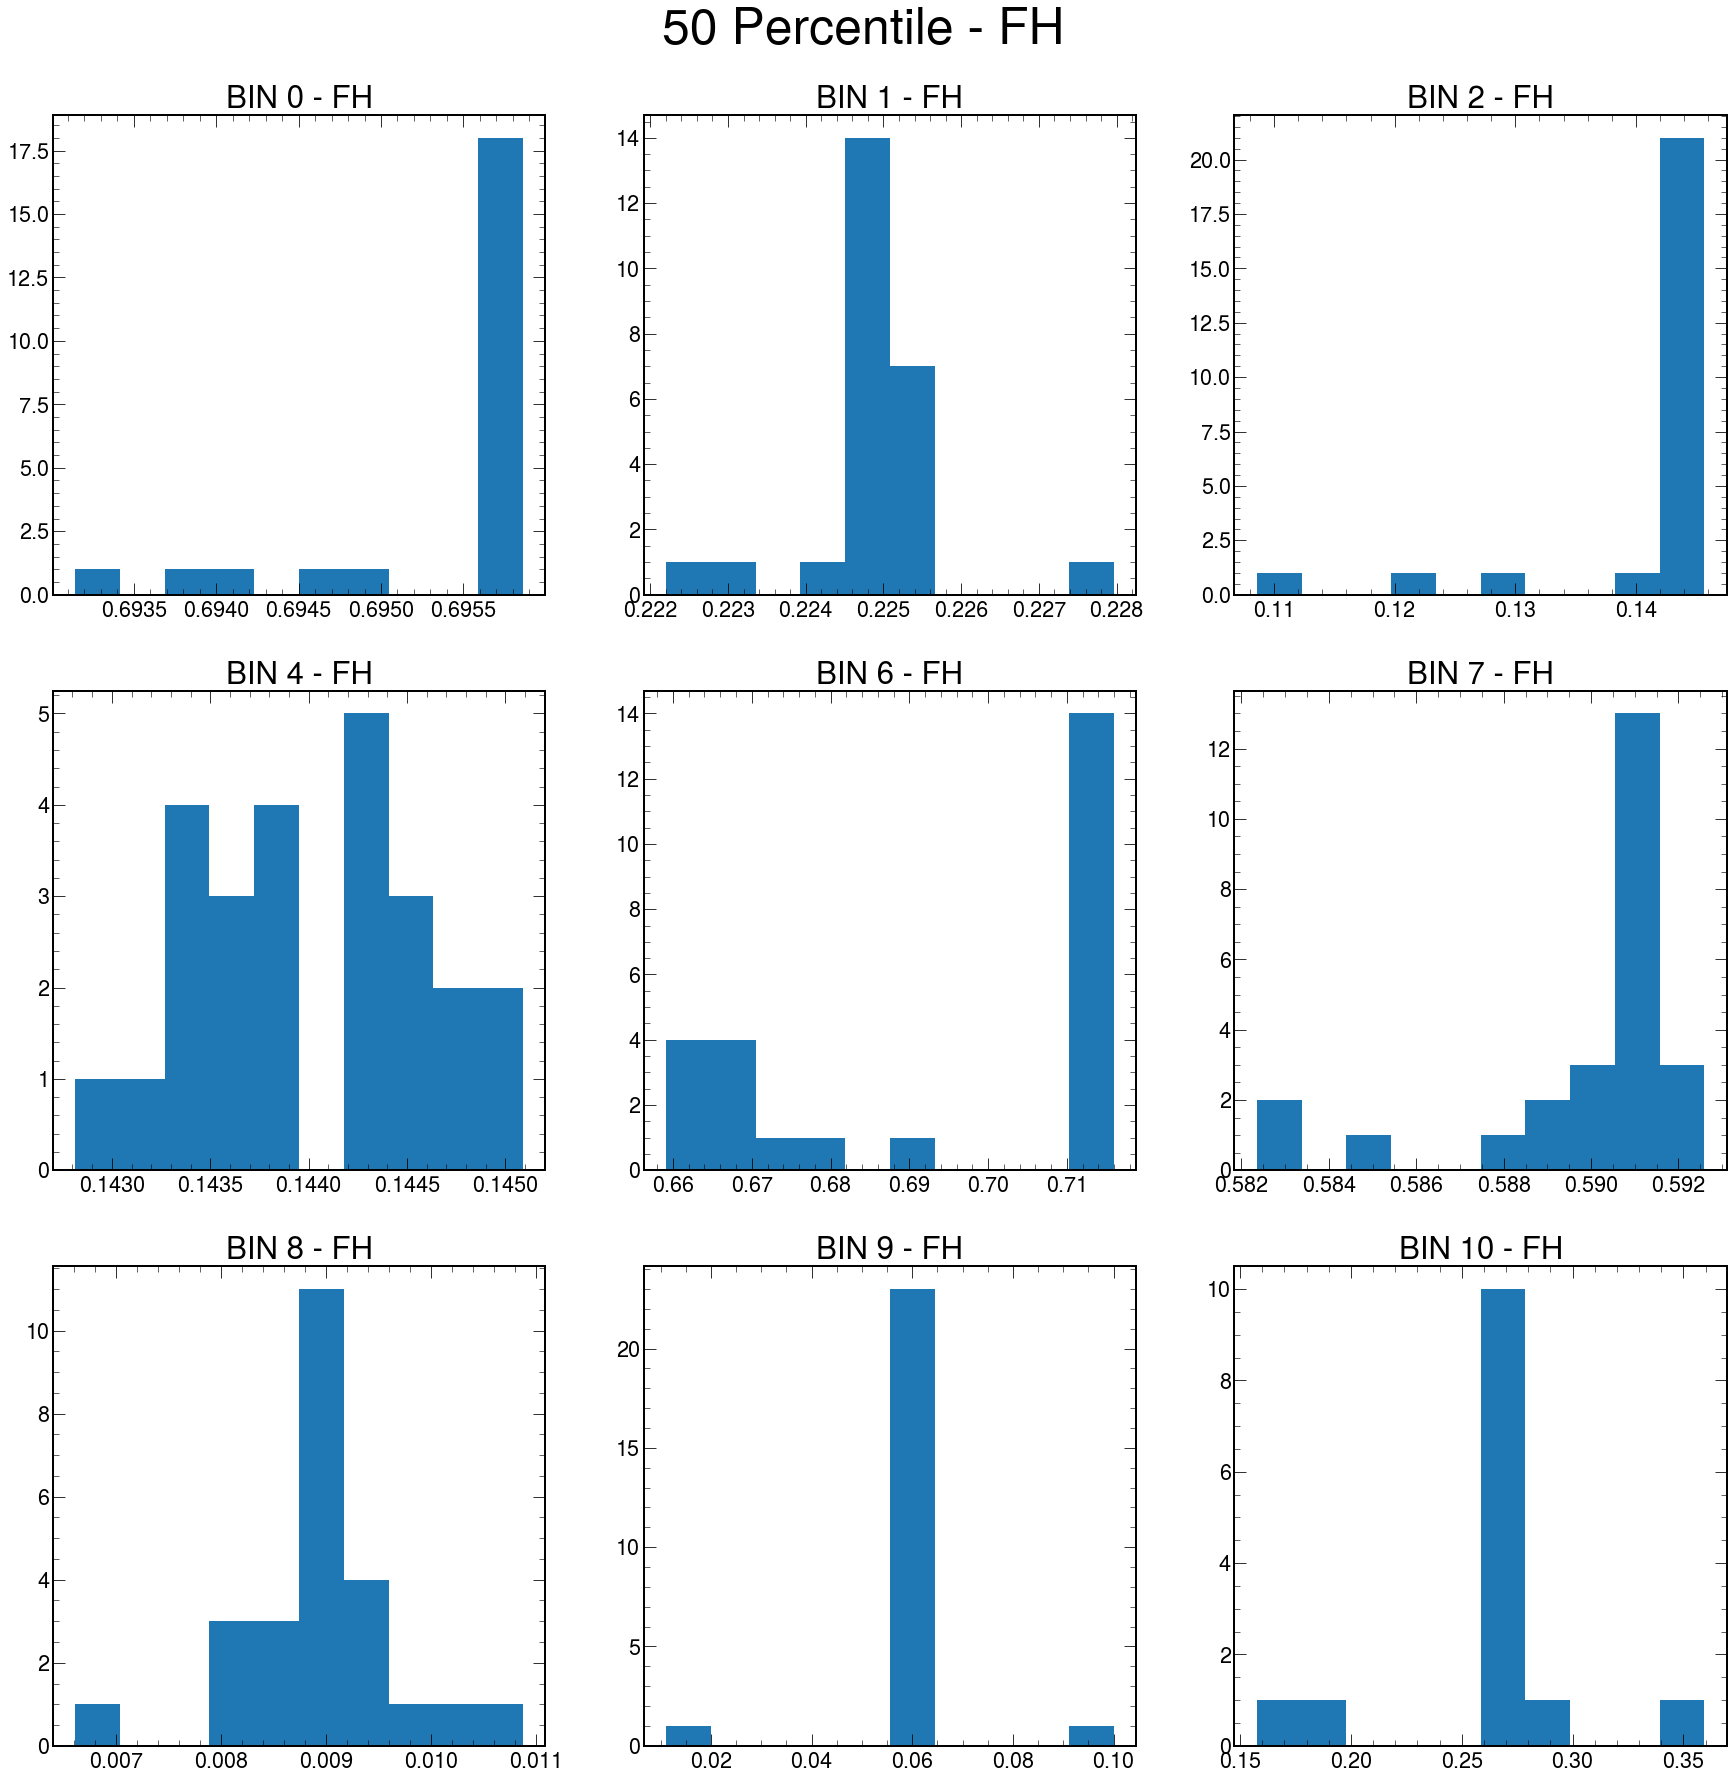

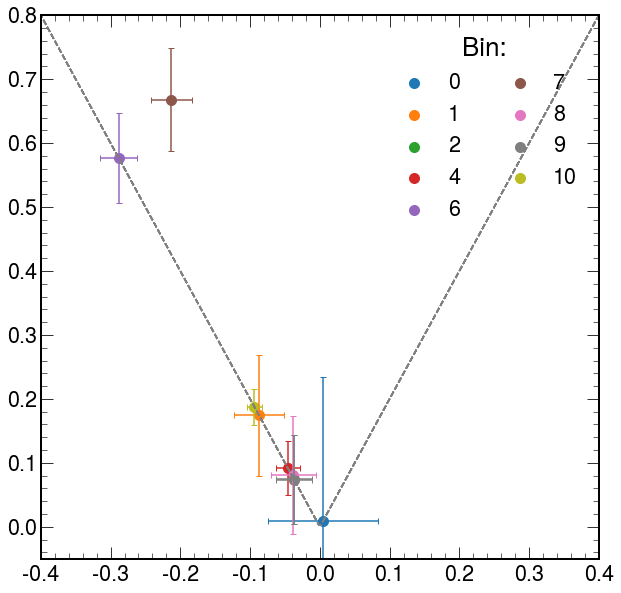

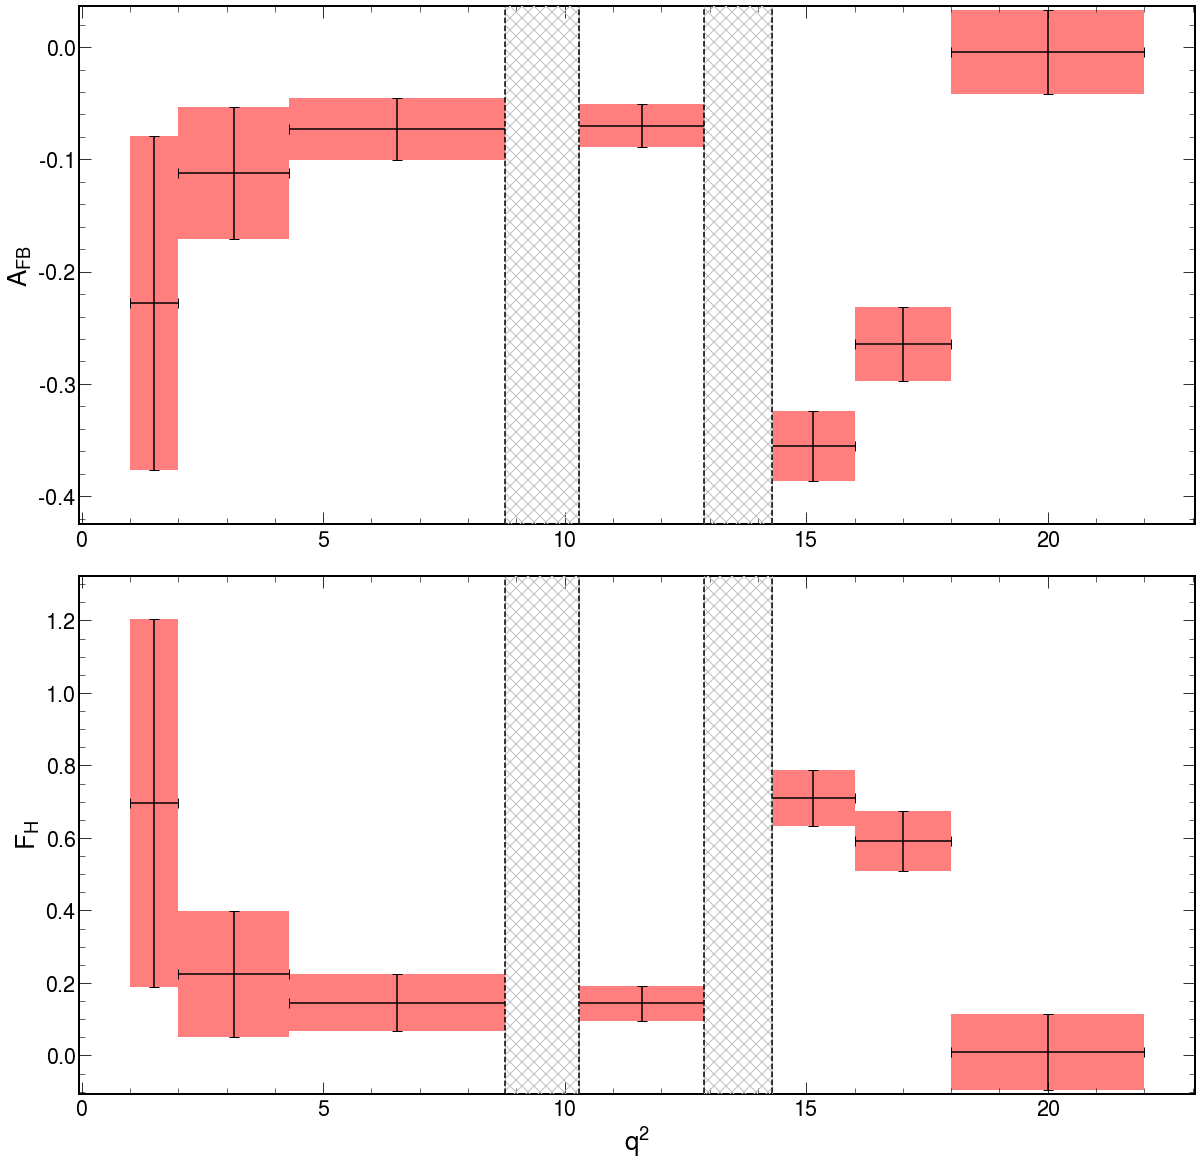

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [406]:
with PdfPages('symfitMeasurement.pdf') as pdf:    
    
    
    #SECOND PAGE #SECOND PAGE #SECOND PAGE #SECOND PAGE
    for p in [100,50]:
        figura = plt.figure(figsize=(30, 30))
        figura.suptitle(f'{p} Percentile on NLL', fontsize=50, y=0.93)
        for index, (bin_,df) in enumerate(dataframesHCL.items()):

            _percentile = np.percentile(df.NLL2, p)
            dataframe = df[df.NLL2<_percentile]
            dataframe.replace([np.inf, -np.inf], np.nan)
            dataframe.dropna()

            ax = figura.add_subplot(3,3,index+1)
            plot_iterative_fit(dataframe, ax)
            ax.set_xlim(-1.5, 1.5)
            ax.set_ylim(-0.01, 3)
            ax.set_title(bin_.replace('_', ' ').upper())
            ax.legend(loc=3)

        pdf.savefig()
        plt.show()
        
        figura = plt.figure(figsize=(30, 30))
        figura.suptitle(f'{p} Percentile' + ' - NLL', fontsize=50, y=0.93)
        for index, (bin_,df) in enumerate(dataframesHCL.items()):

            _percentile = np.percentile(df.NLL2, p)
            dataframe = df[df.NLL2<_percentile]
            dataframe.replace([np.inf, -np.inf], np.nan)
            dataframe.dropna()

            ax = figura.add_subplot(3,3,index+1)
            #plot_iterative_fit(dataframe, ax)
            #ax.set_xlim(-1.5, 1.5)
            #ax.set_ylim(-0.01, 3)
            ax.set_title(bin_.replace('_', ' ').upper())
            #ax.legend(loc=3)
            ax.hist(dataframe.NLL2)
        pdf.savefig()
        plt.show()
        
        
        figura = plt.figure(figsize=(30, 30))
        figura.suptitle(f'{p} Percentile' + ' - AFB', fontsize=50, y=0.93)
        for index, (bin_,df) in enumerate(dataframesHCL.items()):

            _percentile = np.percentile(df.NLL2, p)
            dataframe = df[df.NLL2<_percentile]
            dataframe.replace([np.inf, -np.inf], np.nan)
            dataframe.dropna()

            ax = figura.add_subplot(3,3,index+1)
            #plot_iterative_fit(dataframe, ax)
            #ax.set_xlim(-1.5, 1.5)
            #ax.set_ylim(-0.01, 3)
            ax.set_title(bin_.replace('_', ' ').upper() + ' - AFB')
            #ax.legend(loc=3)
            ax.hist(dataframe.AFB2)

        pdf.savefig()
        plt.show()

        
        figura = plt.figure(figsize=(30, 30))
        figura.suptitle(f'{p} Percentile' + ' - FH', fontsize=50, y=0.93)
        for index, (bin_,df) in enumerate(dataframesHCL.items()):

            _percentile = np.percentile(df.NLL2, p)
            dataframe = df[df.NLL2<_percentile]
            dataframe.replace([np.inf, -np.inf], np.nan)
            dataframe.dropna()

            ax = figura.add_subplot(3,3,index+1)
            #plot_iterative_fit(dataframe, ax)
            #ax.set_xlim(-1.5, 1.5)
            #ax.set_ylim(-0.01, 3)
            ax.set_title(bin_.replace('_', ' ').upper() + ' - FH')
            #ax.legend(loc=3)
            ax.hist(dataframe.FH2)

        pdf.savefig()
        plt.show()
        #SECOND PAGE #SECOND PAGE #SECOND PAGE #SECOND PAGE
    

    
    
    #FIRST PAGE #FIRST PAGE #FIRST PAGE #FIRST PAGE
    fig = plt.figure()
    _1 = fig.add_subplot(1,1,1)

    for index, (bin_,df) in enumerate(dataframes.items()):
        plot_physical_boundaries(_1)
        minimo = df[df.NLL2==np.min(df.NLL2)]
        _1.scatter(minimo.AFB2, minimo.FH2, label=bin_.split('_')[1], s=100)
        _1.errorbar(minimo.AFB2, minimo.FH2, xerr = minimo.errAFB2, yerr = minimo.errFH2, capsize=3)
        #_1

    _1.legend(title='Bin: ', ncol=2, fancybox=True, facecolor='black', loc=1)
    _1.set_xlim(-0.4,0.4)
    _1.set_ylim(-0.05, 0.8)
    pdf.savefig()
    plt.show()
    #FIRST PAGE #FIRST PAGE #FIRST PAGE #FIRST PAGE
    
    
    
    
    
    
    
    
    
    #THIRD PAGE #THIRD PAGE #THIRD PAGE #THIRD PAGE #THIRD PAGE
    fg = plt.figure(figsize=(20,20))
    #fg.suptitle('New Efficiency', y=0.92, fontsize=40)
    ax = fg.add_subplot(211)
    plot_measurement_q2(dataframesHCL, ax, 'afb')


    ax2 = fg.add_subplot(212)
    plot_measurement_q2(dataframesHCL, ax2, 'fh')
    ax2.set_xlabel('$q^2$')

    plt.subplots_adjust(hspace=0.1)
    pdf.savefig()
    plt.show()
    #THIRD PAGE #THIRD PAGE #THIRD PAGE #THIRD PAGE #THIRD PAGE
    
    
    
    

In [395]:
np.min(df.NLL2)

19500.67578125

In [394]:
np.percentile(df.NLL2, 0)

19500.67578125

In [399]:
percentiles = [np.percentile(df.NLL2, 5*i) for i in range(21)]
alturas = [i/20 for i in range(21)]

In [401]:
percentiles

[19500.67578125,
 19500.6791015625,
 19500.6830078125,
 19500.685839843747,
 19500.6984375,
 19500.71044921875,
 19500.769140624998,
 19500.83681640625,
 19506.16796875,
 19509.5201171875,
 19517.7109375,
 19525.4501953125,
 19530.668359375,
 19626.49443359375,
 19717.20546875,
 20107.08447265625,
 20334.733203125,
 20467.7857421875,
 20982.5158203125,
 21390.690625,
 21682.30078125]

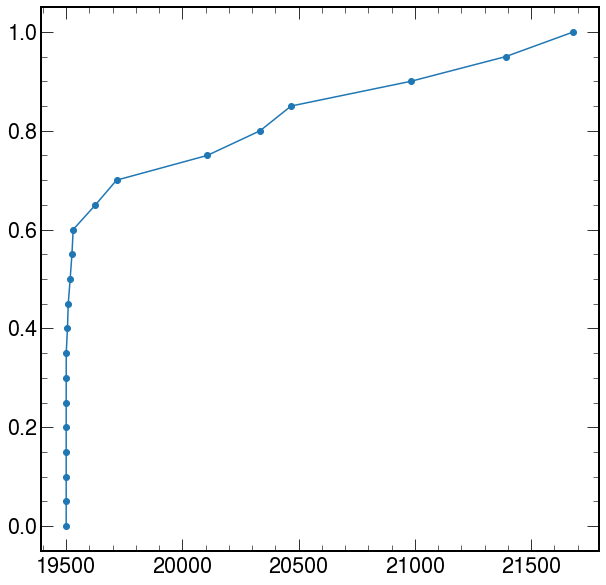

In [400]:
plt.plot(percentiles, alturas)
plt.scatter(percentiles, alturas)

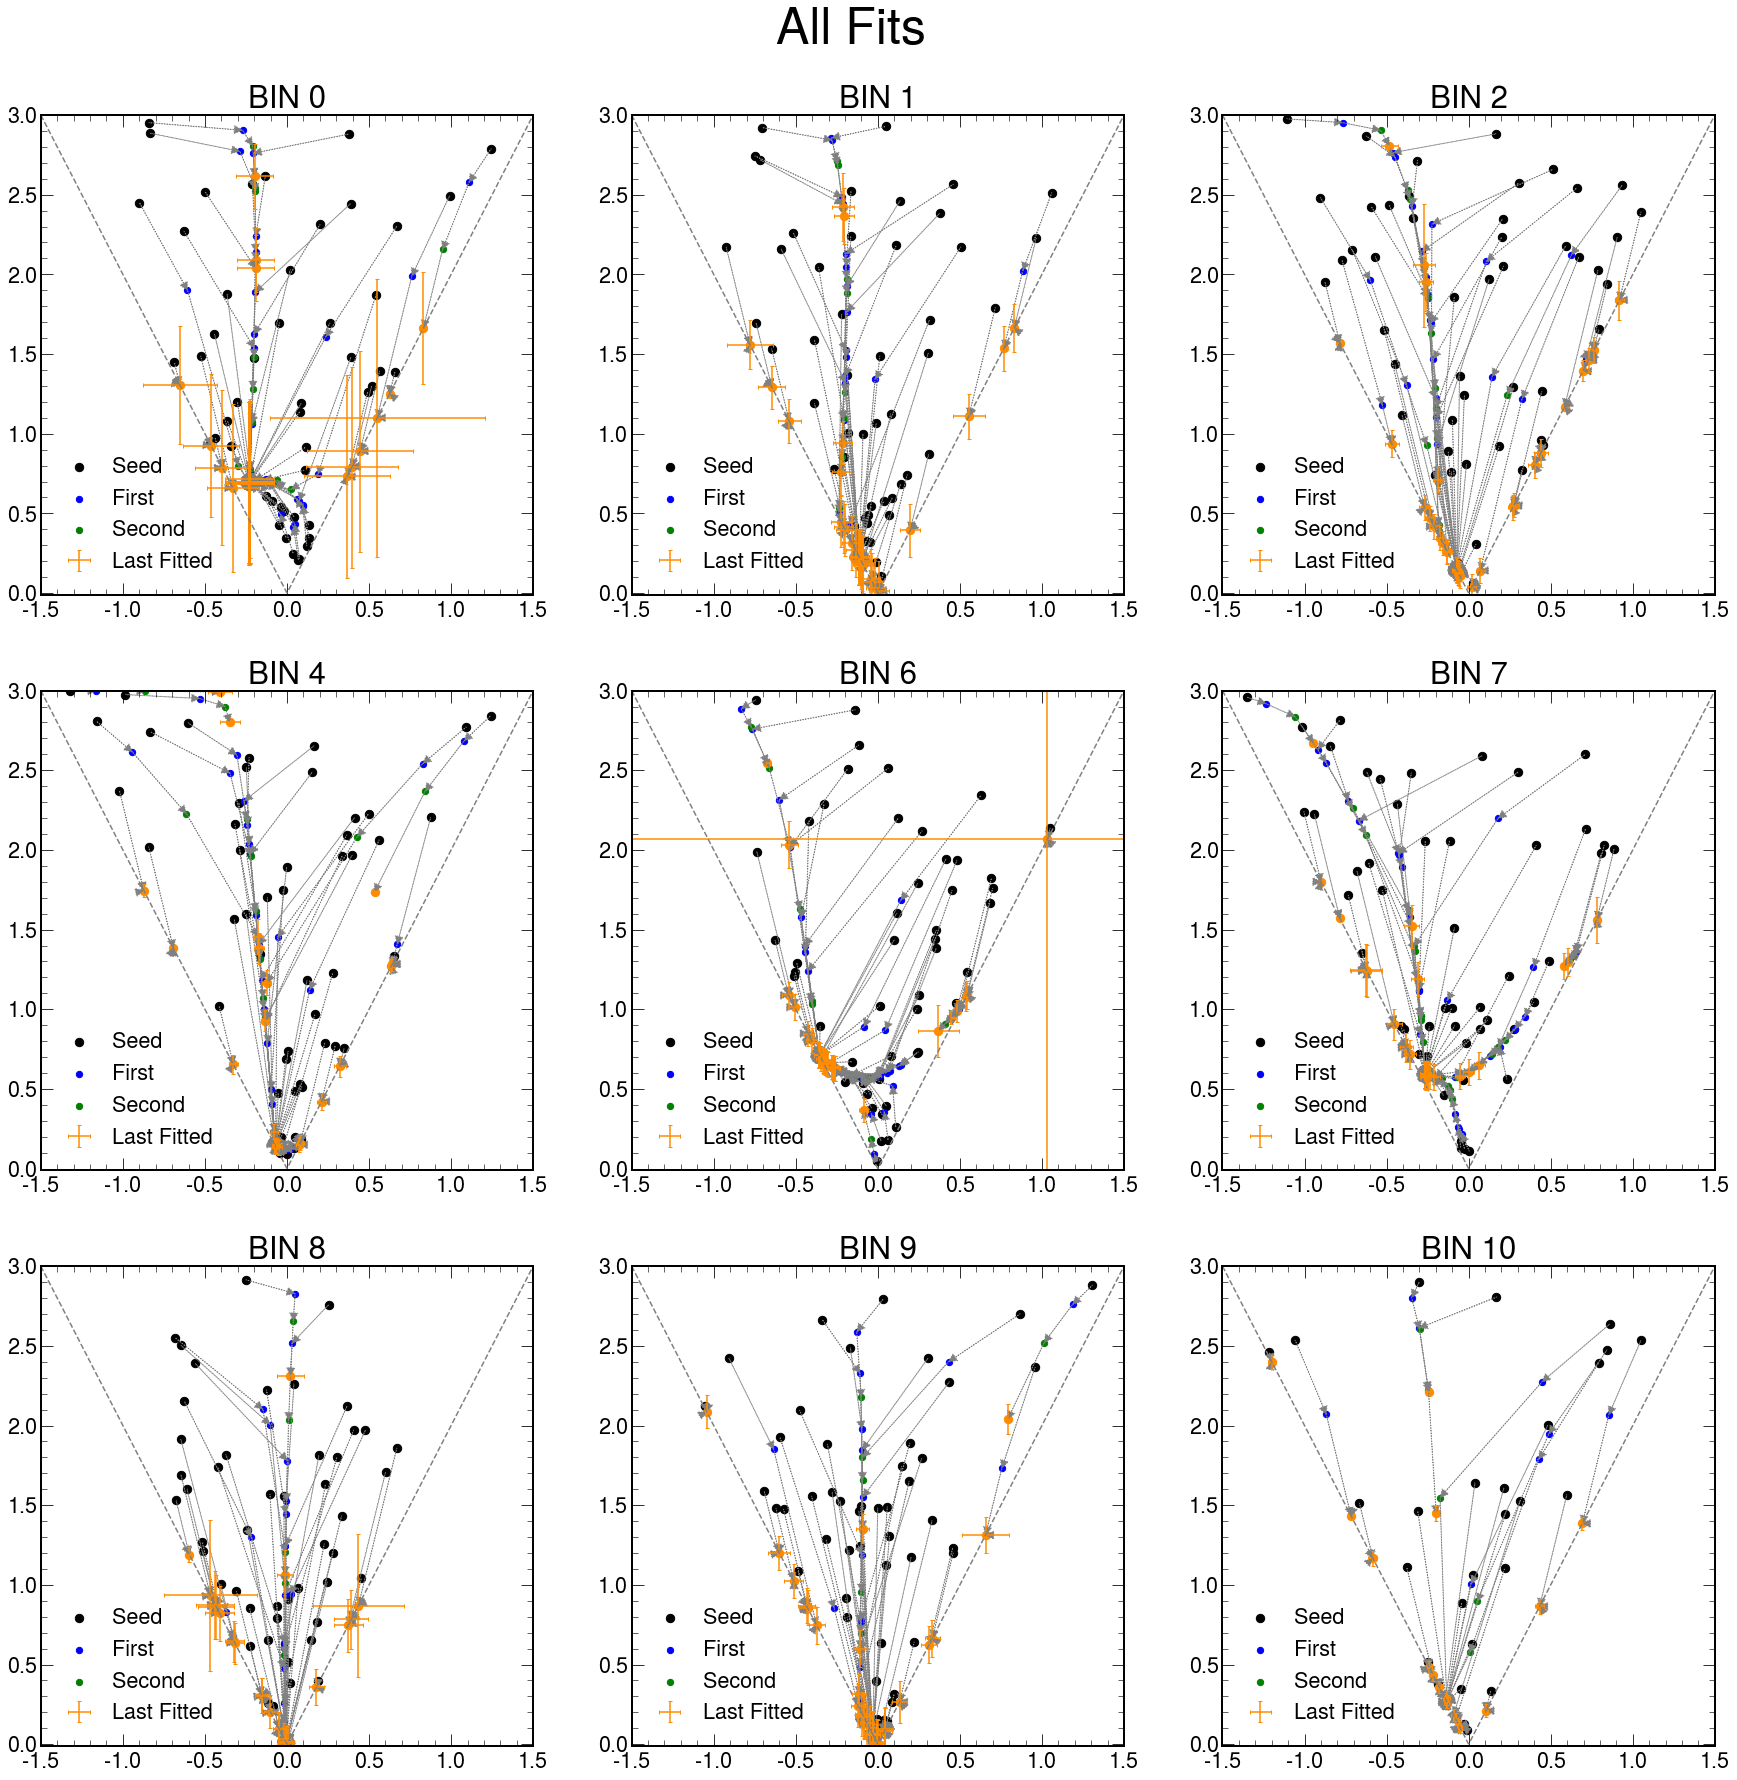

In [386]:
figura = plt.figure(figsize=(30, 30))
figura.suptitle('All Fits', fontsize=50, y=0.93)
for index, (bin_,df) in enumerate(dataframesHCL.items()):
    
    _percentile = np.percentile(df.NLL2, 100)
    dataframe = df[df.NLL2<_percentile]
    dataframe.replace([np.inf, -np.inf], np.nan)
    dataframe.dropna()
    
    ax = figura.add_subplot(3,3,index+1)
    plot_iterative_fit(dataframe, ax)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.01, 3)
    ax.set_title(bin_.replace('_', ' ').upper())
    ax.legend(loc=3)

pdf.savefig()
plt.show()

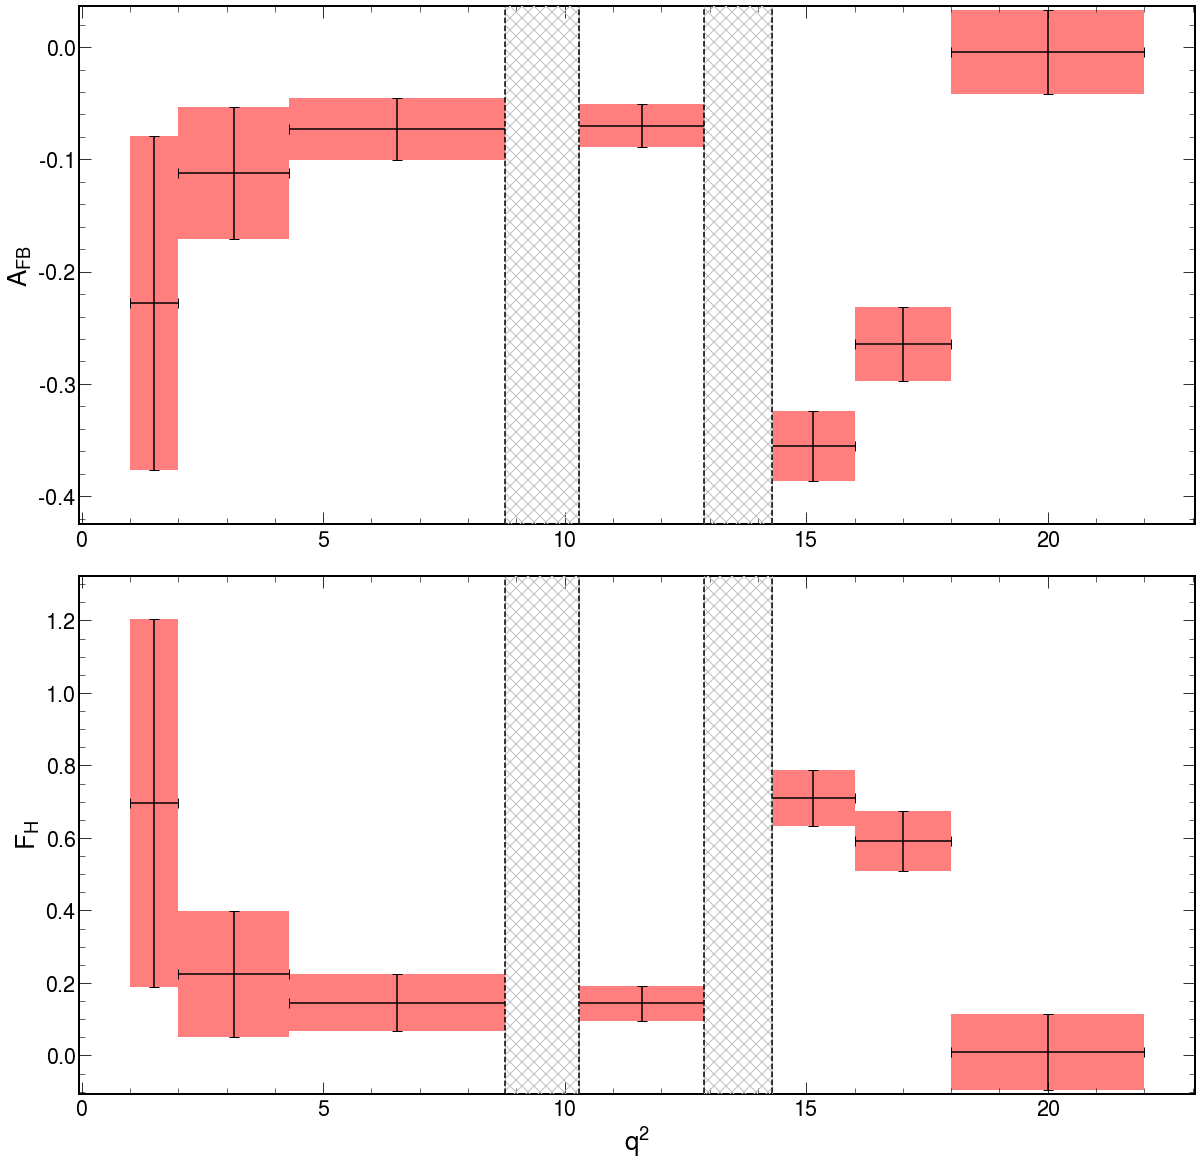

In [388]:
fg = plt.figure(figsize=(20,20))
#fg.suptitle('New Efficiency', y=0.92, fontsize=40)
ax = fg.add_subplot(211)
plot_measurement_q2(dataframesHCL, ax, 'afb')


ax2 = fg.add_subplot(212)
plot_measurement_q2(dataframesHCL, ax2, 'fh')
ax2.set_xlabel('$q^2$')

plt.subplots_adjust(hspace=0.1)
pdf.savefig()

In [389]:
pdf.close()

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
